In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [2]:
# pip install neuralforecast

In [3]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [4]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [5]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [6]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [7]:
# pip install neuralforecast

In [8]:
# Tiền xử lí dữ liệu

dxg_sorted = dxg_dataset.sort_values(by='ds', ascending=True)
qcg_sorted = qcg_dataset.sort_values(by='ds', ascending=True)
vhm_sorted = vhm_dataset.sort_values(by='ds', ascending=True)

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [9]:
# Apply function to DXG
dxg_sorted["Volume"] = dxg_sorted["Volume"].apply(convert_volume_to_number)
dxg_sorted["Change %"] = dxg_sorted["Change %"].apply(convert_change_to_number)
dxg_sorted['y'] = dxg_sorted['y'].apply(convert_str_to_number)
dxg_sorted['Open'] = dxg_sorted['Open'].apply(convert_str_to_number)
dxg_sorted['High'] = dxg_sorted['High'].apply(convert_str_to_number)
dxg_sorted['Low'] = dxg_sorted['Low'].apply(convert_str_to_number)

dxg_sorted.head(10)

ds        y     Open     High      Low   Volume  Change %  \
1251 2019-03-01  17057.8  16750.2  17057.8  16750.2  1270000    0.0184   
1250 2019-03-04  17809.9  17228.8  17878.3  17092.0  5540000    0.0441   
1249 2019-03-05  17502.2  17775.7  17912.4  17365.5  3490000   -0.0173   
1248 2019-03-06  17673.2  17502.2  17741.5  17365.5  1640000    0.0098   
1247 2019-03-07  17092.0  17912.4  17912.4  17092.0  3840000   -0.0329   
1246 2019-03-08  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340   
1245 2019-03-11  16921.1  16545.1  16989.5  16510.9  1580000    0.0248   
1244 2019-03-12  16886.9  17194.6  17262.9  16750.2  1670000   -0.0020   
1243 2019-03-13  16750.2  16955.3  17057.8  16750.2  1510000   -0.0081   
1242 2019-03-14  16818.6  16750.2  16886.9  16647.6  1350000    0.0041   

     unique_id  
1251       DXG  
1250       DXG  
1249       DXG  
1248       DXG  
1247       DXG  
1246       DXG  
1245       DXG  
1244       DXG  
1243       DXG  
1242       DXG

In [10]:
# Apply function to QCG
qcg_sorted["Volume"] = qcg_sorted["Volume"].apply(convert_volume_to_number)
qcg_sorted["Change %"] = qcg_sorted["Change %"].apply(convert_change_to_number)
qcg_sorted['y'] = qcg_sorted['y'].apply(convert_str_to_number)
qcg_sorted['Open'] = qcg_sorted['Open'].apply(convert_str_to_number)
qcg_sorted['High'] = qcg_sorted['High'].apply(convert_str_to_number)
qcg_sorted['Low'] = qcg_sorted['Low'].apply(convert_str_to_number)

qcg_sorted.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
1251 2019-03-01  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
1250 2019-03-04  4790.0  4700.0  4790.0  4600.0  1200000   -0.0021       QCG
1249 2019-03-05  4700.0  4700.0  4750.0  4620.0  1040000   -0.0188       QCG
1248 2019-03-06  5020.0  4700.0  5020.0  4640.0  2430000    0.0681       QCG
1247 2019-03-07  5370.0  5250.0  5370.0  5200.0   736850    0.0697       QCG
1246 2019-03-08  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
1245 2019-03-11  5990.0  5600.0  6040.0  5400.0  3180000    0.0602       QCG
1244 2019-03-12  6090.0  6000.0  6100.0  5800.0  1200000    0.0167       QCG
1243 2019-03-13  6090.0  6090.0  6090.0  5800.0  1370000    0.0000       QCG
1242 2019-03-14  6070.0  6000.0  6150.0  5930.0  1470000   -0.0033       QCG

In [11]:
# Apply function to VHM
vhm_sorted["Volume"] = vhm_sorted["Volume"].apply(convert_volume_to_number)
vhm_sorted["Change %"] = vhm_sorted["Change %"].apply(convert_change_to_number)
vhm_sorted['y'] = vhm_sorted['y'].apply(convert_str_to_number)
vhm_sorted['Open'] = vhm_sorted['Open'].apply(convert_str_to_number)
vhm_sorted['High'] = vhm_sorted['High'].apply(convert_str_to_number)
vhm_sorted['Low'] = vhm_sorted['Low'].apply(convert_str_to_number)

vhm_sorted.head(10)

ds        y     Open     High      Low   Volume  Change %  \
1251 2019-03-01  68421.0  66541.0  68722.0  65789.0  1050000    0.0400   
1250 2019-03-04  70075.0  69173.0  70300.0  67368.0  1180000    0.0242   
1249 2019-03-05  68421.0  69323.0  69849.0  68045.0  1500000   -0.0236   
1248 2019-03-06  69022.0  68421.0  69097.0  68270.0   770130    0.0088   
1247 2019-03-07  69173.0  69173.0  71654.0  69097.0  1700000    0.0022   
1246 2019-03-08  68797.0  69173.0  69849.0  68722.0   909800   -0.0054   
1245 2019-03-11  67669.0  68421.0  69398.0  67669.0   693860   -0.0164   
1244 2019-03-12  69398.0  68571.0  69624.0  68346.0  1120000    0.0256   
1243 2019-03-13  70676.0  69624.0  72180.0  69549.0  2150000    0.0184   
1242 2019-03-14  70676.0  70902.0  71128.0  69774.0   920650    0.0000   

     unique_id  
1251       VHM  
1250       VHM  
1249       VHM  
1248       VHM  
1247       VHM  
1246       VHM  
1245       VHM  
1244       VHM  
1243       VHM  
1242       VHM

In [12]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_sorted)
dxg_train_size = int(dxg_total_size * 0.7)
dxg_test_size = int(dxg_total_size * 0.3)


vhm_total_size = len(vhm_sorted)
vhm_train_size = int(vhm_total_size * 0.7)
vhm_test_size = int(vhm_total_size * 0.3)


qcg_total_size = len(qcg_sorted)
qcg_train_size = int(qcg_total_size * 0.7)
qcg_test_size = int(qcg_total_size * 0.3)


# Split the dataset
dxg_train_data = dxg_sorted.iloc[:dxg_train_size]
dxg_test_data = dxg_sorted.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_sorted.iloc[:vhm_train_size]
vhm_test_data = vhm_sorted.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_sorted.iloc[:qcg_train_size]
qcg_test_data = qcg_sorted.iloc[qcg_train_size:qcg_train_size+qcg_test_size]


# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)


vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)


qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)



# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [13]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [14]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [15]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [16]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [17]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [18]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [19]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [20]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [21]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [22]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [23]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [25]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_absolute_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 4452.340223993778
MAPE trên tập test của DXG là: 26.314390302642217 %
MAE trên tập test của DXG là: 3641.820328125


In [26]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_absolute_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 9397.883749867782
MAPE trên tập test của VHM là: 14.11180366373359 %
MAE trên tập test của VHM là: 7471.3155729166665


In [27]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_absolute_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 3294.2058925924885
MAPE trên tập test của QCG là: 52.19978555816689 %
MAE trên tập test của QCG là: 2837.9700846354167


In [28]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day input [15700. 16750. 16900. 17700. 17150. 16300. 17400. 16650. 16650. 16850.
 18000. 18050. 18250. 17800. 19000. 19450. 19800. 20150. 19950. 20100.
 20550. 19800. 20150. 20250. 21200. 19750. 20000. 19400. 19750. 19900.
 20000. 19850. 20650. 21100. 21300. 20500. 20000. 19350. 19450. 19100.
 18250. 18650. 18650. 18950. 19150. 19200. 18750. 18950. 19100. 18900.
 19050. 19350. 19050. 19150. 19200. 19400. 19750. 19700. 19500. 19250.
 18800. 18600. 19000. 18950. 19200. 18950. 19200. 19000. 18900. 18800.
 18950. 18750. 18750. 18500. 18600. 18550. 18450. 18450. 18400. 18700.
 18950. 18800. 18950. 18750. 18500. 18150. 17850. 18200. 18050. 18250.]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18234.294922     18236.445312    17870.519531   
DXG       2024-05-31  18039.539062     18039.355469    17705.601562   
DXG       2024-06-01  18022.267578     18009.406250    17685.421875   
DXG       2024-06-02  18006.660156     18009.507812    17663.808594   
DXG       2024-06-03  18086.765625     18076.580078    17735.000000   
...              ...           ...              ...             ...   
DXG       2025-06-04  18869.644531     18858.902344    18308.412109   
DXG       2025-06-05  18601.007812     18592.441406    18106.851562   
DXG       2025-06-06  18949.935547     18940.517578    18476.054688   
DXG       2025-06-07  17960.867188     17962.183594    17589.138672   
DXG       2025-06-08  18983.160156     18981.406250    18534.130859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18167.128906     18169.203125    17816.714844   
DXG       2024-05-31  18053.117188     18052.949219    17750.298828   
DXG       2024-06-01  18014.015625     18002.132812    17702.808594   
DXG       2024-06-02  18027.580078     18030.164062    17716.457031   
DXG       2024-06-03  18058.179688     18049.421875    17755.671875   
...              ...           ...              ...             ...   
DXG       2025-06-04  18432.246094     18422.667969    17931.902344   
DXG       2025-06-05  18556.511719     18550.548828    18212.458984   
DXG       2025-06-06  18711.675781     18702.042969    18227.019531   
DXG       2025-06-07  18006.558594     18007.828125    17648.023438   
DXG       2025-06-08  18786.414062     18785.089844    18447.449219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18134.277344     18136.437500    17769.158203   
DXG       2024-05-31  17999.369141     17999.203125    17702.464844   
DXG       2024-06-01  17968.798828     17955.802734    17628.515625   
DXG       2024-06-02  17991.607422     17994.113281    17690.365234   
DXG       2024-06-03  18001.423828     17992.259766    17684.937500   
...              ...           ...              ...             ...   
DXG       2025-06-04  18117.851562     18110.345703    17725.660156   
DXG       2025-06-05  18271.337891     18265.964844    17961.365234   
DXG       2025-06-06  18796.980469     18789.222656    18406.679688   
DXG       2025-06-07  17984.515625     17985.912109    17589.783203   
DXG       2025-06-08  18479.416016     18478.285156    18189.681641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18163.535156     18165.736328    17791.632812   
DXG       2024-05-31  17982.328125     17982.162109    17686.923828   
DXG       2024-06-01  17958.900391     17945.660156    17612.232422   
DXG       2024-06-02  17962.843750     17965.269531    17671.060547   
DXG       2024-06-03  17996.613281     17987.355469    17676.882812   
...              ...           ...              ...             ...   
DXG       2025-06-04  18013.648438     18006.199219    17624.541016   
DXG       2025-06-05  17922.244141     17917.011719    17620.316406   
DXG       2025-06-06  18709.628906     18700.177734    18234.166016   
DXG       2025-06-07  17933.476562     17934.767578    17568.166016   
DXG       2025-06-08  18244.187500     18243.058594    17954.248047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18210.593750     18212.875000    17824.986328   
DXG       2024-05-31  17896.279297     17896.097656    17571.306641   
DXG       2024-06-01  18013.236328     17999.132812    17643.923828   
DXG       2024-06-02  17929.248047     17931.662109    17638.650391   
DXG       2024-06-03  17941.472656     17931.593750    17600.447266   
...              ...           ...              ...             ...   
DXG       2025-06-04  17943.736328     17936.380859    17559.541016   
DXG       2025-06-05  17846.289062     17841.183594    17551.628906   
DXG       2025-06-06  18360.667969     18352.531250    17951.289062   
DXG       2025-06-07  18010.646484     18011.941406    17644.005859   
DXG       2025-06-08  18165.525391     18164.345703    17863.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18219.009766     18221.175781    17852.675781   
DXG       2024-05-31  17922.951172     17922.777344    17613.025391   
DXG       2024-06-01  18019.449219     18004.527344    17628.664062   
DXG       2024-06-02  17912.736328     17915.023438    17637.326172   
DXG       2024-06-03  18107.074219     18097.324219    17770.314453   
...              ...           ...              ...             ...   
DXG       2025-06-04  17980.197266     17973.068359    17607.751953   
DXG       2025-06-05  17884.648438     17879.716797    17600.044922   
DXG       2025-06-06  18057.046875     18050.986328    17752.083984   
DXG       2025-06-07  17906.855469     17908.199219    17527.484375   
DXG       2025-06-08  18825.199219     18823.609375    18417.925781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18307.728516     18309.710938    17972.302734   
DXG       2024-05-31  17938.294922     17938.117188    17623.929688   
DXG       2024-06-01  18260.783203     18243.037109    17796.021484   
DXG       2024-06-02  17928.056641     17930.353516    17651.376953   
DXG       2024-06-03  18170.087891     18157.431641    17733.013672   
...              ...           ...              ...             ...   
DXG       2025-06-04  18100.900391     18092.578125    17666.050781   
DXG       2025-06-05  17847.445312     17842.060547    17536.845703   
DXG       2025-06-06  17781.267578     17774.951172    17463.480469   
DXG       2025-06-07  17916.935547     17918.013672    17612.308594   
DXG       2025-06-08  18787.138672     18785.156250    18280.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18079.328125     18081.539062    17705.480469   
DXG       2024-05-31  17890.533203     17890.353516    17570.457031   
DXG       2024-06-01  18566.603516     18544.777344    17994.919922   
DXG       2024-06-02  17880.298828     17882.792969    17580.156250   
DXG       2024-06-03  18686.648438     18674.871094    18279.884766   
...              ...           ...              ...             ...   
DXG       2025-06-04  18523.070312     18512.152344    17952.519531   
DXG       2025-06-05  17861.816406     17856.498047    17555.060547   
DXG       2025-06-06  17836.628906     17829.785156    17492.271484   
DXG       2025-06-07  17868.652344     17869.843750    17532.068359   
DXG       2025-06-08  18819.238281     18817.609375    18402.544922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18115.884766     18117.773438    17796.283203   
DXG       2024-05-31  17923.574219     17923.410156    17632.177734   
DXG       2024-06-01  18762.619141     18744.511719    18288.332031   
DXG       2024-06-02  17854.216797     17856.587891    17568.865234   
DXG       2024-06-03  18237.865234     18226.949219    17860.851562   
...              ...           ...              ...             ...   
DXG       2025-06-04  18774.816406     18765.041016    18264.156250   
DXG       2025-06-05  17943.126953     17937.195312    17600.914062   
DXG       2025-06-06  18293.615234     18284.755859    17847.832031   
DXG       2025-06-07  17845.839844     17847.000000    17518.277344   
DXG       2025-06-08  18738.644531     18737.066406    18334.503906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18033.015625     18035.085938    17683.363281   
DXG       2024-05-31  17836.023438     17835.847656    17518.394531   
DXG       2024-06-01  18680.476562     18662.814453    18217.951172   
DXG       2024-06-02  17858.605469     17860.984375    17572.160156   
DXG       2024-06-03  18103.753906     18095.527344    17819.593750   
...              ...           ...              ...             ...   
DXG       2025-06-04  18731.484375     18721.890625    18230.310547   
DXG       2025-06-05  17969.048828     17961.773438    17549.453125   
DXG       2025-06-06  18394.412109     18384.035156    17872.304688   
DXG       2025-06-07  17824.351562     17825.527344    17491.785156   
DXG       2025-06-08  18730.320312     18728.910156    18369.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18021.013672     18023.308594    17633.132812   
DXG       2024-05-31  17811.023438     17810.855469    17513.226562   
DXG       2024-06-01  17900.431641     17887.347656    17557.810547   
DXG       2024-06-02  17788.767578     17791.355469    17477.298828   
DXG       2024-06-03  18051.152344     18041.093750    17703.812500   
...              ...           ...              ...             ...   
DXG       2025-06-04  18705.820312     18696.808594    18235.011719   
DXG       2025-06-05  18359.476562     18352.697266    17968.322266   
DXG       2025-06-06  18653.767578     18645.203125    18222.910156   
DXG       2025-06-07  17795.781250     17796.945312    17466.476562   
DXG       2025-06-08  18842.160156     18840.572266    18435.894531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18103.425781     18105.845703    17694.548828   
DXG       2024-05-31  17788.884766     17788.708984    17476.171875   
DXG       2024-06-01  17871.085938     17858.347656    17537.515625   
DXG       2024-06-02  17775.654297     17778.191406    17470.498047   
DXG       2024-06-03  17912.388672     17901.757812    17545.275391   
...              ...           ...              ...             ...   
DXG       2025-06-04  18715.123047     18705.810547    18228.527344   
DXG       2025-06-05  18114.611328     18106.158203    17626.867188   
DXG       2025-06-06  18609.937500     18600.347656    18127.433594   
DXG       2025-06-07  17799.033203     17800.318359    17435.826172   
DXG       2025-06-08  18553.925781     18552.160156    18102.066406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17926.527344     17929.140625    17485.054688   
DXG       2024-05-31  17781.388672     17781.212891    17468.406250   
DXG       2024-06-01  17776.638672     17762.164062    17397.542969   
DXG       2024-06-02  17762.691406     17765.328125    17445.242188   
DXG       2024-06-03  17981.742188     17971.384766    17624.080078   
...              ...           ...              ...             ...   
DXG       2025-06-04  18623.560547     18614.140625    18131.515625   
DXG       2025-06-05  17836.941406     17831.269531    17509.593750   
DXG       2025-06-06  18634.175781     18624.859375    18165.333984   
DXG       2025-06-07  17707.216797     17708.574219    17322.724609   
DXG       2025-06-08  18692.437500     18691.121094    18354.884766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17973.185547     17975.275391    17620.132812   
DXG       2024-05-31  17738.181641     17737.998047    17407.384766   
DXG       2024-06-01  17777.896484     17764.345703    17423.035156   
DXG       2024-06-02  17722.582031     17725.250000    17401.578125   
DXG       2024-06-03  17854.369141     17842.615234    17448.371094   
...              ...           ...              ...             ...   
DXG       2025-06-04  18696.087891     18687.234375    18233.595703   
DXG       2025-06-05  17741.826172     17736.705078    17446.404297   
DXG       2025-06-06  18541.490234     18532.091797    18068.601562   
DXG       2025-06-07  17727.197266     17728.371094    17395.890625   
DXG       2025-06-08  18594.287109     18592.492188    18135.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17913.203125     17915.375000    17546.232422   
DXG       2024-05-31  17796.611328     17796.441406    17495.970703   
DXG       2024-06-01  17843.433594     17828.730469    17458.365234   
DXG       2024-06-02  17750.392578     17753.023438    17433.736328   
DXG       2024-06-03  18175.380859     18165.271484    17826.232422   
...              ...           ...              ...             ...   
DXG       2025-06-04  18092.687500     18082.082031    17538.482422   
DXG       2025-06-05  17654.021484     17648.062500    17310.195312   
DXG       2025-06-06  18323.720703     18315.535156    17911.882812   
DXG       2025-06-07  17714.597656     17715.906250    17344.658203   
DXG       2025-06-08  18641.724609     18640.238281    18261.259766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17925.644531     17927.611328    17593.431641   
DXG       2024-05-31  17746.023438     17745.865234    17462.261719   
DXG       2024-06-01  17784.257812     17770.097656    17413.478516   
DXG       2024-06-02  17759.486328     17761.892578    17469.757812   
DXG       2024-06-03  17895.685547     17884.968750    17525.585938   
...              ...           ...              ...             ...   
DXG       2025-06-04  18319.263672     18310.939453    17884.283203   
DXG       2025-06-05  17841.003906     17835.812500    17541.605469   
DXG       2025-06-06  18253.644531     18246.367188    17887.492188   
DXG       2025-06-07  17799.806641     17801.050781    17448.273438   
DXG       2025-06-08  18226.683594     18225.566406    17940.978516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18014.869141     18016.578125    17726.189453   
DXG       2024-05-31  17822.312500     17822.187500    17600.660156   
DXG       2024-06-01  17941.927734     17929.738281    17622.650391   
DXG       2024-06-02  17788.212891     17790.375000    17527.878906   
DXG       2024-06-03  17914.843750     17907.718750    17668.718750   
...              ...           ...              ...             ...   
DXG       2025-06-04  17929.505859     17920.958984    17482.986328   
DXG       2025-06-05  17943.744141     17937.496094    17583.318359   
DXG       2025-06-06  17969.820312     17963.429688    17648.236328   
DXG       2025-06-07  17868.220703     17869.566406    17487.353516   
DXG       2025-06-08  17973.269531     17972.425781    17756.369141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17943.449219     17944.828125    17710.720703   
DXG       2024-05-31  17825.523438     17825.417969    17637.773438   
DXG       2024-06-01  17892.164062     17881.523438    17613.523438   
DXG       2024-06-02  17852.193359     17853.775391    17661.898438   
DXG       2024-06-03  17852.205078     17846.433594    17652.878906   
...              ...           ...              ...             ...   
DXG       2025-06-04  17869.080078     17863.648438    17585.318359   
DXG       2025-06-05  17951.283203     17946.960938    17701.777344   
DXG       2025-06-06  18137.244141     18132.101562    17878.611328   
DXG       2025-06-07  18026.939453     18028.074219    17706.548828   
DXG       2025-06-08  17932.820312     17932.115234    17752.642578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18034.134766     18035.148438    17862.521484   
DXG       2024-05-31  17850.380859     17850.298828    17705.341797   
DXG       2024-06-01  17887.802734     17882.230469    17741.917969   
DXG       2024-06-02  17925.349609     17926.625000    17771.835938   
DXG       2024-06-03  17886.220703     17881.753906    17732.039062   
...              ...           ...              ...             ...   
DXG       2025-06-04  17923.570312     17919.269531    17698.884766   
DXG       2025-06-05  18023.929688     18021.521484    17885.044922   
DXG       2025-06-06  17918.148438     17913.851562    17701.916016   
DXG       2025-06-07  18005.007812     18005.832031    17772.757812   
DXG       2025-06-08  18107.107422     18106.322266    17905.529297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17941.982422     17942.896484    17787.285156   
DXG       2024-05-31  17910.910156     17910.841797    17787.695312   
DXG       2024-06-01  17898.472656     17893.179688    17759.937500   
DXG       2024-06-02  17858.021484     17859.115234    17726.349609   
DXG       2024-06-03  17915.154297     17910.919922    17768.910156   
...              ...           ...              ...             ...   
DXG       2025-06-04  17886.916016     17883.507812    17708.767578   
DXG       2025-06-05  17815.148438     17812.777344    17678.337891   
DXG       2025-06-06  18177.835938     18175.335938    18052.099609   
DXG       2025-06-07  17865.621094     17866.101562    17730.097656   
DXG       2025-06-08  18238.703125     18237.859375    18021.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17949.988281     17950.847656    17804.900391   
DXG       2024-05-31  17847.974609     17847.894531    17705.353516   
DXG       2024-06-01  17857.187500     17851.382812    17705.095703   
DXG       2024-06-02  17870.839844     17871.767578    17759.402344   
DXG       2024-06-03  17892.886719     17888.638672    17746.152344   
...              ...           ...              ...             ...   
DXG       2025-06-04  18148.015625     18145.021484    17991.498047   
DXG       2025-06-05  17852.691406     17850.812500    17744.228516   
DXG       2025-06-06  18049.261719     18044.699219    17819.759766   
DXG       2025-06-07  17882.365234     17882.781250    17764.591797   
DXG       2025-06-08  18253.173828     18252.464844    18072.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17932.339844     17933.175781    17790.919922   
DXG       2024-05-31  17887.980469     17887.914062    17773.212891   
DXG       2024-06-01  17885.822266     17879.951172    17732.041016   
DXG       2024-06-02  17868.476562     17869.449219    17751.468750   
DXG       2024-06-03  17946.955078     17943.156250    17815.736328   
...              ...           ...              ...             ...   
DXG       2025-06-04  18042.888672     18038.318359    17804.074219   
DXG       2025-06-05  17866.802734     17864.457031    17731.453125   
DXG       2025-06-06  18079.800781     18077.332031    17955.533203   
DXG       2025-06-07  17859.439453     17859.933594    17719.955078   
DXG       2025-06-08  18260.710938     18260.019531    18083.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17956.148438     17956.980469    17815.347656   
DXG       2024-05-31  17864.253906     17864.183594    17738.167969   
DXG       2024-06-01  17879.785156     17874.191406    17733.275391   
DXG       2024-06-02  17855.921875     17856.875000    17741.017578   
DXG       2024-06-03  17896.324219     17892.216797    17754.470703   
...              ...           ...              ...             ...   
DXG       2025-06-04  18243.632812     18239.785156    18042.625000   
DXG       2025-06-05  17842.230469     17839.865234    17705.884766   
DXG       2025-06-06  18118.220703     18114.613281    17936.656250   
DXG       2025-06-07  17867.914062     17868.357422    17742.919922   
DXG       2025-06-08  18195.710938     18195.048828    18026.316406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17929.220703     17930.126953    17775.812500   
DXG       2024-05-31  17846.201172     17846.128906    17718.523438   
DXG       2024-06-01  17915.583984     17908.658203    17734.238281   
DXG       2024-06-02  17857.523438     17858.546875    17734.335938   
DXG       2024-06-03  17921.281250     17917.531250    17791.746094   
...              ...           ...              ...             ...   
DXG       2025-06-04  18211.705078     18207.402344    17986.958984   
DXG       2025-06-05  17820.607422     17818.277344    17686.277344   
DXG       2025-06-06  17949.351562     17945.902344    17775.736328   
DXG       2025-06-07  17858.390625     17858.937500    17704.080078   
DXG       2025-06-08  18229.917969     18229.367188    18089.072266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17926.060547     17926.898438    17784.562500   
DXG       2024-05-31  17861.392578     17861.328125    17743.099609   
DXG       2024-06-01  17841.066406     17835.566406    17697.068359   
DXG       2024-06-02  17843.265625     17844.300781    17718.886719   
DXG       2024-06-03  17912.837891     17908.767578    17772.292969   
...              ...           ...              ...             ...   
DXG       2025-06-04  18209.093750     18205.140625    18002.453125   
DXG       2025-06-05  17852.710938     17850.554688    17728.337891   
DXG       2025-06-06  18170.050781     18166.705078    18001.802734   
DXG       2025-06-07  17826.412109     17826.906250    17687.244141   
DXG       2025-06-08  18240.279297     18239.589844    18064.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17925.437500     17926.167969    17801.937500   
DXG       2024-05-31  17843.314453     17843.248047    17722.906250   
DXG       2024-06-01  17906.453125     17901.593750    17779.187500   
DXG       2024-06-02  17839.111328     17840.052734    17725.861328   
DXG       2024-06-03  17876.531250     17872.769531    17746.656250   
...              ...           ...              ...             ...   
DXG       2025-06-04  18188.865234     18185.087891    17991.509766   
DXG       2025-06-05  17799.156250     17797.003906    17675.033203   
DXG       2025-06-06  18051.099609     18047.099609    17849.849609   
DXG       2025-06-07  17833.367188     17833.789062    17714.369141   
DXG       2025-06-08  18179.728516     18179.093750    18017.011719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17863.146484     17863.955078    17726.535156   
DXG       2024-05-31  17834.619141     17834.554688    17719.675781   
DXG       2024-06-01  17828.787109     17823.128906    17680.607422   
DXG       2024-06-02  17826.748047     17827.718750    17709.812500   
DXG       2024-06-03  17962.390625     17958.880859    17841.191406   
...              ...           ...              ...             ...   
DXG       2025-06-04  18162.591797     18159.058594    17978.027344   
DXG       2025-06-05  17834.300781     17832.445312    17727.162109   
DXG       2025-06-06  18132.689453     18129.740234    17984.320312   
DXG       2025-06-07  17817.275391     17817.730469    17688.482422   
DXG       2025-06-08  18202.617188     18202.027344    18051.730469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17921.447266     17922.189453    17796.175781   
DXG       2024-05-31  17833.792969     17833.730469    17718.351562   
DXG       2024-06-01  17841.037109     17836.328125    17717.708984   
DXG       2024-06-02  17815.816406     17816.769531    17701.279297   
DXG       2024-06-03  17852.945312     17848.539062    17700.751953   
...              ...           ...              ...             ...   
DXG       2025-06-04  18193.224609     18189.675781    18007.925781   
DXG       2025-06-05  17854.177734     17851.699219    17711.138672   
DXG       2025-06-06  18080.269531     18076.703125    17900.939453   
DXG       2025-06-07  17820.853516     17821.296875    17695.544922   
DXG       2025-06-08  18114.984375     18114.277344    17934.052734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17856.042969     17856.917969    17707.937500   
DXG       2024-05-31  17813.257812     17813.191406    17696.521484   
DXG       2024-06-01  17833.876953     17828.511719    17693.335938   
DXG       2024-06-02  17815.783203     17816.750000    17699.494141   
DXG       2024-06-03  17917.441406     17914.195312    17805.310547   
...              ...           ...              ...             ...   
DXG       2025-06-04  18058.144531     18054.263672    17855.390625   
DXG       2025-06-05  17794.759766     17792.250000    17650.050781   
DXG       2025-06-06  18055.123047     18052.167969    17906.402344   
DXG       2025-06-07  17814.472656     17814.968750    17674.599609   
DXG       2025-06-08  18065.822266     18065.380859    17953.048828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17898.742188     17899.449219    17779.142578   
DXG       2024-05-31  17814.585938     17814.531250    17711.367188   
DXG       2024-06-01  17802.804688     17797.960938    17675.947266   
DXG       2024-06-02  17802.707031     17803.644531    17690.164062   
DXG       2024-06-03  17828.396484     17824.832031    17705.273438   
...              ...           ...              ...             ...   
DXG       2025-06-04  18141.603516     18138.574219    17983.300781   
DXG       2025-06-05  17957.679688     17955.824219    17850.667969   
DXG       2025-06-06  18074.248047     18071.011719    17911.513672   
DXG       2025-06-07  17819.490234     17819.968750    17684.580078   
DXG       2025-06-08  17941.548828     17941.173828    17845.392578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17891.740234     17892.421875    17776.373047   
DXG       2024-05-31  17828.216797     17828.162109    17735.685547   
DXG       2024-06-01  17867.720703     17863.292969    17751.781250   
DXG       2024-06-02  17822.039062     17822.873047    17721.505859   
DXG       2024-06-03  17849.871094     17846.929688    17748.220703   
...              ...           ...              ...             ...   
DXG       2025-06-04  17911.531250     17908.123047    17733.443359   
DXG       2025-06-05  17791.986328     17789.751953    17663.039062   
DXG       2025-06-06  17949.519531     17946.716797    17808.464844   
DXG       2025-06-07  17814.597656     17815.046875    17687.509766   
DXG       2025-06-08  17876.189453     17875.824219    17782.464844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17864.771484     17865.275391    17779.750000   
DXG       2024-05-31  17840.638672     17840.597656    17769.021484   
DXG       2024-06-01  17840.576172     17837.082031    17749.060547   
DXG       2024-06-02  17840.363281     17840.984375    17765.810547   
DXG       2024-06-03  17881.787109     17879.566406    17805.017578   
...              ...           ...              ...             ...   
DXG       2025-06-04  17931.548828     17929.777344    17839.041016   
DXG       2025-06-05  17853.769531     17852.722656    17793.314453   
DXG       2025-06-06  18016.332031     18014.474609    17922.847656   
DXG       2025-06-07  17827.587891     17827.873047    17747.056641   
DXG       2025-06-08  18042.556641     18042.224609    17957.751953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17916.566406     17916.980469    17846.035156   
DXG       2024-05-31  17840.716797     17840.677734    17774.619141   
DXG       2024-06-01  17860.464844     17857.601562    17785.455078   
DXG       2024-06-02  17838.591797     17839.152344    17771.423828   
DXG       2024-06-03  17846.648438     17844.117188    17759.281250   
...              ...           ...              ...             ...   
DXG       2025-06-04  17936.087891     17933.878906    17820.607422   
DXG       2025-06-05  17841.228516     17839.894531    17764.408203   
DXG       2025-06-06  17900.841797     17898.933594    17804.832031   
DXG       2025-06-07  17844.236328     17844.500000    17770.070312   
DXG       2025-06-08  17982.597656     17982.126953    17862.052734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17860.117188     17860.601562    17778.716797   
DXG       2024-05-31  17858.199219     17858.164062    17796.830078   
DXG       2024-06-01  17865.929688     17862.800781    17783.904297   
DXG       2024-06-02  17841.679688     17842.191406    17780.369141   
DXG       2024-06-03  17928.892578     17927.246094    17872.078125   
...              ...           ...              ...             ...   
DXG       2025-06-04  17865.667969     17863.855469    17771.044922   
DXG       2025-06-05  17822.767578     17821.578125    17754.224609   
DXG       2025-06-06  17953.804688     17952.613281    17893.976562   
DXG       2025-06-07  17838.248047     17838.517578    17761.769531   
DXG       2025-06-08  18008.531250     18008.273438    17942.609375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17898.896484     17899.263672    17836.925781   
DXG       2024-05-31  17829.947266     17829.912109    17766.701172   
DXG       2024-06-01  17831.244141     17828.378906    17756.187500   
DXG       2024-06-02  17837.615234     17838.091797    17780.677734   
DXG       2024-06-03  17840.400391     17838.333984    17769.125000   
...              ...           ...              ...             ...   
DXG       2025-06-04  18005.388672     18003.875000    17926.269531   
DXG       2025-06-05  17890.843750     17889.843750    17833.132812   
DXG       2025-06-06  17885.933594     17884.035156    17790.326172   
DXG       2025-06-07  17861.615234     17861.851562    17794.658203   
DXG       2025-06-08  17978.384766     17978.132812    17913.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17877.613281     17878.015625    17809.505859   
DXG       2024-05-31  17865.564453     17865.535156    17816.023438   
DXG       2024-06-01  17898.935547     17896.386719    17832.201172   
DXG       2024-06-02  17840.658203     17841.132812    17783.400391   
DXG       2024-06-03  17885.792969     17884.285156    17833.755859   
...              ...           ...              ...             ...   
DXG       2025-06-04  17880.308594     17878.328125    17777.044922   
DXG       2025-06-05  17845.759766     17844.310547    17762.210938   
DXG       2025-06-06  17877.167969     17875.925781    17814.605469   
DXG       2025-06-07  17834.312500     17834.585938    17756.421875   
DXG       2025-06-08  18009.619141     18009.378906    17948.072266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17874.140625     17874.464844    17818.904297   
DXG       2024-05-31  17841.033203     17841.003906    17789.744141   
DXG       2024-06-01  17841.714844     17839.560547    17785.345703   
DXG       2024-06-02  17842.802734     17843.173828    17798.056641   
DXG       2024-06-03  17850.660156     17849.109375    17797.101562   
...              ...           ...              ...             ...   
DXG       2025-06-04  17981.431641     17980.253906    17919.833984   
DXG       2025-06-05  17856.345703     17855.699219    17818.933594   
DXG       2025-06-06  17960.927734     17959.414062    17884.796875   
DXG       2025-06-07  17853.935547     17854.093750    17808.619141   
DXG       2025-06-08  17989.173828     17988.925781    17925.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17884.300781     17884.593750    17834.480469   
DXG       2024-05-31  17844.787109     17844.765625    17800.146484   
DXG       2024-06-01  17854.884766     17853.015625    17806.017578   
DXG       2024-06-02  17842.166016     17842.537109    17797.283203   
DXG       2024-06-03  17868.630859     17867.304688    17822.884766   
...              ...           ...              ...             ...   
DXG       2025-06-04  17959.855469     17958.078125    17866.892578   
DXG       2025-06-05  17835.400391     17834.562500    17787.000000   
DXG       2025-06-06  17892.599609     17891.292969    17826.837891   
DXG       2025-06-07  17833.439453     17833.628906    17779.095703   
DXG       2025-06-08  17993.599609     17993.339844    17927.033203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17859.343750     17859.683594    17801.992188   
DXG       2024-05-31  17847.769531     17847.744141    17800.244141   
DXG       2024-06-01  17843.605469     17841.484375    17788.044922   
DXG       2024-06-02  17835.769531     17836.140625    17791.037109   
DXG       2024-06-03  17869.683594     17868.058594    17813.500000   
...              ...           ...              ...             ...   
DXG       2025-06-04  17957.933594     17956.343750    17874.814453   
DXG       2025-06-05  17826.837891     17825.949219    17775.601562   
DXG       2025-06-06  17968.083984     17967.031250    17915.156250   
DXG       2025-06-07  17834.560547     17834.726562    17786.669922   
DXG       2025-06-08  17978.552734     17978.271484    17907.111328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17874.248047     17874.550781    17822.914062   
DXG       2024-05-31  17829.558594     17829.527344    17778.275391   
DXG       2024-06-01  17837.650391     17835.464844    17780.441406   
DXG       2024-06-02  17835.984375     17836.359375    17790.738281   
DXG       2024-06-03  17859.953125     17858.203125    17799.494141   
...              ...           ...              ...             ...   
DXG       2025-06-04  17985.634766     17984.324219    17917.261719   
DXG       2025-06-05  17837.328125     17836.580078    17794.365234   
DXG       2025-06-06  17881.207031     17879.644531    17802.507812   
DXG       2025-06-07  17841.359375     17841.541016    17790.439453   
DXG       2025-06-08  17976.091797     17975.851562    17914.134766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17850.841797     17851.185547    17793.091797   
DXG       2024-05-31  17856.740234     17856.714844    17813.271484   
DXG       2024-06-01  17841.976562     17839.742188    17783.505859   
DXG       2024-06-02  17829.396484     17829.810547    17779.546875   
DXG       2024-06-03  17894.199219     17892.699219    17842.318359   
...              ...           ...              ...             ...   
DXG       2025-06-04  17931.371094     17929.648438    17841.400391   
DXG       2025-06-05  17837.443359     17836.371094    17775.583984   
DXG       2025-06-06  17947.316406     17946.373047    17899.861328   
DXG       2025-06-07  17826.515625     17826.722656    17767.960938   
DXG       2025-06-08  17976.414062     17976.167969    17913.443359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17874.332031     17874.609375    17827.488281   
DXG       2024-05-31  17828.914062     17828.884766    17780.416016   
DXG       2024-06-01  17843.117188     17841.164062    17791.962891   
DXG       2024-06-02  17831.587891     17831.935547    17789.468750   
DXG       2024-06-03  17839.888672     17838.435547    17789.681641   
...              ...           ...              ...             ...   
DXG       2025-06-04  17971.476562     17970.250000    17907.294922   
DXG       2025-06-05  17827.515625     17826.738281    17782.693359   
DXG       2025-06-06  17905.279297     17903.746094    17828.160156   
DXG       2025-06-07  17845.003906     17845.164062    17800.011719   
DXG       2025-06-08  17910.255859     17910.078125    17864.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17844.806641     17845.117188    17792.275391   
DXG       2024-05-31  17836.058594     17836.037109    17795.929688   
DXG       2024-06-01  17833.205078     17831.156250    17779.482422   
DXG       2024-06-02  17831.048828     17831.429688    17785.052734   
DXG       2024-06-03  17868.199219     17867.009766    17827.085938   
...              ...           ...              ...             ...   
DXG       2025-06-04  17908.056641     17906.578125    17830.816406   
DXG       2025-06-05  17835.964844     17835.113281    17786.919922   
DXG       2025-06-06  17906.894531     17905.837891    17853.779297   
DXG       2025-06-07  17827.589844     17827.792969    17770.445312   
DXG       2025-06-08  17945.787109     17945.619141    17903.105469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17866.892578     17867.103516    17831.126953   
DXG       2024-05-31  17842.880859     17842.861328    17808.707031   
DXG       2024-06-01  17842.937500     17841.562500    17806.966797   
DXG       2024-06-02  17832.652344     17832.927734    17799.449219   
DXG       2024-06-03  17840.056641     17838.812500    17797.070312   
...              ...           ...              ...             ...   
DXG       2025-06-04  17944.136719     17943.144531    17892.365234   
DXG       2025-06-05  17850.771484     17850.146484    17814.734375   
DXG       2025-06-06  17931.423828     17930.427734    17881.208984   
DXG       2025-06-07  17835.779297     17835.906250    17800.503906   
DXG       2025-06-08  17898.937500     17898.714844    17841.931641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17853.105469     17853.343750    17813.087891   
DXG       2024-05-31  17832.695312     17832.675781    17798.390625   
DXG       2024-06-01  17845.656250     17844.152344    17806.314453   
DXG       2024-06-02  17837.835938     17838.109375    17805.195312   
DXG       2024-06-03  17855.218750     17854.308594    17823.845703   
...              ...           ...              ...             ...   
DXG       2025-06-04  17886.349609     17885.183594    17825.404297   
DXG       2025-06-05  17822.468750     17821.828125    17785.587891   
DXG       2025-06-06  17881.652344     17880.695312    17833.544922   
DXG       2025-06-07  17833.996094     17834.136719    17794.320312   
DXG       2025-06-08  17922.306641     17922.173828    17888.595703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17847.662109     17847.880859    17810.515625   
DXG       2024-05-31  17838.771484     17838.753906    17808.863281   
DXG       2024-06-01  17830.460938     17828.984375    17791.757812   
DXG       2024-06-02  17831.775391     17832.054688    17798.541016   
DXG       2024-06-03  17850.896484     17849.814453    17813.564453   
...              ...           ...              ...             ...   
DXG       2025-06-04  17914.720703     17913.902344    17871.916016   
DXG       2025-06-05  17855.074219     17854.582031    17826.691406   
DXG       2025-06-06  17921.259766     17920.537109    17884.832031   
DXG       2025-06-07  17829.839844     17829.968750    17793.121094   
DXG       2025-06-08  17933.203125     17933.039062    17891.033203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17873.994141     17874.187500    17840.935547   
DXG       2024-05-31  17833.085938     17833.070312    17802.652344   
DXG       2024-06-01  17854.806641     17853.523438    17821.203125   
DXG       2024-06-02  17834.216797     17834.457031    17805.083984   
DXG       2024-06-03  17835.574219     17834.554688    17800.382812   
...              ...           ...              ...             ...   
DXG       2025-06-04  17885.673828     17884.500000    17824.304688   
DXG       2025-06-05  17828.617188     17827.933594    17789.205078   
DXG       2025-06-06  17857.322266     17856.355469    17808.693359   
DXG       2025-06-07  17840.064453     17840.187500    17805.001953   
DXG       2025-06-08  17870.843750     17870.695312    17832.919922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17841.595703     17841.814453    17804.669922   
DXG       2024-05-31  17834.498047     17834.482422    17807.851562   
DXG       2024-06-01  17839.150391     17837.650391    17799.898438   
DXG       2024-06-02  17835.076172     17835.320312    17805.701172   
DXG       2024-06-03  17869.339844     17868.591797    17843.541016   
...              ...           ...              ...             ...   
DXG       2025-06-04  17851.207031     17850.441406    17811.201172   
DXG       2025-06-05  17829.007812     17828.570312    17803.828125   
DXG       2025-06-06  17893.621094     17893.066406    17865.728516   
DXG       2025-06-07  17833.183594     17833.312500    17797.046875   
DXG       2025-06-08  17908.123047     17908.019531    17882.173828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17873.076172     17873.228516    17847.558594   
DXG       2024-05-31  17833.048828     17833.035156    17807.490234   
DXG       2024-06-01  17842.507812     17841.511719    17816.419922   
DXG       2024-06-02  17831.507812     17831.710938    17807.261719   
DXG       2024-06-03  17833.955078     17832.996094    17800.818359   
...              ...           ...              ...             ...   
DXG       2025-06-04  17903.417969     17902.734375    17867.824219   
DXG       2025-06-05  17853.814453     17853.339844    17826.478516   
DXG       2025-06-06  17852.851562     17852.019531    17811.076172   
DXG       2025-06-07  17848.421875     17848.515625    17821.923828   
DXG       2025-06-08  17870.160156     17869.992188    17827.818359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17844.699219     17844.898438    17811.744141   
DXG       2024-05-31  17841.539062     17841.527344    17818.789062   
DXG       2024-06-01  17853.884766     17852.675781    17822.185547   
DXG       2024-06-02  17836.939453     17837.132812    17813.830078   
DXG       2024-06-03  17868.392578     17867.777344    17847.080078   
...              ...           ...              ...             ...   
DXG       2025-06-04  17845.517578     17844.773438    17806.531250   
DXG       2025-06-05  17828.863281     17828.332031    17798.123047   
DXG       2025-06-06  17861.658203     17861.177734    17837.501953   
DXG       2025-06-07  17832.191406     17832.302734    17800.623047   
DXG       2025-06-08  17907.455078     17907.355469    17881.212891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17853.912109     17854.058594    17829.558594   
DXG       2024-05-31  17831.857422     17831.843750    17808.000000   
DXG       2024-06-01  17831.003906     17829.941406    17803.203125   
DXG       2024-06-02  17832.244141     17832.423828    17810.623047   
DXG       2024-06-03  17839.431641     17838.603516    17810.802734   
...              ...           ...              ...             ...   
DXG       2025-06-04  17897.123047     17896.613281    17870.388672   
DXG       2025-06-05  17856.019531     17855.707031    17837.876953   
DXG       2025-06-06  17883.460938     17882.742188    17847.390625   
DXG       2025-06-07  17837.771484     17837.849609    17816.306641   
DXG       2025-06-08  17904.912109     17904.785156    17872.492188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17859.992188     17860.140625    17835.117188   
DXG       2024-05-31  17839.404297     17839.392578    17819.439453   
DXG       2024-06-01  17867.732422     17866.820312    17843.794922   
DXG       2024-06-02  17834.642578     17834.816406    17813.757812   
DXG       2024-06-03  17849.611328     17849.001953    17828.580078   
...              ...           ...              ...             ...   
DXG       2025-06-04  17861.759766     17860.941406    17819.017578   
DXG       2025-06-05  17834.031250     17833.496094    17803.220703   
DXG       2025-06-06  17849.080078     17848.527344    17821.201172   
DXG       2025-06-07  17831.412109     17831.509766    17804.054688   
DXG       2025-06-08  17894.019531     17893.894531    17862.396484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17842.564453     17842.726562    17815.236328   
DXG       2024-05-31  17834.068359     17834.056641    17811.892578   
DXG       2024-06-01  17836.195312     17835.113281    17807.830078   
DXG       2024-06-02  17832.751953     17832.914062    17813.388672   
DXG       2024-06-03  17852.423828     17851.761719    17829.615234   
...              ...           ...              ...             ...   
DXG       2025-06-04  17889.365234     17888.843750    17862.083984   
DXG       2025-06-05  17834.044922     17833.734375    17816.099609   
DXG       2025-06-06  17890.654297     17890.173828    17866.484375   
DXG       2025-06-07  17831.779297     17831.859375    17809.861328   
DXG       2025-06-08  17897.320312     17897.230469    17874.724609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17862.675781     17862.794922    17842.421875   
DXG       2024-05-31  17832.457031     17832.445312    17812.195312   
DXG       2024-06-01  17846.361328     17845.613281    17826.826172   
DXG       2024-06-02  17834.814453     17834.972656    17815.708984   
DXG       2024-06-03  17836.976562     17836.250000    17811.931641   
...              ...           ...              ...             ...   
DXG       2025-06-04  17897.111328     17896.505859    17865.470703   
DXG       2025-06-05  17846.302734     17845.929688    17824.759766   
DXG       2025-06-06  17846.939453     17846.328125    17816.056641   
DXG       2025-06-07  17838.259766     17838.337891    17816.464844   
DXG       2025-06-08  17888.660156     17888.531250    17856.044922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17841.892578     17842.046875    17815.605469   
DXG       2024-05-31  17845.164062     17845.152344    17826.691406   
DXG       2024-06-01  17840.962891     17840.066406    17817.509766   
DXG       2024-06-02  17831.908203     17832.082031    17811.236328   
DXG       2024-06-03  17867.775391     17867.226562    17848.775391   
...              ...           ...              ...             ...   
DXG       2025-06-04  17859.376953     17858.726562    17825.513672   
DXG       2025-06-05  17831.957031     17831.501953    17805.537109   
DXG       2025-06-06  17882.919922     17882.535156    17863.582031   
DXG       2025-06-07  17829.742188     17829.826172    17805.826172   
DXG       2025-06-08  17894.925781     17894.832031    17871.330078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17853.755859     17853.873047    17834.046875   
DXG       2024-05-31  17830.656250     17830.644531    17808.058594   
DXG       2024-06-01  17831.304688     17830.441406    17808.722656   
DXG       2024-06-02  17832.140625     17832.287109    17814.396484   
DXG       2024-06-03  17835.693359     17834.968750    17810.658203   
...              ...           ...              ...             ...   
DXG       2025-06-04  17890.544922     17890.087891    17866.751953   
DXG       2025-06-05  17846.927734     17846.652344    17831.150391   
DXG       2025-06-06  17860.419922     17859.757812    17827.126953   
DXG       2025-06-07  17843.986328     17844.050781    17825.146484   
DXG       2025-06-08  17878.386719     17878.292969    17854.634766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17840.314453     17840.453125    17816.738281   
DXG       2024-05-31  17843.164062     17843.154297    17826.841797   
DXG       2024-06-01  17841.361328     17840.578125    17820.814453   
DXG       2024-06-02  17832.240234     17832.410156    17811.724609   
DXG       2024-06-03  17864.343750     17863.824219    17846.384766   
...              ...           ...              ...             ...   
DXG       2025-06-04  17853.164062     17852.519531    17819.460938   
DXG       2025-06-05  17834.484375     17834.021484    17807.923828   
DXG       2025-06-06  17865.792969     17865.390625    17845.582031   
DXG       2025-06-07  17830.111328     17830.199219    17805.142578   
DXG       2025-06-08  17891.947266     17891.863281    17870.574219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17847.136719     17847.240234    17829.517578   
DXG       2024-05-31  17834.654297     17834.644531    17817.201172   
DXG       2024-06-01  17833.593750     17832.886719    17815.058594   
DXG       2024-06-02  17832.681641     17832.808594    17817.611328   
DXG       2024-06-03  17836.535156     17835.945312    17816.097656   
...              ...           ...              ...             ...   
DXG       2025-06-04  17882.423828     17882.031250    17861.871094   
DXG       2025-06-05  17835.824219     17835.576172    17821.511719   
DXG       2025-06-06  17876.412109     17875.921875    17851.804688   
DXG       2025-06-07  17838.935547     17838.986328    17824.324219   
DXG       2025-06-08  17859.427734     17859.341797    17837.855469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17846.248047     17846.361328    17827.380859   
DXG       2024-05-31  17831.566406     17831.556641    17816.128906   
DXG       2024-06-01  17839.179688     17838.445312    17819.947266   
DXG       2024-06-02  17836.017578     17836.152344    17819.900391   
DXG       2024-06-03  17846.974609     17846.558594    17832.626953   
...              ...           ...              ...             ...   
DXG       2025-06-04  17859.539062     17858.945312    17828.529297   
DXG       2025-06-05  17832.664062     17832.345703    17814.287109   
DXG       2025-06-06  17847.492188     17847.066406    17826.003906   
DXG       2025-06-07  17835.951172     17836.029297    17814.361328   
DXG       2025-06-08  17873.839844     17873.781250    17859.060547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17841.951172     17842.052734    17824.812500   
DXG       2024-05-31  17843.644531     17843.636719    17831.183594   
DXG       2024-06-01  17833.410156     17832.753906    17816.263672   
DXG       2024-06-02  17832.167969     17832.294922    17816.960938   
DXG       2024-06-03  17841.929688     17841.429688    17824.724609   
...              ...           ...              ...             ...   
DXG       2025-06-04  17859.093750     17858.679688    17837.523438   
DXG       2025-06-05  17838.960938     17838.697266    17823.789062   
DXG       2025-06-06  17872.000000     17871.707031    17857.277344   
DXG       2025-06-07  17831.656250     17831.714844    17815.056641   
DXG       2025-06-08  17867.794922     17867.714844    17847.144531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17855.226562     17855.312500    17840.728516   
DXG       2024-05-31  17831.914062     17831.906250    17816.814453   
DXG       2024-06-01  17842.097656     17841.523438    17827.041016   
DXG       2024-06-02  17836.923828     17837.027344    17824.755859   
DXG       2024-06-03  17835.292969     17834.857422    17820.259766   
...              ...           ...              ...             ...   
DXG       2025-06-04  17870.746094     17870.308594    17847.994141   
DXG       2025-06-05  17828.699219     17828.457031    17814.595703   
DXG       2025-06-06  17843.115234     17842.671875    17820.806641   
DXG       2025-06-07  17845.464844     17845.515625    17831.013672   
DXG       2025-06-08  17854.878906     17854.824219    17840.937500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17838.341797     17838.445312    17821.136719   
DXG       2024-05-31  17838.068359     17838.062500    17826.246094   
DXG       2024-06-01  17835.628906     17834.925781    17817.199219   
DXG       2024-06-02  17833.892578     17834.027344    17817.697266   
DXG       2024-06-03  17853.371094     17852.972656    17839.572266   
...              ...           ...              ...             ...   
DXG       2025-06-04  17839.207031     17838.841797    17820.056641   
DXG       2025-06-05  17832.283203     17832.050781    17818.792969   
DXG       2025-06-06  17861.484375     17861.242188    17849.316406   
DXG       2025-06-07  17832.390625     17832.453125    17814.654297   
DXG       2025-06-08  17873.802734     17873.742188    17858.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17854.376953     17854.445312    17842.552734   
DXG       2024-05-31  17832.439453     17832.431641    17819.210938   
DXG       2024-06-01  17841.419922     17840.972656    17829.736328   
DXG       2024-06-02  17833.109375     17833.195312    17822.992188   
DXG       2024-06-03  17834.535156     17834.085938    17818.912109   
...              ...           ...              ...             ...   
DXG       2025-06-04  17865.583984     17865.292969    17850.492188   
DXG       2025-06-05  17836.593750     17836.376953    17824.001953   
DXG       2025-06-06  17846.757812     17846.353516    17826.388672   
DXG       2025-06-07  17846.347656     17846.390625    17835.378906   
DXG       2025-06-08  17849.078125     17849.007812    17830.466797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17838.001953     17838.103516    17820.783203   
DXG       2024-05-31  17833.949219     17833.943359    17822.669922   
DXG       2024-06-01  17839.552734     17838.894531    17822.347656   
DXG       2024-06-02  17835.537109     17835.640625    17823.345703   
DXG       2024-06-03  17855.060547     17854.738281    17843.994141   
...              ...           ...              ...             ...   
DXG       2025-06-04  17837.871094     17837.513672    17819.169922   
DXG       2025-06-05  17830.265625     17830.009766    17815.416016   
DXG       2025-06-06  17848.304688     17848.072266    17836.703125   
DXG       2025-06-07  17832.906250     17832.964844    17816.501953   
DXG       2025-06-08  17868.765625     17868.718750    17856.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17847.896484     17847.968750    17835.744141   
DXG       2024-05-31  17832.591797     17832.587891    17821.257812   
DXG       2024-06-01  17831.023438     17830.542969    17818.388672   
DXG       2024-06-02  17831.287109     17831.382812    17820.101562   
DXG       2024-06-03  17835.126953     17834.677734    17819.636719   
...              ...           ...              ...             ...   
DXG       2025-06-04  17864.982422     17864.714844    17851.083984   
DXG       2025-06-05  17849.447266     17849.269531    17838.996094   
DXG       2025-06-06  17859.976562     17859.640625    17843.248047   
DXG       2025-06-07  17838.667969     17838.703125    17828.089844   
DXG       2025-06-08  17856.578125     17856.500000    17836.654297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17848.314453     17848.406250    17832.873047   
DXG       2024-05-31  17834.236328     17834.230469    17823.261719   
DXG       2024-06-01  17851.669922     17851.156250    17838.212891   
DXG       2024-06-02  17835.527344     17835.617188    17824.759766   
DXG       2024-06-03  17844.246094     17843.937500    17833.656250   
...              ...           ...              ...             ...   
DXG       2025-06-04  17841.642578     17841.246094    17821.041016   
DXG       2025-06-05  17833.015625     17832.728516    17816.339844   
DXG       2025-06-06  17836.982422     17836.683594    17822.027344   
DXG       2025-06-07  17834.972656     17835.027344    17818.916016   
DXG       2025-06-08  17858.000000     17857.953125    17846.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17839.185547     17839.269531    17825.154297   
DXG       2024-05-31  17831.408203     17831.402344    17819.609375   
DXG       2024-06-01  17834.031250     17833.458984    17819.019531   
DXG       2024-06-02  17830.996094     17831.089844    17819.869141   
DXG       2024-06-03  17842.136719     17841.761719    17829.251953   
...              ...           ...              ...             ...   
DXG       2025-06-04  17859.667969     17859.427734    17847.048828   
DXG       2025-06-05  17841.593750     17841.439453    17832.683594   
DXG       2025-06-06  17862.392578     17862.156250    17850.589844   
DXG       2025-06-07  17831.009766     17831.050781    17819.097656   
DXG       2025-06-08  17865.621094     17865.574219    17853.414062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17852.648438     17852.714844    17841.677734   
DXG       2024-05-31  17832.187500     17832.183594    17821.708984   
DXG       2024-06-01  17850.476562     17850.097656    17840.546875   
DXG       2024-06-02  17833.490234     17833.572266    17823.763672   
DXG       2024-06-03  17836.136719     17835.746094    17822.558594   
...              ...           ...              ...             ...   
DXG       2025-06-04  17861.576172     17861.212891    17842.632812   
DXG       2025-06-05  17834.468750     17834.242188    17821.476562   
DXG       2025-06-06  17837.076172     17836.751953    17820.761719   
DXG       2025-06-07  17837.599609     17837.634766    17827.412109   
DXG       2025-06-08  17853.455078     17853.382812    17834.699219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17837.039062     17837.128906    17822.085938   
DXG       2024-05-31  17836.792969     17836.785156    17826.296875   
DXG       2024-06-01  17837.564453     17837.000000    17822.845703   
DXG       2024-06-02  17831.539062     17831.628906    17820.593750   
DXG       2024-06-03  17856.396484     17856.093750    17845.949219   
...              ...           ...              ...             ...   
DXG       2025-06-04  17843.033203     17842.710938    17826.205078   
DXG       2025-06-05  17830.343750     17830.138672    17818.396484   
DXG       2025-06-06  17857.943359     17857.753906    17848.253906   
DXG       2025-06-07  17830.640625     17830.683594    17817.787109   
DXG       2025-06-08  17865.210938     17865.164062    17853.363281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17848.789062     17848.851562    17838.277344   
DXG       2024-05-31  17830.804688     17830.796875    17818.824219   
DXG       2024-06-01  17832.750000     17832.339844    17821.978516   
DXG       2024-06-02  17831.167969     17831.250000    17821.316406   
DXG       2024-06-03  17835.568359     17835.140625    17820.787109   
...              ...           ...              ...             ...   
DXG       2025-06-04  17862.593750     17862.341797    17849.486328   
DXG       2025-06-05  17844.779297     17844.611328    17835.103516   
DXG       2025-06-06  17843.921875     17843.562500    17825.794922   
DXG       2025-06-07  17840.416016     17840.453125    17830.103516   
DXG       2025-06-08  17854.814453     17854.751953    17838.517578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17837.003906     17837.089844    17822.390625   
DXG       2024-05-31  17842.568359     17842.562500    17832.884766   
DXG       2024-06-01  17848.462891     17847.958984    17835.294922   
DXG       2024-06-02  17832.343750     17832.439453    17820.908203   
DXG       2024-06-03  17853.548828     17853.250000    17843.287109   
...              ...           ...              ...             ...   
DXG       2025-06-04  17840.134766     17839.792969    17822.337891   
DXG       2025-06-05  17835.011719     17834.726562    17818.572266   
DXG       2025-06-06  17849.802734     17849.605469    17839.837891   
DXG       2025-06-07  17831.167969     17831.218750    17816.576172   
DXG       2025-06-08  17861.701172     17861.658203    17850.380859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17841.261719     17841.326172    17830.480469   
DXG       2024-05-31  17831.699219     17831.693359    17820.517578   
DXG       2024-06-01  17831.238281     17830.789062    17819.478516   
DXG       2024-06-02  17831.550781     17831.628906    17822.082031   
DXG       2024-06-03  17835.908203     17835.535156    17823.050781   
...              ...           ...              ...             ...   
DXG       2025-06-04  17858.859375     17858.648438    17847.837891   
DXG       2025-06-05  17847.603516     17847.457031    17839.099609   
DXG       2025-06-06  17855.675781     17855.378906    17840.812500   
DXG       2025-06-07  17837.750000     17837.781250    17829.132812   
DXG       2025-06-08  17851.798828     17851.755859    17841.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17845.240234     17845.306641    17833.796875   
DXG       2024-05-31  17833.394531     17833.390625    17825.296875   
DXG       2024-06-01  17844.021484     17843.656250    17834.470703   
DXG       2024-06-02  17834.605469     17834.683594    17825.039062   
DXG       2024-06-03  17841.396484     17841.134766    17832.339844   
...              ...           ...              ...             ...   
DXG       2025-06-04  17843.312500     17842.980469    17826.029297   
DXG       2025-06-05  17837.388672     17837.134766    17822.818359   
DXG       2025-06-06  17840.017578     17839.777344    17827.978516   
DXG       2025-06-07  17834.634766     17834.679688    17821.281250   
DXG       2025-06-08  17850.968750     17850.933594    17841.615234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17838.144531     17838.203125    17827.802734   
DXG       2024-05-31  17837.304688     17837.298828    17829.755859   
DXG       2024-06-01  17834.365234     17833.998047    17824.699219   
DXG       2024-06-02  17832.482422     17832.550781    17824.238281   
DXG       2024-06-03  17839.955078     17839.703125    17831.158203   
...              ...           ...              ...             ...   
DXG       2025-06-04  17846.615234     17846.433594    17837.076172   
DXG       2025-06-05  17835.517578     17835.390625    17828.144531   
DXG       2025-06-06  17854.712891     17854.550781    17846.552734   
DXG       2025-06-07  17832.335938     17832.363281    17823.806641   
DXG       2025-06-08  17857.025391     17856.988281    17847.861328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17847.009766     17847.056641    17839.189453   
DXG       2024-05-31  17832.576172     17832.574219    17824.119141   
DXG       2024-06-01  17837.054688     17836.757812    17829.287109   
DXG       2024-06-02  17835.619141     17835.675781    17828.945312   
DXG       2024-06-03  17834.964844     17834.687500    17825.386719   
...              ...           ...              ...             ...   
DXG       2025-06-04  17854.148438     17853.949219    17843.802734   
DXG       2025-06-05  17835.107422     17834.988281    17828.173828   
DXG       2025-06-06  17838.068359     17837.824219    17825.833984   
DXG       2025-06-07  17841.939453     17841.966797    17834.136719   
DXG       2025-06-08  17849.312500     17849.271484    17838.509766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17836.347656     17836.408203    17825.937500   
DXG       2024-05-31  17842.230469     17842.226562    17835.464844   
DXG       2024-06-01  17835.244141     17834.847656    17824.876953   
DXG       2024-06-02  17833.595703     17833.669922    17824.509766   
DXG       2024-06-03  17849.906250     17849.671875    17841.822266   
...              ...           ...              ...             ...   
DXG       2025-06-04  17835.980469     17835.761719    17824.652344   
DXG       2025-06-05  17831.980469     17831.810547    17822.242188   
DXG       2025-06-06  17849.283203     17849.150391    17842.472656   
DXG       2025-06-07  17832.679688     17832.714844    17822.548828   
DXG       2025-06-08  17858.308594     17858.269531    17849.066406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17846.240234     17846.283203    17839.033203   
DXG       2024-05-31  17833.058594     17833.054688    17824.394531   
DXG       2024-06-01  17834.535156     17834.265625    17827.402344   
DXG       2024-06-02  17833.964844     17834.011719    17827.955078   
DXG       2024-06-03  17834.357422     17834.089844    17825.056641   
...              ...           ...              ...             ...   
DXG       2025-06-04  17852.666016     17852.501953    17844.093750   
DXG       2025-06-05  17837.576172     17837.468750    17831.445312   
DXG       2025-06-06  17841.107422     17840.867188    17829.003906   
DXG       2025-06-07  17844.128906     17844.152344    17837.414062   
DXG       2025-06-08  17840.851562     17840.818359    17831.699219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17836.931641     17836.994141    17826.429688   
DXG       2024-05-31  17837.318359     17837.316406    17831.248047   
DXG       2024-06-01  17839.695312     17839.253906    17828.130859   
DXG       2024-06-02  17836.281250     17836.345703    17828.589844   
DXG       2024-06-03  17846.615234     17846.425781    17840.027344   
...              ...           ...              ...             ...   
DXG       2025-06-04  17835.628906     17835.423828    17824.781250   
DXG       2025-06-05  17834.267578     17834.082031    17823.683594   
DXG       2025-06-06  17841.527344     17841.396484    17834.968750   
DXG       2025-06-07  17834.748047     17834.789062    17824.054688   
DXG       2025-06-08  17851.833984     17851.808594    17845.001953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17842.675781     17842.718750    17835.515625   
DXG       2024-05-31  17834.074219     17834.070312    17827.744141   
DXG       2024-06-01  17833.931641     17833.656250    17826.701172   
DXG       2024-06-02  17832.937500     17832.992188    17826.695312   
DXG       2024-06-03  17835.201172     17834.960938    17826.865234   
...              ...           ...              ...             ...   
DXG       2025-06-04  17850.128906     17849.988281    17842.746094   
DXG       2025-06-05  17843.853516     17843.753906    17838.037109   
DXG       2025-06-06  17849.203125     17849.015625    17839.771484   
DXG       2025-06-07  17840.333984     17840.353516    17834.789062   
DXG       2025-06-08  17841.931641     17841.890625    17831.367188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17843.179688     17843.232422    17834.076172   
DXG       2024-05-31  17833.269531     17833.265625    17826.500000   
DXG       2024-06-01  17842.863281     17842.580078    17835.404297   
DXG       2024-06-02  17836.656250     17836.707031    17830.796875   
DXG       2024-06-03  17840.763672     17840.593750    17834.900391   
...              ...           ...              ...             ...   
DXG       2025-06-04  17837.087891     17836.886719    17826.662109   
DXG       2025-06-05  17833.697266     17833.537109    17824.408203   
DXG       2025-06-06  17836.363281     17836.195312    17827.880859   
DXG       2025-06-07  17836.394531     17836.425781    17827.351562   
DXG       2025-06-08  17849.427734     17849.404297    17843.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17837.507812     17837.552734    17829.843750   
DXG       2024-05-31  17835.349609     17835.345703    17829.412109   
DXG       2024-06-01  17834.345703     17834.035156    17826.253906   
DXG       2024-06-02  17832.828125     17832.882812    17826.332031   
DXG       2024-06-03  17839.679688     17839.468750    17832.330078   
...              ...           ...              ...             ...   
DXG       2025-06-04  17845.574219     17845.439453    17838.560547   
DXG       2025-06-05  17837.896484     17837.808594    17832.943359   
DXG       2025-06-06  17849.255859     17849.136719    17843.244141   
DXG       2025-06-07  17833.187500     17833.210938    17826.539062   
DXG       2025-06-08  17851.890625     17851.859375    17843.935547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17846.105469     17846.144531    17839.828125   
DXG       2024-05-31  17832.968750     17832.962891    17826.576172   
DXG       2024-06-01  17843.607422     17843.386719    17837.824219   
DXG       2024-06-02  17835.445312     17835.486328    17830.541016   
DXG       2024-06-03  17835.658203     17835.433594    17827.927734   
...              ...           ...              ...             ...   
DXG       2025-06-04  17849.154297     17848.972656    17839.677734   
DXG       2025-06-05  17833.097656     17832.980469    17826.335938   
DXG       2025-06-06  17835.986328     17835.798828    17826.619141   
DXG       2025-06-07  17839.294922     17839.312500    17833.798828   
DXG       2025-06-08  17845.974609     17845.937500    17836.123047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17836.085938     17836.138672    17827.341797   
DXG       2024-05-31  17836.376953     17836.371094    17830.591797   
DXG       2024-06-01  17836.150391     17835.808594    17827.232422   
DXG       2024-06-02  17833.332031     17833.388672    17826.457031   
DXG       2024-06-03  17848.320312     17848.136719    17841.949219   
...              ...           ...              ...             ...   
DXG       2025-06-04  17838.173828     17837.992188    17828.564453   
DXG       2025-06-05  17831.998047     17831.880859    17825.207031   
DXG       2025-06-06  17847.201172     17847.093750    17841.820312   
DXG       2025-06-07  17832.603516     17832.632812    17824.824219   
DXG       2025-06-08  17852.769531     17852.746094    17845.937500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17844.316406     17844.355469    17838.029297   
DXG       2024-05-31  17832.105469     17832.103516    17824.914062   
DXG       2024-06-01  17837.148438     17836.943359    17831.792969   
DXG       2024-06-02  17832.123047     17832.171875    17826.441406   
DXG       2024-06-03  17835.435547     17835.195312    17827.072266   
...              ...           ...              ...             ...   
DXG       2025-06-04  17850.519531     17850.371094    17842.748047   
DXG       2025-06-05  17840.873047     17840.761719    17834.480469   
DXG       2025-06-06  17840.347656     17840.140625    17829.886719   
DXG       2025-06-07  17840.695312     17840.714844    17834.703125   
DXG       2025-06-08  17840.607422     17840.570312    17831.482422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17836.328125     17836.382812    17827.289062   
DXG       2024-05-31  17837.634766     17837.632812    17832.156250   
DXG       2024-06-01  17841.597656     17841.248047    17832.453125   
DXG       2024-06-02  17833.638672     17833.689453    17827.410156   
DXG       2024-06-03  17845.445312     17845.277344    17839.615234   
...              ...           ...              ...             ...   
DXG       2025-06-04  17837.050781     17836.859375    17827.072266   
DXG       2025-06-05  17834.378906     17834.214844    17825.013672   
DXG       2025-06-06  17842.021484     17841.906250    17836.222656   
DXG       2025-06-07  17833.244141     17833.277344    17824.294922   
DXG       2025-06-08  17849.373047     17849.351562    17843.333984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17839.763672     17839.802734    17833.279297   
DXG       2024-05-31  17832.656250     17832.652344    17826.175781   
DXG       2024-06-01  17833.117188     17832.843750    17825.980469   
DXG       2024-06-02  17832.021484     17832.070312    17826.265625   
DXG       2024-06-03  17835.490234     17835.250000    17827.187500   
...              ...           ...              ...             ...   
DXG       2025-06-04  17849.039062     17848.912109    17842.351562   
DXG       2025-06-05  17843.306641     17843.214844    17837.925781   
DXG       2025-06-06  17847.826172     17847.648438    17838.906250   
DXG       2025-06-07  17837.052734     17837.070312    17831.917969   
DXG       2025-06-08  17845.773438     17845.734375    17836.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17842.515625     17842.560547    17834.787109   
DXG       2024-05-31  17833.957031     17833.955078    17828.755859   
DXG       2024-06-01  17842.652344     17842.421875    17836.603516   
DXG       2024-06-02  17834.337891     17834.386719    17828.484375   
DXG       2024-06-03  17840.232422     17840.070312    17834.669922   
...              ...           ...              ...             ...   
DXG       2025-06-04  17838.275391     17838.082031    17828.140625   
DXG       2025-06-05  17834.679688     17834.521484    17825.587891   
DXG       2025-06-06  17836.626953     17836.480469    17829.251953   
DXG       2025-06-07  17835.181641     17835.210938    17827.175781   
DXG       2025-06-08  17845.220703     17845.195312    17838.361328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17836.439453     17836.480469    17829.359375   
DXG       2024-05-31  17834.552734     17834.550781    17829.181641   
DXG       2024-06-01  17834.228516     17833.962891    17827.265625   
DXG       2024-06-02  17832.531250     17832.576172    17827.029297   
DXG       2024-06-03  17839.316406     17839.140625    17833.263672   
...              ...           ...              ...             ...   
DXG       2025-06-04  17843.484375     17843.371094    17837.554688   
DXG       2025-06-05  17836.308594     17836.230469    17831.839844   
DXG       2025-06-06  17847.412109     17847.304688    17842.003906   
DXG       2025-06-07  17832.681641     17832.703125    17826.701172   
DXG       2025-06-08  17848.867188     17848.847656    17843.548828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17843.123047     17843.156250    17838.027344   
DXG       2024-05-31  17832.884766     17832.878906    17827.476562   
DXG       2024-06-01  17839.736328     17839.560547    17835.117188   
DXG       2024-06-02  17834.947266     17834.982422    17830.660156   
DXG       2024-06-03  17834.841797     17834.656250    17828.378906   
...              ...           ...              ...             ...   
DXG       2025-06-04  17846.998047     17846.859375    17839.667969   
DXG       2025-06-05  17835.835938     17835.742188    17830.509766   
DXG       2025-06-06  17836.013672     17835.855469    17828.097656   
DXG       2025-06-07  17839.226562     17839.244141    17834.437500   
DXG       2025-06-08  17841.080078     17841.048828    17833.023438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  17835.607422     17835.648438    17828.384766   
DXG       2024-05-31  17840.089844     17840.085938    17835.517578   
DXG       2024-06-01  17835.607422     17835.335938    17828.445312   
DXG       2024-06-02  17833.591797     17833.640625    17827.787109   
DXG       2024-06-03  17845.199219     17845.048828    17839.990234   
...              ...           ...              ...             ...   
DXG       2025-06-04  17835.568359     17835.423828    17828.072266   
DXG       2025-06-05  17832.847656     17832.734375    17826.224609   
DXG       2025-06-06  17844.179688     17844.091797    17839.765625   
DXG       2025-06-07  17832.853516     17832.875000    17826.322266   
DXG       2025-06-08  17849.648438     17849.625000    17843.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [29]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day input [42500. 44500. 44500. 44600. 44900. 41800. 39200. 39200. 39000. 38450.
 39950. 40500. 41000. 40000. 41000. 42900. 42300. 41350. 41000. 41450.
 41150. 38950. 38950. 39100. 39000. 39000. 39100. 39800. 40750. 41200.
 41300. 40900. 41300. 40500. 40450. 39700. 39650. 41000. 41050. 40750.
 40300. 39900. 39900. 39500. 39950. 40200. 40300. 41200. 41900. 41900.
 43700. 43200. 43000. 43400. 43450. 43100. 43350. 43000. 42700. 42000.
 41300. 41600. 42650. 41900. 43200. 43050. 43000. 42350. 42500. 42100.
 42000. 41800. 42000. 41500. 41200. 41200. 41250. 41000. 41800. 41950.
 42700. 45550. 46150. 45000. 44800. 43450. 43350. 44200. 44400. 43400.]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44601.351562     44617.164062    41928.886719   
VHM       2024-05-31  44884.632812     44883.265625    42429.597656   
VHM       2024-06-01  44705.992188     44624.402344    42569.207031   
VHM       2024-06-02  44677.476562     44694.851562    42585.890625   
VHM       2024-06-03  44690.273438     44627.335938    42516.753906   
...              ...           ...              ...             ...   
VHM       2025-06-04  44656.191406     44608.125000    42145.085938   
VHM       2025-06-05  44265.351562     44227.183594    42063.535156   
VHM       2025-06-06  42778.089844     42733.570312    40538.250000   
VHM       2025-06-07  44248.359375     44256.460938    41957.816406   
VHM       2025-06-08  41601.089844     41594.351562    39876.398438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43831.902344     43847.093750    41264.824219   
VHM       2024-05-31  44766.761719     44765.375000    42290.046875   
VHM       2024-06-01  43907.847656     43828.722656    41835.644531   
VHM       2024-06-02  44866.968750     44887.937500    42344.492188   
VHM       2024-06-03  44179.203125     44123.671875    42261.515625   
...              ...           ...              ...             ...   
VHM       2025-06-04  43820.714844     43778.746094    41628.285156   
VHM       2025-06-05  44225.632812     44185.414062    41905.199219   
VHM       2025-06-06  43803.980469     43759.152344    41548.222656   
VHM       2025-06-07  44575.976562     44583.132812    42552.957031   
VHM       2025-06-08  40669.394531     40662.875000    38999.484375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44278.730469     44295.199219    41495.792969   
VHM       2024-05-31  44937.160156     44935.937500    42751.332031   
VHM       2024-06-01  42601.074219     42539.140625    40979.085938   
VHM       2024-06-02  44667.218750     44685.843750    42425.812500   
VHM       2024-06-03  43364.425781     43317.410156    41740.781250   
...              ...           ...              ...             ...   
VHM       2025-06-04  41368.578125     41335.210938    39625.445312   
VHM       2025-06-05  44603.363281     44565.734375    42432.808594   
VHM       2025-06-06  44493.019531     44456.902344    42675.710938   
VHM       2025-06-07  44808.328125     44816.300781    42555.867188   
VHM       2025-06-08  40588.851562     40582.609375    38989.824219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  45434.359375     45452.277344    42406.343750   
VHM       2024-05-31  44969.121094     44967.839844    42679.335938   
VHM       2024-06-01  40228.757812     40159.890625    38425.222656   
VHM       2024-06-02  45042.246094     45059.546875    42960.367188   
VHM       2024-06-03  41765.976562     41707.789062    39756.531250   
...              ...           ...              ...             ...   
VHM       2025-06-04  40884.070312     40851.746094    39195.519531   
VHM       2025-06-05  44270.585938     44232.437500    42069.988281   
VHM       2025-06-06  43015.472656     42977.132812    41086.375000   
VHM       2025-06-07  44892.394531     44900.476562    42609.023438   
VHM       2025-06-08  40651.246094     40644.625000    38955.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  45649.523438     45668.968750    42363.480469   
VHM       2024-05-31  44952.496094     44951.210938    42643.441406   
VHM       2024-06-01  40278.351562     40209.539062    38476.195312   
VHM       2024-06-02  45230.410156     45249.984375    42875.066406   
VHM       2024-06-03  43540.132812     43477.753906    41385.933594   
...              ...           ...              ...             ...   
VHM       2025-06-04  40637.519531     40603.550781    38862.871094   
VHM       2025-06-05  43832.906250     43799.320312    41895.421875   
VHM       2025-06-06  41014.078125     40985.050781    39553.488281   
VHM       2025-06-07  45100.921875     45108.976562    42822.039062   
VHM       2025-06-08  41189.214844     41181.429688    39196.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46076.261719     46093.230469    43207.828125   
VHM       2024-05-31  45412.601562     45411.203125    42911.246094   
VHM       2024-06-01  41681.480469     41590.855469    39308.148438   
VHM       2024-06-02  45336.777344     45357.945312    42789.316406   
VHM       2024-06-03  44192.296875     44089.746094    40650.808594   
...              ...           ...              ...             ...   
VHM       2025-06-04  40882.566406     40846.507812    38998.691406   
VHM       2025-06-05  41942.281250     41912.250000    40210.042969   
VHM       2025-06-06  40983.246094     40951.945312    39408.109375   
VHM       2025-06-07  45496.023438     45504.625000    43065.343750   
VHM       2025-06-08  41401.046875     41391.773438    39027.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46043.777344     46064.093750    42609.703125   
VHM       2024-05-31  45593.433594     45591.871094    42801.394531   
VHM       2024-06-01  44336.230469     44193.265625    40592.125000   
VHM       2024-06-02  45650.921875     45671.597656    43162.863281   
VHM       2024-06-03  45791.976562     45701.015625    42650.636719   
...              ...           ...              ...             ...   
VHM       2025-06-04  40998.171875     40959.367188    38970.957031   
VHM       2025-06-05  40354.457031     40325.335938    38674.324219   
VHM       2025-06-06  40653.207031     40614.015625    38681.152344   
VHM       2025-06-07  45334.277344     45343.343750    42772.175781   
VHM       2025-06-08  43282.265625     43271.578125    40547.339844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46100.046875     46119.429688    42824.472656   
VHM       2024-05-31  45876.824219     45875.085938    42768.906250   
VHM       2024-06-01  45885.425781     45763.058594    42680.816406   
VHM       2024-06-02  45710.578125     45732.050781    43126.996094   
VHM       2024-06-03  45909.000000     45818.156250    42771.800781   
...              ...           ...              ...             ...   
VHM       2025-06-04  41461.500000     41418.960938    39239.281250   
VHM       2025-06-05  40282.347656     40249.765625    38402.890625   
VHM       2025-06-06  40706.300781     40669.367188    38847.980469   
VHM       2025-06-07  45312.488281     45320.371094    43084.238281   
VHM       2025-06-08  44595.058594     44582.593750    41404.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46469.000000     46490.890625    42770.207031   
VHM       2024-05-31  46090.210938     46088.472656    42969.769531   
VHM       2024-06-01  46382.511719     46268.156250    43387.628906   
VHM       2024-06-02  45822.050781     45843.343750    43259.785156   
VHM       2024-06-03  46474.960938     46392.328125    43621.101562   
...              ...           ...              ...             ...   
VHM       2025-06-04  42192.046875     42142.984375    39628.894531   
VHM       2025-06-05  41544.441406     41499.054688    38926.210938   
VHM       2025-06-06  41358.273438     41321.164062    39491.226562   
VHM       2025-06-07  45973.925781     45982.445312    43566.339844   
VHM       2025-06-08  45698.105469     45686.656250    42767.039062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46707.265625     46729.453125    42956.226562   
VHM       2024-05-31  46183.671875     46182.007812    43199.425781   
VHM       2024-06-01  46004.312500     45894.738281    43134.714844   
VHM       2024-06-02  46068.640625     46088.945312    43625.355469   
VHM       2024-06-03  46550.820312     46467.355469    43668.339844   
...              ...           ...              ...             ...   
VHM       2025-06-04  44604.960938     44557.378906    42119.292969   
VHM       2025-06-05  44660.257812     44613.652344    41971.667969   
VHM       2025-06-06  41657.281250     41618.804688    39721.550781   
VHM       2025-06-07  45961.093750     45970.394531    43332.683594   
VHM       2025-06-08  46264.765625     46254.886719    43735.039062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46962.890625     46981.343750    43844.062500   
VHM       2024-05-31  46137.429688     46135.957031    43498.359375   
VHM       2024-06-01  45935.074219     45844.359375    43559.324219   
VHM       2024-06-02  46108.894531     46128.062500    43801.910156   
VHM       2024-06-03  46572.257812     46503.367188    44193.027344   
...              ...           ...              ...             ...   
VHM       2025-06-04  46088.257812     46038.398438    43483.632812   
VHM       2025-06-05  45431.460938     45387.644531    42903.867188   
VHM       2025-06-06  42292.734375     42256.039062    40446.339844   
VHM       2025-06-07  46035.757812     46043.828125    43755.937500   
VHM       2025-06-08  44396.328125     44386.351562    41842.539062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  47025.992188     47043.375000    44088.421875   
VHM       2024-05-31  46574.257812     46572.839844    44049.601562   
VHM       2024-06-01  46233.167969     46145.058594    43925.710938   
VHM       2024-06-02  45832.117188     45849.769531    43707.457031   
VHM       2024-06-03  47101.273438     47037.429688    44896.406250   
...              ...           ...              ...             ...   
VHM       2025-06-04  46337.382812     46294.835938    44114.691406   
VHM       2025-06-05  44858.304688     44820.812500    42695.300781   
VHM       2025-06-06  44441.773438     44401.316406    42406.230469   
VHM       2025-06-07  45937.906250     45944.894531    43963.441406   
VHM       2025-06-08  45096.121094     45086.859375    42725.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46801.769531     46819.820312    43750.167969   
VHM       2024-05-31  46246.339844     46244.906250    43684.312500   
VHM       2024-06-01  45818.785156     45734.570312    43613.246094   
VHM       2024-06-02  46223.257812     46238.640625    44371.964844   
VHM       2024-06-03  46999.613281     46930.832031    44624.246094   
...              ...           ...              ...             ...   
VHM       2025-06-04  46383.738281     46347.375000    44484.011719   
VHM       2025-06-05  44786.519531     44757.925781    43136.765625   
VHM       2025-06-06  43680.109375     43640.273438    41675.679688   
VHM       2025-06-07  45894.179688     45900.464844    44118.585938   
VHM       2025-06-08  45688.777344     45678.765625    43124.363281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  46657.281250     46675.039062    43654.960938   
VHM       2024-05-31  46965.054688     46963.812500    44738.671875   
VHM       2024-06-01  45865.054688     45798.363281    44118.496094   
VHM       2024-06-02  45894.199219     45910.718750    43906.480469   
VHM       2024-06-03  47155.687500     47090.578125    44907.386719   
...              ...           ...              ...             ...   
VHM       2025-06-04  46235.335938     46196.914062    44228.277344   
VHM       2025-06-05  44595.207031     44561.582031    42655.281250   
VHM       2025-06-06  44933.808594     44907.574219    43613.691406   
VHM       2025-06-07  44451.585938     44457.199219    42863.480469   
VHM       2025-06-08  46244.226562     46234.453125    43741.605469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  47256.210938     47272.867188    44441.382812   
VHM       2024-05-31  46768.511719     46767.226562    44469.390625   
VHM       2024-06-01  46563.976562     46480.156250    44368.968750   
VHM       2024-06-02  46364.824219     46379.476562    44601.488281   
VHM       2024-06-03  46931.886719     46870.289062    44804.703125   
...              ...           ...              ...             ...   
VHM       2025-06-04  46191.886719     46156.839844    44360.722656   
VHM       2025-06-05  45333.746094     45295.253906    43113.023438   
VHM       2025-06-06  45203.339844     45171.781250    43615.320312   
VHM       2025-06-07  46348.832031     46354.601562    44718.679688   
VHM       2025-06-08  44162.921875     44156.367188    42485.109375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  47153.882812     47171.171875    44230.875000   
VHM       2024-05-31  46960.835938     46959.710938    44943.527344   
VHM       2024-06-01  46578.074219     46498.824219    44502.710938   
VHM       2024-06-02  46891.441406     46907.039062    45014.519531   
VHM       2024-06-03  47132.949219     47080.531250    45322.632812   
...              ...           ...              ...             ...   
VHM       2025-06-04  45128.667969     45098.742188    43565.250000   
VHM       2025-06-05  46494.363281     46463.250000    44699.480469   
VHM       2025-06-06  42865.019531     42838.937500    41552.929688   
VHM       2025-06-07  46737.832031     46745.203125    44656.144531   
VHM       2025-06-08  43843.328125     43838.523438    42613.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  47674.558594     47688.062500    45391.957031   
VHM       2024-05-31  47220.117188     47219.058594    45325.746094   
VHM       2024-06-01  47004.542969     46934.058594    45158.644531   
VHM       2024-06-02  47021.089844     47037.070312    45097.328125   
VHM       2024-06-03  47193.238281     47138.812500    45313.503906   
...              ...           ...              ...             ...   
VHM       2025-06-04  43914.273438     43884.656250    42366.980469   
VHM       2025-06-05  46653.089844     46619.425781    44711.437500   
VHM       2025-06-06  43958.238281     43934.617188    42769.613281   
VHM       2025-06-07  47012.941406     47019.839844    45064.019531   
VHM       2025-06-08  43484.339844     43478.539062    41999.726562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  47896.542969     47910.964844    45459.781250   
VHM       2024-05-31  47253.113281     47251.929688    45144.378906   
VHM       2024-06-01  47221.601562     47140.433594    45096.097656   
VHM       2024-06-02  47272.214844     47288.222656    45345.613281   
VHM       2024-06-03  47674.292969     47620.984375    45833.347656   
...              ...           ...              ...             ...   
VHM       2025-06-04  43650.140625     43620.054688    42078.660156   
VHM       2025-06-05  46146.480469     46114.074219    44277.109375   
VHM       2025-06-06  43373.289062     43341.421875    41769.750000   
VHM       2025-06-07  47242.707031     47249.484375    45326.941406   
VHM       2025-06-08  43727.007812     43720.890625    42160.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  47984.753906     48001.191406    45206.972656   
VHM       2024-05-31  47495.070312     47493.847656    45304.609375   
VHM       2024-06-01  46842.593750     46756.664062    44592.148438   
VHM       2024-06-02  47445.679688     47462.914062    45372.175781   
VHM       2024-06-03  47800.953125     47736.421875    45572.664062   
...              ...           ...              ...             ...   
VHM       2025-06-04  43655.089844     43624.199219    42041.472656   
VHM       2025-06-05  46484.562500     46454.718750    44762.593750   
VHM       2025-06-06  43484.441406     43456.800781    42093.648438   
VHM       2025-06-07  47398.066406     47405.296875    45354.277344   
VHM       2025-06-08  44248.835938     44241.226562    42301.019531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  48419.968750     48435.570312    45782.921875   
VHM       2024-05-31  47757.039062     47755.765625    45480.820312   
VHM       2024-06-01  47381.593750     47299.710938    45237.101562   
VHM       2024-06-02  47599.652344     47617.257812    45480.433594   
VHM       2024-06-03  47974.074219     47908.171875    45697.960938   
...              ...           ...              ...             ...   
VHM       2025-06-04  43815.097656     43781.621094    42066.242188   
VHM       2025-06-05  45979.949219     45944.453125    43932.300781   
VHM       2025-06-06  43737.222656     43706.968750    42215.054688   
VHM       2025-06-07  47537.906250     47545.148438    45492.691406   
VHM       2025-06-08  44230.375000     44222.101562    42111.316406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  48248.437500     48267.808594    44973.671875   
VHM       2024-05-31  47926.929688     47925.507812    45380.003906   
VHM       2024-06-01  47516.128906     47416.453125    44905.742188   
VHM       2024-06-02  47754.847656     47773.101562    45557.679688   
VHM       2024-06-03  48295.800781     48225.968750    45884.378906   
...              ...           ...              ...             ...   
VHM       2025-06-04  44045.710938     44012.007812    42284.890625   
VHM       2025-06-05  45934.355469     45899.445312    43920.417969   
VHM       2025-06-06  44217.566406     44186.882812    42673.644531   
VHM       2025-06-07  47807.476562     47814.632812    45783.542969   
VHM       2025-06-08  44413.101562     44405.925781    42575.734375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  48637.328125     48653.863281    45842.597656   
VHM       2024-05-31  48029.496094     48028.148438    45611.058594   
VHM       2024-06-01  47586.609375     47496.656250    45230.855469   
VHM       2024-06-02  47933.976562     47951.820312    45786.699219   
VHM       2024-06-03  48240.550781     48167.523438    45718.515625   
...              ...           ...              ...             ...   
VHM       2025-06-04  44772.574219     44739.898438    43065.378906   
VHM       2025-06-05  47093.898438     47060.757812    45181.894531   
VHM       2025-06-06  43845.289062     43814.621094    42302.441406   
VHM       2025-06-07  48068.851562     48075.937500    46067.210938   
VHM       2025-06-08  44688.675781     44681.054688    42736.140625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  48845.718750     48862.335938    46037.441406   
VHM       2024-05-31  48347.246094     48346.000000    46108.796875   
VHM       2024-06-01  48140.976562     48056.046875    45916.777344   
VHM       2024-06-02  48164.878906     48182.226562    46077.500000   
VHM       2024-06-03  48593.800781     48531.671875    46448.214844   
...              ...           ...              ...             ...   
VHM       2025-06-04  44296.128906     44261.203125    42471.812500   
VHM       2025-06-05  46756.363281     46718.562500    44575.636719   
VHM       2025-06-06  44500.515625     44470.710938    43000.777344   
VHM       2025-06-07  48107.414062     48114.804688    46017.988281   
VHM       2025-06-08  44721.500000     44713.945312    42788.371094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  48918.273438     48934.593750    46159.925781   
VHM       2024-05-31  48261.695312     48260.343750    45847.132812   
VHM       2024-06-01  47995.574219     47904.937500    45621.894531   
VHM       2024-06-02  48333.972656     48351.042969    46279.550781   
VHM       2024-06-03  48831.675781     48767.687500    46621.757812   
...              ...           ...              ...             ...   
VHM       2025-06-04  45404.773438     45373.062500    43748.332031   
VHM       2025-06-05  46971.804688     46940.421875    45161.285156   
VHM       2025-06-06  44913.476562     44879.742188    43216.578125   
VHM       2025-06-07  48327.960938     48334.992188    46341.277344   
VHM       2025-06-08  45556.074219     45548.621094    43646.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49180.714844     49195.429688    46694.902344   
VHM       2024-05-31  48558.152344     48556.964844    46436.277344   
VHM       2024-06-01  48313.277344     48233.488281    46223.667969   
VHM       2024-06-02  48473.734375     48489.757812    46546.589844   
VHM       2024-06-03  48961.140625     48900.238281    46857.855469   
...              ...           ...              ...             ...   
VHM       2025-06-04  45426.847656     45394.855469    43755.585938   
VHM       2025-06-05  47206.175781     47174.203125    45361.703125   
VHM       2025-06-06  44874.140625     44845.386719    43427.285156   
VHM       2025-06-07  48358.238281     48364.847656    46491.148438   
VHM       2025-06-08  46399.671875     46390.976562    44172.972656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49295.648438     49311.707031    46580.730469   
VHM       2024-05-31  48786.546875     48785.320312    46590.187500   
VHM       2024-06-01  48488.925781     48410.054688    46423.457031   
VHM       2024-06-02  48588.535156     48604.398438    46679.394531   
VHM       2024-06-03  49138.289062     49077.488281    47038.480469   
...              ...           ...              ...             ...   
VHM       2025-06-04  45924.890625     45893.062500    44262.265625   
VHM       2025-06-05  46889.152344     46856.171875    44986.617188   
VHM       2025-06-06  45766.328125     45736.796875    44280.429688   
VHM       2025-06-07  48465.996094     48472.382812    46662.046875   
VHM       2025-06-08  47193.332031     47184.136719    44839.238281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49342.804688     49357.914062    46788.761719   
VHM       2024-05-31  48727.789062     48726.601562    46599.921875   
VHM       2024-06-01  48530.667969     48456.812500    46596.574219   
VHM       2024-06-02  48735.730469     48750.679688    46936.601562   
VHM       2024-06-03  49165.421875     49109.246094    47225.335938   
...              ...           ...              ...             ...   
VHM       2025-06-04  46886.808594     46857.984375    45381.027344   
VHM       2025-06-05  47708.609375     47678.718750    45984.121094   
VHM       2025-06-06  45677.050781     45649.453125    44288.460938   
VHM       2025-06-07  48753.265625     48759.328125    47039.378906   
VHM       2025-06-08  47013.730469     47006.324219    45117.683594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49454.921875     49468.843750    47102.496094   
VHM       2024-05-31  49018.062500     49017.031250    47174.140625   
VHM       2024-06-01  48752.039062     48685.281250    47003.593750   
VHM       2024-06-02  48829.562500     48843.675781    47131.941406   
VHM       2024-06-03  49298.128906     49247.968750    47565.941406   
...              ...           ...              ...             ...   
VHM       2025-06-04  46752.843750     46724.679688    45281.550781   
VHM       2025-06-05  48191.761719     48160.851562    46408.511719   
VHM       2025-06-06  46289.953125     46265.492188    45059.453125   
VHM       2025-06-07  48813.609375     48819.515625    47144.921875   
VHM       2025-06-08  46432.527344     46426.207031    44814.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49614.757812     49628.257812    47332.789062   
VHM       2024-05-31  49075.324219     49074.265625    47182.937500   
VHM       2024-06-01  48889.593750     48822.156250    47123.484375   
VHM       2024-06-02  49022.894531     49036.593750    47373.644531   
VHM       2024-06-03  49335.304688     49284.203125    47570.453125   
...              ...           ...              ...             ...   
VHM       2025-06-04  47070.492188     47043.738281    45672.832031   
VHM       2025-06-05  48320.851562     48291.468750    46625.781250   
VHM       2025-06-06  46360.984375     46333.781250    44992.351562   
VHM       2025-06-07  49074.906250     49080.617188    47461.300781   
VHM       2025-06-08  46076.355469     46070.609375    44605.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49690.886719     49704.453125    47397.890625   
VHM       2024-05-31  49245.574219     49244.558594    47432.031250   
VHM       2024-06-01  48933.882812     48866.914062    47180.074219   
VHM       2024-06-02  49174.535156     49188.433594    47502.363281   
VHM       2024-06-03  49614.433594     49566.121094    47946.085938   
...              ...           ...              ...             ...   
VHM       2025-06-04  46713.496094     46687.382812    45349.593750   
VHM       2025-06-05  48571.210938     48543.671875    46982.675781   
VHM       2025-06-06  46333.277344     46309.265625    45124.988281   
VHM       2025-06-07  49156.867188     49162.765625    47488.132812   
VHM       2025-06-08  46440.691406     46435.195312    45032.867188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  49960.808594     49973.578125    47802.664062   
VHM       2024-05-31  49458.207031     49457.203125    47654.339844   
VHM       2024-06-01  49156.890625     49090.753906    47424.796875   
VHM       2024-06-02  49307.535156     49321.140625    47670.738281   
VHM       2024-06-03  49693.804688     49641.820312    47898.574219   
...              ...           ...              ...             ...   
VHM       2025-06-04  46786.511719     46760.914062    45449.238281   
VHM       2025-06-05  48521.878906     48493.640625    46892.804688   
VHM       2025-06-06  46878.839844     46854.718750    45664.910156   
VHM       2025-06-07  49312.222656     49317.847656    47723.363281   
VHM       2025-06-08  46571.332031     46565.109375    44978.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50032.726562     50046.492188    47706.917969   
VHM       2024-05-31  49530.488281     49529.437500    47653.855469   
VHM       2024-06-01  49309.550781     49240.617188    47504.113281   
VHM       2024-06-02  49528.101562     49541.835938    47874.597656   
VHM       2024-06-03  49944.558594     49893.562500    48183.625000   
...              ...           ...              ...             ...   
VHM       2025-06-04  46734.132812     46708.382812    45388.953125   
VHM       2025-06-05  48455.824219     48428.718750    46891.875000   
VHM       2025-06-06  46420.281250     46395.875000    45192.300781   
VHM       2025-06-07  49499.253906     49504.945312    47890.597656   
VHM       2025-06-08  47001.121094     46994.964844    45425.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50191.281250     50204.398438    47973.691406   
VHM       2024-05-31  49744.621094     49743.609375    47937.265625   
VHM       2024-06-01  49402.054688     49335.054688    47647.312500   
VHM       2024-06-02  49635.988281     49649.914062    47960.542969   
VHM       2024-06-03  49986.945312     49935.097656    48196.437500   
...              ...           ...              ...             ...   
VHM       2025-06-04  46966.335938     46941.023438    45644.117188   
VHM       2025-06-05  48872.824219     48845.800781    47313.695312   
VHM       2025-06-06  46961.578125     46938.605469    45805.628906   
VHM       2025-06-07  49656.214844     49661.914062    48045.847656   
VHM       2025-06-08  47092.089844     47085.796875    45480.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50404.367188     50417.113281    48250.632812   
VHM       2024-05-31  49890.664062     49889.648438    48073.898438   
VHM       2024-06-01  49782.277344     49714.992188    48020.144531   
VHM       2024-06-02  49823.628906     49837.281250    48181.074219   
VHM       2024-06-03  50134.667969     50085.554688    48438.617188   
...              ...           ...              ...             ...   
VHM       2025-06-04  47009.125000     46982.960938    45642.371094   
VHM       2025-06-05  48847.718750     48819.031250    47192.851562   
VHM       2025-06-06  46839.406250     46814.226562    45572.402344   
VHM       2025-06-07  49838.308594     49844.035156    48219.941406   
VHM       2025-06-08  46924.367188     46918.742188    45483.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50441.152344     50454.808594    48132.984375   
VHM       2024-05-31  50032.597656     50031.566406    48183.570312   
VHM       2024-06-01  49769.246094     49698.492188    47916.277344   
VHM       2024-06-02  49995.546875     50009.484375    48318.750000   
VHM       2024-06-03  50368.738281     50319.312500    48661.621094   
...              ...           ...              ...             ...   
VHM       2025-06-04  47122.519531     47096.726562    45775.058594   
VHM       2025-06-05  49197.175781     49169.859375    47621.164062   
VHM       2025-06-06  47026.964844     47002.835938    45812.886719   
VHM       2025-06-07  49963.921875     49969.734375    48319.148438   
VHM       2025-06-08  47280.425781     47274.886719    45864.253906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50748.457031     50760.886719    48647.914062   
VHM       2024-05-31  50202.359375     50201.355469    48402.156250   
VHM       2024-06-01  49941.085938     49874.171875    48188.660156   
VHM       2024-06-02  50141.375000     50155.136719    48485.433594   
VHM       2024-06-03  50444.644531     50393.199219    48667.988281   
...              ...           ...              ...             ...   
VHM       2025-06-04  47422.273438     47396.085938    46054.296875   
VHM       2025-06-05  49436.800781     49408.410156    47799.093750   
VHM       2025-06-06  47090.070312     47065.445312    45850.687500   
VHM       2025-06-07  50140.878906     50146.589844    48526.453125   
VHM       2025-06-08  47474.214844     47467.875000    45851.574219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50821.136719     50834.886719    48496.832031   
VHM       2024-05-31  50374.503906     50373.468750    48519.066406   
VHM       2024-06-01  50135.457031     50066.218750    48322.222656   
VHM       2024-06-02  50300.269531     50314.109375    48634.605469   
VHM       2024-06-03  50708.863281     50658.203125    48959.300781   
...              ...           ...              ...             ...   
VHM       2025-06-04  47338.566406     47311.757812    45937.941406   
VHM       2025-06-05  49228.738281     49200.066406    47574.476562   
VHM       2025-06-06  47426.402344     47401.671875    46182.042969   
VHM       2025-06-07  50253.269531     50259.085938    48608.093750   
VHM       2025-06-08  47736.773438     47730.515625    46135.160156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  50952.839844     50965.828125    48757.644531   
VHM       2024-05-31  50436.804688     50435.765625    48583.875000   
VHM       2024-06-01  50072.000000     50003.898438    48288.585938   
VHM       2024-06-02  50423.101562     50436.628906    48794.667969   
VHM       2024-06-03  50779.554688     50727.792969    48992.000000   
...              ...           ...              ...             ...   
VHM       2025-06-04  47987.679688     47962.531250    46674.039062   
VHM       2025-06-05  49564.394531     49538.570312    48074.601562   
VHM       2025-06-06  47684.679688     47659.808594    46433.101562   
VHM       2025-06-07  50410.671875     50416.261719    48831.042969   
VHM       2025-06-08  48146.566406     48140.195312    46513.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51118.023438     51130.351562    49034.750000   
VHM       2024-05-31  50643.968750     50643.000000    48919.917969   
VHM       2024-06-01  50440.640625     50377.359375    48783.410156   
VHM       2024-06-02  50548.476562     50561.429688    48989.929688   
VHM       2024-06-03  50934.894531     50886.609375    49267.464844   
...              ...           ...              ...             ...   
VHM       2025-06-04  47926.226562     47900.820312    46598.992188   
VHM       2025-06-05  49514.664062     49487.546875    47950.121094   
VHM       2025-06-06  47805.371094     47782.203125    46639.964844   
VHM       2025-06-07  50497.101562     50502.457031    48983.312500   
VHM       2025-06-08  48366.125000     48359.714844    46725.253906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51153.796875     51166.679688    48975.632812   
VHM       2024-05-31  50735.730469     50734.738281    48962.628906   
VHM       2024-06-01  50490.671875     50425.507812    48784.132812   
VHM       2024-06-02  50680.339844     50693.222656    49129.996094   
VHM       2024-06-03  51060.109375     51011.671875    49387.289062   
...              ...           ...              ...             ...   
VHM       2025-06-04  48334.183594     48309.960938    47068.597656   
VHM       2025-06-05  49666.996094     49641.675781    48206.304688   
VHM       2025-06-06  48178.792969     48155.312500    46997.531250   
VHM       2025-06-07  50667.535156     50672.785156    49184.351562   
VHM       2025-06-08  48596.000000     48589.957031    47048.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51322.386719     51334.023438    49355.265625   
VHM       2024-05-31  50850.765625     50849.839844    49201.976562   
VHM       2024-06-01  50652.875000     50592.515625    49072.152344   
VHM       2024-06-02  50799.503906     50811.808594    49318.835938   
VHM       2024-06-03  51128.312500     51082.632812    49550.761719   
...              ...           ...              ...             ...   
VHM       2025-06-04  48640.531250     48616.957031    47409.042969   
VHM       2025-06-05  50069.960938     50044.984375    48629.105469   
VHM       2025-06-06  48147.777344     48125.566406    47030.339844   
VHM       2025-06-07  50794.054688     50799.175781    49346.980469   
VHM       2025-06-08  48655.128906     48649.406250    47190.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51415.800781     51427.625000    49416.796875   
VHM       2024-05-31  51026.519531     51025.621094    49417.238281   
VHM       2024-06-01  50851.339844     50791.781250    49291.480469   
VHM       2024-06-02  50918.304688     50930.390625    49464.042969   
VHM       2024-06-03  51285.429688     51241.488281    49768.093750   
...              ...           ...              ...             ...   
VHM       2025-06-04  48613.316406     48589.710938    47380.261719   
VHM       2025-06-05  50105.449219     50079.640625    48616.542969   
VHM       2025-06-06  48595.031250     48573.484375    47510.968750   
VHM       2025-06-07  50890.957031     50895.976562    49471.371094   
VHM       2025-06-08  48682.003906     48676.570312    47289.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51538.406250     51549.832031    49607.039062   
VHM       2024-05-31  51073.937500     51073.031250    49454.562500   
VHM       2024-06-01  50889.175781     50830.035156    49340.308594   
VHM       2024-06-02  51060.652344     51072.476562    49637.851562   
VHM       2024-06-03  51385.726562     51341.718750    49865.863281   
...              ...           ...              ...             ...   
VHM       2025-06-04  49079.437500     49057.109375    47913.058594   
VHM       2025-06-05  50389.851562     50366.023438    49015.410156   
VHM       2025-06-06  48579.183594     48557.007812    47463.589844   
VHM       2025-06-07  51073.472656     51078.371094    49688.207031   
VHM       2025-06-08  48865.105469     48859.835938    47516.152344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51663.839844     51675.031250    49772.187500   
VHM       2024-05-31  51267.414062     51266.562500    49738.339844   
VHM       2024-06-01  51050.281250     50993.917969    49574.246094   
VHM       2024-06-02  51174.019531     51185.687500    49769.996094   
VHM       2024-06-03  51519.171875     51476.593750    50048.808594   
...              ...           ...              ...             ...   
VHM       2025-06-04  48954.796875     48932.261719    47777.535156   
VHM       2025-06-05  50531.882812     50507.601562    49130.917969   
VHM       2025-06-06  48798.089844     48777.882812    47781.621094   
VHM       2025-06-07  51148.550781     51153.449219    49764.789062   
VHM       2025-06-08  49051.449219     49046.097656    47681.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51784.542969     51795.726562    49893.898438   
VHM       2024-05-31  51369.164062     51368.289062    49803.484375   
VHM       2024-06-01  51159.914062     51103.058594    49670.816406   
VHM       2024-06-02  51298.425781     51309.933594    49913.410156   
VHM       2024-06-03  51625.074219     51582.074219    50139.937500   
...              ...           ...              ...             ...   
VHM       2025-06-04  49219.730469     49197.875000    48078.062500   
VHM       2025-06-05  50555.585938     50531.914062    49190.125000   
VHM       2025-06-06  49097.765625     49076.406250    48023.050781   
VHM       2025-06-07  51295.695312     51300.445312    49952.917969   
VHM       2025-06-08  49103.066406     49097.859375    47769.062500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  51877.703125     51888.695312    50020.628906   
VHM       2024-05-31  51464.105469     51463.253906    49946.550781   
VHM       2024-06-01  51256.503906     51200.781250    49797.226562   
VHM       2024-06-02  51433.152344     51444.441406    50074.585938   
VHM       2024-06-03  51757.667969     51716.296875    50328.847656   
...              ...           ...              ...             ...   
VHM       2025-06-04  49301.835938     49280.597656    48192.566406   
VHM       2025-06-05  50761.691406     50739.101562    49458.125000   
VHM       2025-06-06  49037.593750     49017.445312    48023.878906   
VHM       2025-06-07  51420.222656     51424.921875    50092.648438   
VHM       2025-06-08  49334.078125     49329.093750    48057.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52021.824219     52032.539062    50210.785156   
VHM       2024-05-31  51632.359375     51631.539062    50158.718750   
VHM       2024-06-01  51398.867188     51344.554688    49976.554688   
VHM       2024-06-02  51541.613281     51552.796875    50195.492188   
VHM       2024-06-03  51852.347656     51810.929688    50421.859375   
...              ...           ...              ...             ...   
VHM       2025-06-04  49380.445312     49359.320312    48277.011719   
VHM       2025-06-05  50895.316406     50872.250000    49564.906250   
VHM       2025-06-06  49341.406250     49321.886719    48359.046875   
VHM       2025-06-07  51534.785156     51539.425781    50223.894531   
VHM       2025-06-08  49417.183594     49412.109375    48117.695312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52127.812500     52138.582031    50307.710938   
VHM       2024-05-31  51717.078125     51716.242188    50218.832031   
VHM       2024-06-01  51545.425781     51490.433594    50105.167969   
VHM       2024-06-02  51683.156250     51694.242188    50349.613281   
VHM       2024-06-03  51975.410156     51934.523438    50563.398438   
...              ...           ...              ...             ...   
VHM       2025-06-04  49510.359375     49489.414062    48416.183594   
VHM       2025-06-05  50955.042969     50932.398438    49648.566406   
VHM       2025-06-06  49326.558594     49306.414062    48313.097656   
VHM       2025-06-07  51685.363281     51689.984375    50381.296875   
VHM       2025-06-08  49474.656250     49469.867188    48249.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52222.800781     52233.421875    50426.777344   
VHM       2024-05-31  51851.601562     51850.781250    50393.894531   
VHM       2024-06-01  51622.523438     51567.968750    50193.750000   
VHM       2024-06-02  51798.480469     51809.515625    50470.113281   
VHM       2024-06-03  52108.824219     52068.550781    50718.085938   
...              ...           ...              ...             ...   
VHM       2025-06-04  49621.675781     49601.078125    48545.652344   
VHM       2025-06-05  51176.128906     51154.117188    49906.039062   
VHM       2025-06-06  49527.464844     49508.265625    48561.308594   
VHM       2025-06-07  51786.890625     51791.500000    50484.488281   
VHM       2025-06-08  49703.578125     49698.812500    48482.238281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52387.964844     52398.171875    50663.257812   
VHM       2024-05-31  51979.183594     51978.375000    50533.550781   
VHM       2024-06-01  51804.667969     51751.105469    50401.902344   
VHM       2024-06-02  51921.460938     51932.320312    50614.906250   
VHM       2024-06-03  52197.121094     52156.617188    50798.445312   
...              ...           ...              ...             ...   
VHM       2025-06-04  49761.710938     49741.019531    48680.660156   
VHM       2025-06-05  51222.964844     51200.570312    49931.136719   
VHM       2025-06-06  49629.152344     49609.445312    48637.730469   
VHM       2025-06-07  51917.191406     51921.703125    50640.964844   
VHM       2025-06-08  49792.042969     49787.125000    48533.125000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52453.187500     52463.820312    50656.234375   
VHM       2024-05-31  52085.347656     52084.535156    50625.527344   
VHM       2024-06-01  51898.007812     51843.511719    50470.664062   
VHM       2024-06-02  52048.964844     52059.843750    50740.187500   
VHM       2024-06-03  52362.734375     52322.960938    50989.214844   
...              ...           ...              ...             ...   
VHM       2025-06-04  49850.136719     49829.554688    48775.214844   
VHM       2025-06-05  51294.410156     51272.710938    50042.398438   
VHM       2025-06-06  49751.398438     49732.015625    48776.210938   
VHM       2025-06-07  52024.332031     52028.867188    50743.078125   
VHM       2025-06-08  50047.265625     50042.468750    48818.636719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52599.175781     52609.250000    50896.367188   
VHM       2024-05-31  52207.328125     52206.539062    50783.183594   
VHM       2024-06-01  51993.648438     51940.882812    50611.781250   
VHM       2024-06-02  52150.652344     52161.328125    50865.968750   
VHM       2024-06-03  52434.324219     52394.281250    51051.492188   
...              ...           ...              ...             ...   
VHM       2025-06-04  50125.703125     50105.585938    49074.398438   
VHM       2025-06-05  51494.769531     51473.343750    50258.578125   
VHM       2025-06-06  49958.566406     49939.515625    48999.820312   
VHM       2025-06-07  52141.437500     52145.851562    50894.417969   
VHM       2025-06-08  50230.375000     50225.390625    48954.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52698.656250     52708.828125    50979.734375   
VHM       2024-05-31  52325.613281     52324.820312    50914.785156   
VHM       2024-06-01  52170.953125     52118.992188    50810.148438   
VHM       2024-06-02  52271.035156     52281.531250    51008.023438   
VHM       2024-06-03  52569.734375     52531.007812    51232.269531   
...              ...           ...              ...             ...   
VHM       2025-06-04  50177.894531     50157.652344    49120.167969   
VHM       2025-06-05  51508.605469     51486.835938    50252.613281   
VHM       2025-06-06  50055.687500     50036.761719    49103.406250   
VHM       2025-06-07  52249.687500     52254.046875    51018.382812   
VHM       2025-06-08  50362.175781     50357.335938    49122.906250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52774.281250     52784.378906    51067.328125   
VHM       2024-05-31  52417.246094     52416.464844    51017.285156   
VHM       2024-06-01  52208.570312     52156.929688    50856.175781   
VHM       2024-06-02  52374.664062     52385.039062    51126.316406   
VHM       2024-06-03  52664.695312     52626.187500    51334.679688   
...              ...           ...              ...             ...   
VHM       2025-06-04  50454.734375     50435.253906    49436.773438   
VHM       2025-06-05  51732.027344     51711.351562    50539.207031   
VHM       2025-06-06  50283.429688     50264.824219    49347.363281   
VHM       2025-06-07  52365.945312     52370.226562    51154.218750   
VHM       2025-06-08  50544.214844     50539.507812    49340.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52911.765625     52921.296875    51301.062500   
VHM       2024-05-31  52535.144531     52534.394531    51193.316406   
VHM       2024-06-01  52368.785156     52319.562500    51079.796875   
VHM       2024-06-02  52478.339844     52488.398438    51268.515625   
VHM       2024-06-03  52751.699219     52714.492188    51466.730469   
...              ...           ...              ...             ...   
VHM       2025-06-04  50581.460938     50562.093750    49569.816406   
VHM       2025-06-05  51859.472656     51838.605469    50655.921875   
VHM       2025-06-06  50370.339844     50352.132812    49454.246094   
VHM       2025-06-07  52469.007812     52473.195312    51286.343750   
VHM       2025-06-08  50616.554688     50611.914062    49428.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  52974.808594     52984.593750    51321.082031   
VHM       2024-05-31  52639.945312     52639.195312    51300.078125   
VHM       2024-06-01  52464.441406     52414.945312    51168.246094   
VHM       2024-06-02  52586.152344     52596.085938    51390.171875   
VHM       2024-06-03  52880.984375     52844.441406    51619.042969   
...              ...           ...              ...             ...   
VHM       2025-06-04  50679.820312     50660.835938    49687.863281   
VHM       2025-06-05  51922.503906     51902.144531    50748.125000   
VHM       2025-06-06  50602.160156     50584.203125    49698.894531   
VHM       2025-06-07  52566.941406     52571.070312    51399.203125   
VHM       2025-06-08  50768.519531     50764.054688    49625.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53092.015625     53101.296875    51523.570312   
VHM       2024-05-31  52723.273438     52722.539062    51416.035156   
VHM       2024-06-01  52536.105469     52488.175781    51280.964844   
VHM       2024-06-02  52687.261719     52696.957031    51520.093750   
VHM       2024-06-03  52953.312500     52917.035156    51700.359375   
...              ...           ...              ...             ...   
VHM       2025-06-04  50937.816406     50919.472656    49979.828125   
VHM       2025-06-05  52118.699219     52099.164062    50991.484375   
VHM       2025-06-06  50674.703125     50657.082031    49788.171875   
VHM       2025-06-07  52683.746094     52687.773438    51547.253906   
VHM       2025-06-08  50923.808594     50919.335938    49779.652344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53184.367188     53193.613281    51621.800781   
VHM       2024-05-31  52854.164062     52853.453125    51585.191406   
VHM       2024-06-01  52691.414062     52644.679688    51467.515625   
VHM       2024-06-02  52786.414062     52795.953125    51639.242188   
VHM       2024-06-03  53068.414062     53033.300781    51855.871094   
...              ...           ...              ...             ...   
VHM       2025-06-04  50928.398438     50910.046875    49969.718750   
VHM       2025-06-05  52157.238281     52137.414062    51013.230469   
VHM       2025-06-06  50855.683594     50838.765625    50004.269531   
VHM       2025-06-07  52767.453125     52771.421875    51645.097656   
VHM       2025-06-08  51037.792969     51033.414062    49915.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53266.570312     53275.714844    51720.945312   
VHM       2024-05-31  52926.601562     52925.890625    51651.558594   
VHM       2024-06-01  52753.851562     52707.070312    51528.703125   
VHM       2024-06-02  52889.843750     52899.234375    51759.480469   
VHM       2024-06-03  53152.289062     53117.265625    51942.980469   
...              ...           ...              ...             ...   
VHM       2025-06-04  51168.957031     51151.281250    50245.472656   
VHM       2025-06-05  52292.804688     52273.898438    51202.246094   
VHM       2025-06-06  50996.902344     50979.785156    50135.480469   
VHM       2025-06-07  52888.312500     52892.195312    51789.972656   
VHM       2025-06-08  51148.246094     51144.015625    50066.382812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53369.703125     53378.515625    51881.050781   
VHM       2024-05-31  53037.222656     53036.539062    51813.976562   
VHM       2024-06-01  52880.183594     52835.078125    51698.863281   
VHM       2024-06-02  52988.988281     52998.191406    51881.304688   
VHM       2024-06-03  53247.406250     53213.609375    52080.320312   
...              ...           ...              ...             ...   
VHM       2025-06-04  51226.964844     51209.445312    50311.785156   
VHM       2025-06-05  52438.875000     52420.046875    51352.746094   
VHM       2025-06-06  51055.140625     51038.820312    50233.804688   
VHM       2025-06-07  52978.972656     52982.812500    51894.617188   
VHM       2025-06-08  51274.261719     51270.109375    50212.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53461.324219     53470.148438    51970.382812   
VHM       2024-05-31  53143.937500     53143.253906    51924.539062   
VHM       2024-06-01  52985.953125     52940.906250    51806.128906   
VHM       2024-06-02  53087.296875     53096.417969    51989.648438   
VHM       2024-06-03  53342.203125     53308.550781    52179.976562   
...              ...           ...              ...             ...   
VHM       2025-06-04  51330.664062     51313.343750    50425.707031   
VHM       2025-06-05  52510.882812     52492.117188    51428.175781   
VHM       2025-06-06  51261.941406     51245.585938    50438.988281   
VHM       2025-06-07  53080.585938     53084.367188    52010.394531   
VHM       2025-06-08  51349.457031     51345.375000    50305.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53554.011719     53562.671875    52090.070312   
VHM       2024-05-31  53221.402344     53220.726562    52011.652344   
VHM       2024-06-01  53067.519531     53022.914062    51899.312500   
VHM       2024-06-02  53192.375000     53201.375000    52109.312500   
VHM       2024-06-03  53437.429688     53404.265625    52292.250000   
...              ...           ...              ...             ...   
VHM       2025-06-04  51479.621094     51462.625000    50591.718750   
VHM       2025-06-05  52648.183594     52629.992188    51598.679688   
VHM       2025-06-06  51285.679688     51269.414062    50467.191406   
VHM       2025-06-07  53187.925781     53191.671875    52128.320312   
VHM       2025-06-08  51480.859375     51476.886719    50463.160156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53650.113281     53658.660156    52204.746094   
VHM       2024-05-31  53340.703125     53340.046875    52161.230469   
VHM       2024-06-01  53172.468750     53128.734375    52027.117188   
VHM       2024-06-02  53284.097656     53293.007812    52212.269531   
VHM       2024-06-03  53535.328125     53502.578125    52404.121094   
...              ...           ...              ...             ...   
VHM       2025-06-04  51538.335938     51521.421875    50654.910156   
VHM       2025-06-05  52748.472656     52730.218750    51695.300781   
VHM       2025-06-06  51471.984375     51456.296875    50682.601562   
VHM       2025-06-07  53270.937500     53274.644531    52222.464844   
VHM       2025-06-08  51613.738281     51609.734375    50586.664062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53746.546875     53755.015625    52315.863281   
VHM       2024-05-31  53421.652344     53420.992188    52236.781250   
VHM       2024-06-01  53269.816406     53226.230469    52128.335938   
VHM       2024-06-02  53384.878906     53393.664062    52327.144531   
VHM       2024-06-03  53623.601562     53590.917969    52494.957031   
...              ...           ...              ...             ...   
VHM       2025-06-04  51691.308594     51674.640625    50820.687500   
VHM       2025-06-05  52815.347656     52797.429688    51781.714844   
VHM       2025-06-06  51559.820312     51543.820312    50754.937500   
VHM       2025-06-07  53380.167969     53383.820312    52349.320312   
VHM       2025-06-08  51714.882812     51710.921875    50700.261719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53822.113281     53830.523438    52400.363281   
VHM       2024-05-31  53517.839844     53517.191406    52357.351562   
VHM       2024-06-01  53353.093750     53310.101562    52227.289062   
VHM       2024-06-02  53478.640625     53487.335938    52432.425781   
VHM       2024-06-03  53724.664062     53692.667969    52619.687500   
...              ...           ...              ...             ...   
VHM       2025-06-04  51780.410156     51763.980469    50922.011719   
VHM       2025-06-05  52936.140625     52918.625000    51925.609375   
VHM       2025-06-06  51670.484375     51655.074219    50895.253906   
VHM       2025-06-07  53465.402344     53469.027344    52442.074219   
VHM       2025-06-08  51879.101562     51875.195312    50880.316406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53926.199219     53934.367188    52546.003906   
VHM       2024-05-31  53616.207031     53615.566406    52473.464844   
VHM       2024-06-01  53459.304688     53417.148438    52355.359375   
VHM       2024-06-02  53567.132812     53575.675781    52538.628906   
VHM       2024-06-03  53799.664062     53767.851562    52700.960938   
...              ...           ...              ...             ...   
VHM       2025-06-04  51922.375000     51906.144531    51074.710938   
VHM       2025-06-05  53023.000000     53005.539062    52015.503906   
VHM       2025-06-06  51823.132812     51807.750000    51049.339844   
VHM       2025-06-07  53559.964844     53563.507812    52558.605469   
VHM       2025-06-08  51968.609375     51964.695312    50968.023438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  53998.746094     54006.937500    52615.035156   
VHM       2024-05-31  53697.671875     53697.039062    52563.156250   
VHM       2024-06-01  53557.382812     53515.468750    52459.625000   
VHM       2024-06-02  53663.839844     53672.269531    52649.164062   
VHM       2024-06-03  53901.480469     53870.406250    52828.285156   
...              ...           ...              ...             ...   
VHM       2025-06-04  52016.492188     52000.460938    51178.933594   
VHM       2025-06-05  53099.785156     53082.656250    52111.710938   
VHM       2025-06-06  51895.531250     51880.343750    51131.277344   
VHM       2025-06-07  53652.152344     53655.656250    52661.562500   
VHM       2025-06-08  52097.351562     52093.570312    51129.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54086.128906     54094.109375    52737.328125   
VHM       2024-05-31  53791.246094     53790.625000    52681.722656   
VHM       2024-06-01  53630.902344     53589.843750    52555.417969   
VHM       2024-06-02  53747.753906     53756.062500    52747.980469   
VHM       2024-06-03  53978.957031     53948.148438    52915.101562   
...              ...           ...              ...             ...   
VHM       2025-06-04  52167.683594     52151.984375    51347.527344   
VHM       2025-06-05  53240.507812     53223.710938    52271.644531   
VHM       2025-06-06  52049.472656     52034.671875    51304.812500   
VHM       2025-06-07  53739.425781     53742.871094    52765.097656   
VHM       2025-06-08  52230.816406     52227.035156    51262.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54177.472656     54185.304688    52854.281250   
VHM       2024-05-31  53879.800781     53879.191406    52786.562500   
VHM       2024-06-01  53748.054688     53707.804688    52693.894531   
VHM       2024-06-02  53837.691406     53845.847656    52856.835938   
VHM       2024-06-03  54063.425781     54033.230469    53020.742188   
...              ...           ...              ...             ...   
VHM       2025-06-04  52262.792969     52247.187500    51447.554688   
VHM       2025-06-05  53302.027344     53285.222656    52332.519531   
VHM       2025-06-06  52138.394531     52123.664062    51396.917969   
VHM       2025-06-07  53829.050781     53832.437500    52871.285156   
VHM       2025-06-08  52316.156250     52312.429688    51363.746094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54240.441406     54248.281250    52915.566406   
VHM       2024-05-31  53960.816406     53960.210938    52877.988281   
VHM       2024-06-01  53813.585938     53773.554688    52765.109375   
VHM       2024-06-02  53923.968750     53932.031250    52954.363281   
VHM       2024-06-03  54154.949219     54125.226562    53128.644531   
...              ...           ...              ...             ...   
VHM       2025-06-04  52387.761719     52372.500000    51590.683594   
VHM       2025-06-05  53411.070312     53394.789062    52471.804688   
VHM       2025-06-06  52279.625000     52265.175781    51552.531250   
VHM       2025-06-07  53913.140625     53916.488281    52967.050781   
VHM       2025-06-08  52455.949219     52452.320312    51528.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54337.894531     54345.414062    53067.121094   
VHM       2024-05-31  54047.027344     54046.441406    52992.050781   
VHM       2024-06-01  53906.695312     53867.875000    52890.093750   
VHM       2024-06-02  54005.996094     54013.878906    53057.429688   
VHM       2024-06-03  54222.144531     54192.847656    53210.421875   
...              ...           ...              ...             ...   
VHM       2025-06-04  52524.394531     52509.386719    51740.453125   
VHM       2025-06-05  53523.035156     53506.929688    52593.679688   
VHM       2025-06-06  52376.570312     52362.351562    51661.242188   
VHM       2025-06-07  53999.800781     54003.078125    53074.992188   
VHM       2025-06-08  52550.832031     52547.210938    51623.882812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54405.507812     54413.070312    53126.914062   
VHM       2024-05-31  54133.585938     54132.996094    53090.316406   
VHM       2024-06-01  54001.968750     53963.492188    52994.382812   
VHM       2024-06-02  54091.484375     54099.261719    53155.632812   
VHM       2024-06-03  54315.937500     54287.304688    53327.144531   
...              ...           ...              ...             ...   
VHM       2025-06-04  52586.636719     52571.781250    51810.347656   
VHM       2025-06-05  53579.378906     53563.414062    52658.285156   
VHM       2025-06-06  52500.070312     52486.109375    51797.421875   
VHM       2025-06-07  54079.039062     54082.273438    53164.917969   
VHM       2025-06-08  52655.679688     52652.164062    51755.011719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54483.832031     54491.207031    53237.253906   
VHM       2024-05-31  54206.285156     54205.710938    53177.570312   
VHM       2024-06-01  54061.808594     54023.953125    53070.417969   
VHM       2024-06-02  54172.226562     54179.875000    53251.792969   
VHM       2024-06-03  54384.472656     54356.054688    53403.230469   
...              ...           ...              ...             ...   
VHM       2025-06-04  52750.652344     52736.210938    51996.320312   
VHM       2025-06-05  53708.277344     53692.820312    52816.585938   
VHM       2025-06-06  52608.437500     52594.656250    51915.058594   
VHM       2025-06-07  54167.714844     54170.886719    53271.269531   
VHM       2025-06-08  52764.339844     52760.875000    51876.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54565.593750     54572.812500    53344.671875   
VHM       2024-05-31  54295.937500     54295.371094    53293.984375   
VHM       2024-06-01  54167.300781     54130.402344    53201.058594   
VHM       2024-06-02  54253.199219     54260.710938    53349.527344   
VHM       2024-06-03  54465.015625     54437.335938    53508.812500   
...              ...           ...              ...             ...   
VHM       2025-06-04  52804.507812     52790.164062    52054.851562   
VHM       2025-06-05  53782.066406     53766.585938    52889.042969   
VHM       2025-06-06  52699.593750     52686.167969    52024.093750   
VHM       2025-06-07  54244.015625     54247.140625    53360.476562   
VHM       2025-06-08  52851.375000     52847.968750    51978.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54632.203125     54639.410156    53414.074219   
VHM       2024-05-31  54370.292969     54369.734375    53372.351562   
VHM       2024-06-01  54235.089844     54198.289062    53271.402344   
VHM       2024-06-02  54334.023438     54341.445312    53440.785156   
VHM       2024-06-03  54542.792969     54515.332031    53594.613281   
...              ...           ...              ...             ...   
VHM       2025-06-04  52921.804688     52907.757812    52188.089844   
VHM       2025-06-05  53865.707031     53850.621094    52995.476562   
VHM       2025-06-06  52829.007812     52815.640625    52156.421875   
VHM       2025-06-07  54328.031250     54331.113281    53457.070312   
VHM       2025-06-08  52945.312500     52941.988281    52093.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54713.710938     54720.699219    53532.214844   
VHM       2024-05-31  54446.757812     54446.214844    53471.402344   
VHM       2024-06-01  54316.769531     54280.812500    53375.140625   
VHM       2024-06-02  54413.546875     54420.839844    53535.960938   
VHM       2024-06-03  54614.746094     54587.796875    53684.054688   
...              ...           ...              ...             ...   
VHM       2025-06-04  53023.214844     53009.390625    52300.914062   
VHM       2025-06-05  53970.625000     53955.796875    53115.363281   
VHM       2025-06-06  52890.500000     52877.414062    52232.066406   
VHM       2025-06-07  54407.734375     54410.773438    53550.019531   
VHM       2025-06-08  53046.976562     53043.695312    52206.082031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54785.464844     54792.421875    53608.941406   
VHM       2024-05-31  54532.847656     54532.308594    53570.843750   
VHM       2024-06-01  54404.812500     54369.234375    53473.167969   
VHM       2024-06-02  54490.898438     54498.105469    53623.671875   
VHM       2024-06-03  54695.007812     54668.421875    53777.019531   
...              ...           ...              ...             ...   
VHM       2025-06-04  53087.691406     53073.988281    52371.644531   
VHM       2025-06-05  54031.171875     54016.406250    53179.230469   
VHM       2025-06-06  53022.863281     53010.000000    52375.679688   
VHM       2025-06-07  54481.437500     54484.429688    53634.492188   
VHM       2025-06-08  53140.488281     53137.238281    52308.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54858.460938     54865.304688    53700.839844   
VHM       2024-05-31  54598.984375     54598.453125    53642.988281   
VHM       2024-06-01  54472.480469     54437.242188    53549.562500   
VHM       2024-06-02  54570.171875     54577.281250    53715.015625   
VHM       2024-06-03  54765.585938     54739.226562    53855.441406   
...              ...           ...              ...             ...   
VHM       2025-06-04  53216.011719     53202.578125    52514.183594   
VHM       2025-06-05  54122.820312     54108.437500    53293.078125   
VHM       2025-06-06  53094.105469     53081.273438    52448.363281   
VHM       2025-06-07  54565.464844     54568.417969    53731.664062   
VHM       2025-06-08  53240.070312     53236.878906    52421.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  54930.503906     54937.246094    53790.929688   
VHM       2024-05-31  54682.617188     54682.089844    53749.003906   
VHM       2024-06-01  54556.464844     54521.929688    53652.160156   
VHM       2024-06-02  54644.593750     54651.601562    53801.292969   
VHM       2024-06-03  54841.695312     54815.867188    53949.757812   
...              ...           ...              ...             ...   
VHM       2025-06-04  53282.097656     53268.781250    52586.589844   
VHM       2025-06-05  54207.281250     54192.984375    53382.531250   
VHM       2025-06-06  53196.175781     53183.718750    52569.683594   
VHM       2025-06-07  54635.214844     54638.132812    53810.988281   
VHM       2025-06-08  53344.386719     53341.218750    52533.421875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55003.070312     55009.730469    53877.804688   
VHM       2024-05-31  54754.335938     54753.820312    53826.578125   
VHM       2024-06-01  54632.613281     54598.398438    53736.562500   
VHM       2024-06-02  54719.785156     54726.687500    53888.199219   
VHM       2024-06-03  54910.406250     54884.789062    54025.558594   
...              ...           ...              ...             ...   
VHM       2025-06-04  53393.207031     53380.093750    52708.242188   
VHM       2025-06-05  54277.000000     54262.906250    53463.863281   
VHM       2025-06-06  53302.601562     53290.132812    52675.343750   
VHM       2025-06-07  54714.218750     54717.085938    53903.792969   
VHM       2025-06-08  53424.859375     53421.734375    52625.125000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55068.808594     55075.382812    53958.132812   
VHM       2024-05-31  54824.644531     54824.132812    53912.109375   
VHM       2024-06-01  54704.503906     54670.789062    53821.710938   
VHM       2024-06-02  54794.777344     54801.589844    53975.156250   
VHM       2024-06-03  54985.253906     54960.136719    54117.871094   
...              ...           ...              ...             ...   
VHM       2025-06-04  53481.335938     53468.414062    52806.398438   
VHM       2025-06-05  54366.140625     54352.320312    53568.937500   
VHM       2025-06-06  53373.718750     53361.511719    52759.460938   
VHM       2025-06-07  54786.792969     54789.625000    53986.027344   
VHM       2025-06-08  53531.910156     53528.847656    52747.800781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55141.261719     55147.710938    54051.332031   
VHM       2024-05-31  54902.152344     54901.656250    54005.691406   
VHM       2024-06-01  54779.308594     54746.195312    53912.054688   
VHM       2024-06-02  54864.734375     54871.445312    54057.277344   
VHM       2024-06-03  55051.632812     55026.781250    54193.550781   
...              ...           ...              ...             ...   
VHM       2025-06-04  53575.742188     53562.996094    52909.960938   
VHM       2025-06-05  54445.027344     54431.328125    53654.714844   
VHM       2025-06-06  53494.152344     53482.140625    52889.792969   
VHM       2025-06-07  54857.359375     54860.148438    54069.789062   
VHM       2025-06-08  53620.191406     53617.140625    52839.054688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55207.382812     55213.757812    54129.382812   
VHM       2024-05-31  54968.027344     54967.531250    54080.082031   
VHM       2024-06-01  54854.742188     54822.023438    53997.839844   
VHM       2024-06-02  54938.218750     54944.824219    54143.378906   
VHM       2024-06-03  55122.535156     55098.085938    54278.488281   
...              ...           ...              ...             ...   
VHM       2025-06-04  53668.867188     53656.304688    53012.464844   
VHM       2025-06-05  54511.136719     54497.664062    53733.960938   
VHM       2025-06-06  53566.421875     53554.488281    52966.011719   
VHM       2025-06-07  54931.246094     54933.992188    54155.500000   
VHM       2025-06-08  53708.597656     53705.609375    52943.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55269.933594     55276.218750    54207.347656   
VHM       2024-05-31  55039.585938     55039.097656    54168.402344   
VHM       2024-06-01  54918.566406     54886.382812    54075.683594   
VHM       2024-06-02  55006.636719     55013.144531    54223.210938   
VHM       2024-06-03  55190.617188     55166.546875    54359.578125   
...              ...           ...              ...             ...   
VHM       2025-06-04  53761.144531     53748.804688    53116.507812   
VHM       2025-06-05  54600.714844     54587.507812    53838.558594   
VHM       2025-06-06  53671.933594     53660.304688    53086.867188   
VHM       2025-06-07  54998.593750     55001.300781    54234.054688   
VHM       2025-06-08  53811.976562     53809.031250    53056.632812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55341.039062     55347.179688    54302.656250   
VHM       2024-05-31  55108.535156     55108.054688    54251.281250   
VHM       2024-06-01  54996.937500     54965.375000    54170.375000   
VHM       2024-06-02  55075.316406     55081.710938    54305.906250   
VHM       2024-06-03  55252.675781     55228.957031    54433.554688   
...              ...           ...              ...             ...   
VHM       2025-06-04  53854.683594     53842.515625    53218.750000   
VHM       2025-06-05  54668.558594     54655.468750    53913.417969   
VHM       2025-06-06  53757.535156     53746.007812    53177.476562   
VHM       2025-06-07  55069.519531     55072.171875    54319.195312   
VHM       2025-06-08  53886.265625     53883.347656    53139.902344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55397.179688     55403.292969    54363.558594   
VHM       2024-05-31  55174.351562     55173.882812    54328.085938   
VHM       2024-06-01  55063.136719     55031.902344    54245.089844   
VHM       2024-06-02  55144.183594     55150.492188    54385.257812   
VHM       2024-06-03  55323.222656     55299.953125    54519.738281   
...              ...           ...              ...             ...   
VHM       2025-06-04  53933.097656     53921.117188    53307.382812   
VHM       2025-06-05  54740.558594     54727.730469    54000.484375   
VHM       2025-06-06  53846.242188     53834.921875    53276.855469   
VHM       2025-06-07  55136.347656     55138.968750    54395.343750   
VHM       2025-06-08  53979.054688     53976.210938    53251.769531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55465.117188     55471.070312    54458.929688   
VHM       2024-05-31  55241.058594     55240.597656    54411.003906   
VHM       2024-06-01  55128.179688     55097.578125    54326.718750   
VHM       2024-06-02  55209.406250     55215.609375    54463.394531   
VHM       2024-06-03  55381.343750     55358.367188    54587.812500   
...              ...           ...              ...             ...   
VHM       2025-06-04  54035.628906     54023.867188    53421.464844   
VHM       2025-06-05  54827.753906     54815.128906    54099.832031   
VHM       2025-06-06  53936.847656     53925.710938    53376.605469   
VHM       2025-06-07  55204.242188     55206.820312    54476.730469   
VHM       2025-06-08  54060.046875     54057.234375    53339.359375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55526.378906     55532.273438    54530.082031   
VHM       2024-05-31  55308.054688     55307.593750    54490.312500   
VHM       2024-06-01  55204.125000     55173.968750    54414.386719   
VHM       2024-06-02  55276.515625     55282.625000    54541.925781   
VHM       2024-06-03  55448.621094     55426.097656    54670.691406   
...              ...           ...              ...             ...   
VHM       2025-06-04  54098.921875     54087.281250    53491.085938   
VHM       2025-06-05  54885.132812     54872.617188    54163.292969   
VHM       2025-06-06  54015.671875     54004.710938    53463.914062   
VHM       2025-06-07  55269.207031     55271.742188    54551.683594   
VHM       2025-06-08  54137.773438     54135.007812    53431.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55584.648438     55590.468750    54601.082031   
VHM       2024-05-31  55369.960938     55369.507812    54562.027344   
VHM       2024-06-01  55259.484375     55229.671875    54478.750000   
VHM       2024-06-02  55341.160156     55347.179688    54616.417969   
VHM       2024-06-03  55509.933594     55487.644531    54740.375000   
...              ...           ...              ...             ...   
VHM       2025-06-04  54196.898438     54185.503906    53601.492188   
VHM       2025-06-05  54967.167969     54954.953125    54262.390625   
VHM       2025-06-06  54107.687500     54096.882812    53563.843750   
VHM       2025-06-07  55335.683594     55338.187500    54628.785156   
VHM       2025-06-08  54225.230469     54222.515625    53529.937500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  55649.941406     55655.625000    54688.980469   
VHM       2024-05-31  55435.558594     55435.117188    54643.804688   
VHM       2024-06-01  55331.707031     55302.531250    54567.539062   
VHM       2024-06-02  55405.054688     55410.968750    54692.593750   
VHM       2024-06-03  55569.632812     55547.734375    54813.550781   
...              ...           ...              ...             ...   
VHM       2025-06-04  54270.019531     54258.757812    53681.625000   
VHM       2025-06-05  55036.042969     55023.929688    54337.347656   
VHM       2025-06-06  54179.121094     54168.500000    53644.613281   
VHM       2025-06-07  55399.261719     55401.726562    54703.445312   
VHM       2025-06-08  54299.949219     54297.265625    53612.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [30]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day input [10100. 10800. 11150. 11300. 11200. 10450. 10700. 10000.  9500.  9500.
 10150. 10600. 10650. 10350. 11050. 11350. 11150. 11000. 11200. 11100.
 11300. 12050. 12250. 12400. 12300. 11450. 11150. 10800. 11250. 11250.
 11150. 10800. 11050. 10850. 11000. 11750. 11500. 11000. 11150. 10900.
 10950. 10850. 11050. 11000. 10950. 10900. 10800. 10800. 10850. 10800.
 10750. 10050. 10150. 10150. 10100.  9990. 10050.  9990.  9650.  9800.
  9510.  9500.  9500.  9560.  9310.  9500.  9500.  9450.  9290.  9200.
  9050.  8500.  8810.  8700.  8700.  8390.  8310.  8360.  8400.  8800.
  8810.  8710.  8780.  8760.  9180.  8990.  8960.  9200.  9200.  9130.]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8574.698242      8577.476562     8105.000488   
QCG       2024-05-31  9274.366211      9274.099609     8796.387695   
QCG       2024-06-01  8797.618164      8776.981445     8257.153320   
QCG       2024-06-02  8289.143555      8292.316406     7907.280273   
QCG       2024-06-03  9360.356445      9344.732422     8820.788086   
...              ...          ...              ...             ...   
QCG       2025-06-04  9381.306641      9371.166016     8851.490234   
QCG       2025-06-05  8825.526367      8815.797852     8264.297852   
QCG       2025-06-06  8816.572266      8809.620117     8466.787109   
QCG       2025-06-07  8327.168945      8328.615234     7918.125977   
QCG       2025-06-08  8643.888672      8642.279297     8231.849609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9068.150391      9071.112305     8567.422852   
QCG       2024-05-31  9255.803711      9255.546875     8795.118164   
QCG       2024-06-01  9116.748047      9104.404297     8793.459961   
QCG       2024-06-02  8379.140625      8381.968750     8039.043457   
QCG       2024-06-03  9156.580078      9143.931641     8719.766602   
...              ...          ...              ...             ...   
QCG       2025-06-04  9225.334961      9213.999023     8633.124023   
QCG       2025-06-05  9071.375977      9062.947266     8585.093750   
QCG       2025-06-06  8631.878906      8621.068359     8087.930176   
QCG       2025-06-07  8619.412109      8621.117188     8137.698242   
QCG       2025-06-08  8438.837891      8437.632812     8130.258301   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9225.409180      9228.914062     8632.837891   
QCG       2024-05-31  9194.080078      9193.847656     8778.268555   
QCG       2024-06-01  8929.933594      8909.678711     8399.446289   
QCG       2024-06-02  8724.523438      8728.120117     8291.651367   
QCG       2024-06-03  9058.549805      9049.615234     8749.987305   
...              ...          ...              ...             ...   
QCG       2025-06-04  8964.343750      8956.351562     8546.839844   
QCG       2025-06-05  8935.296875      8927.425781     8481.174805   
QCG       2025-06-06  9067.008789      9060.393555     8734.147461   
QCG       2025-06-07  9034.393555      9036.192383     8526.062500   
QCG       2025-06-08  8387.491211      8386.361328     8098.091309   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9246.787109      9249.527344     8783.667969   
QCG       2024-05-31  9193.458008      9193.220703     8767.613281   
QCG       2024-06-01  9187.193359      9168.943359     8709.248047   
QCG       2024-06-02  9094.524414      9098.333984     8635.949219   
QCG       2024-06-03  9179.906250      9168.167969     8774.557617   
...              ...          ...              ...             ...   
QCG       2025-06-04  8667.741211      8661.833984     8359.139648   
QCG       2025-06-05  9059.149414      9052.669922     8685.345703   
QCG       2025-06-06  8379.294922      8372.822266     8053.582520   
QCG       2025-06-07  9178.454102      9180.057617     8725.222656   
QCG       2025-06-08  8459.507812      8458.162109     8115.058105   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9184.650391      9187.589844     8687.907227   
QCG       2024-05-31  9224.935547      9224.685547     8776.558594   
QCG       2024-06-01  9101.380859      9084.833984     8668.011719   
QCG       2024-06-02  9192.574219      9196.102539     8767.925781   
QCG       2024-06-03  9183.619141      9169.140625     8683.618164   
...              ...          ...              ...             ...   
QCG       2025-06-04  8378.920898      8372.239258     8029.876465   
QCG       2025-06-05  8828.763672      8821.256836     8395.689453   
QCG       2025-06-06  8415.946289      8410.724609     8153.285156   
QCG       2025-06-07  9093.075195      9094.560547     8673.277344   
QCG       2025-06-08  8594.210938      8592.503906     8157.415039   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9118.364258      9121.350586     8613.508789   
QCG       2024-05-31  9261.123047      9260.853516     8776.708008   
QCG       2024-06-01  8778.365234      8765.315430     8436.619141   
QCG       2024-06-02  9183.995117      9187.717773     8736.040039   
QCG       2024-06-03  9249.484375      9236.757812     8809.990234   
...              ...          ...              ...             ...   
QCG       2025-06-04  8474.828125      8467.524414     8093.326660   
QCG       2025-06-05  8824.991211      8818.939453     8475.847656   
QCG       2025-06-06  8441.513672      8434.538086     8090.566406   
QCG       2025-06-07  9136.219727      9137.518555     8769.133789   
QCG       2025-06-08  8714.116211      8712.285156     8245.445312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9340.715820      9344.012695     8783.595703   
QCG       2024-05-31  9240.137695      9239.870117     8758.590820   
QCG       2024-06-01  9264.742188      9246.293945     8781.608398   
QCG       2024-06-02  9245.393555      9249.039062     8806.789062   
QCG       2024-06-03  9121.063477      9109.750000     8730.384766   
...              ...          ...              ...             ...   
QCG       2025-06-04  8429.567383      8422.355469     8052.800781   
QCG       2025-06-05  8905.093750      8897.835938     8486.426758   
QCG       2025-06-06  8294.444336      8288.450195     7992.892578   
QCG       2025-06-07  9257.430664      9259.064453     8795.965820   
QCG       2025-06-08  8426.907227      8425.615234     8096.057129   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9316.156250      9320.386719     8601.079102   
QCG       2024-05-31  9295.802734      9295.521484     8792.534180   
QCG       2024-06-01  9108.064453      9084.071289     8479.710938   
QCG       2024-06-02  9288.994141      9292.890625     8820.158203   
QCG       2024-06-03  9280.030273      9266.099609     8798.958984   
...              ...          ...              ...             ...   
QCG       2025-06-04  8457.407227      8450.244141     8083.257324   
QCG       2025-06-05  9111.844727      9103.508789     8630.934570   
QCG       2025-06-06  8490.429688      8484.208984     8177.368652   
QCG       2025-06-07  9239.099609      9240.956055     8714.515625   
QCG       2025-06-08  8475.085938      8473.846680     8157.918457   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9463.491211      9466.552734     8946.063477   
QCG       2024-05-31  9305.514648      9305.241211     8816.200195   
QCG       2024-06-01  9216.903320      9198.453125     8733.708008   
QCG       2024-06-02  9305.863281      9309.581055     8858.374023   
QCG       2024-06-03  9004.823242      8988.556641     8443.074219   
...              ...          ...              ...             ...   
QCG       2025-06-04  8471.396484      8464.257812     8098.525879   
QCG       2025-06-05  9086.120117      9077.890625     8611.440430   
QCG       2025-06-06  8389.896484      8382.417969     8013.591309   
QCG       2025-06-07  9305.563477      9307.117188     8866.529297   
QCG       2025-06-08  8428.046875      8426.425781     8013.114258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9471.757812      9475.568359     8827.467773   
QCG       2024-05-31  9316.500000      9316.218750     8812.587891   
QCG       2024-06-01  9194.985352      9174.462891     8657.511719   
QCG       2024-06-02  9336.189453      9340.072266     8868.838867   
QCG       2024-06-03  9445.106445      9433.038086     9028.362305   
...              ...          ...              ...             ...   
QCG       2025-06-04  8425.965820      8418.330078     8027.112793   
QCG       2025-06-05  8875.791992      8868.981445     8482.879883   
QCG       2025-06-06  8425.326172      8418.559570     8084.858398   
QCG       2025-06-07  9305.526367      9307.193359     8834.349609   
QCG       2025-06-08  8738.337891      8736.759766     8334.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9570.528320      9573.997070     8984.375000   
QCG       2024-05-31  9420.756836      9420.460938     8889.435547   
QCG       2024-06-01  9263.147461      9243.170898     8740.008789   
QCG       2024-06-02  9359.945312      9363.758789     8901.114258   
QCG       2024-06-03  9403.152344      9386.996094     8845.212891   
...              ...          ...              ...             ...   
QCG       2025-06-04  8706.498047      8699.232422     8326.936523   
QCG       2025-06-05  8692.827148      8687.177734     8366.933594   
QCG       2025-06-06  8530.075195      8523.447266     8196.645508   
QCG       2025-06-07  9352.396484      9353.905273     8925.617188   
QCG       2025-06-08  9055.071289      9052.806641     8475.323242   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9529.845703      9533.833984     8855.563477   
QCG       2024-05-31  9390.712891      9390.398438     8827.168945   
QCG       2024-06-01  9420.515625      9401.164062     8913.734375   
QCG       2024-06-02  9441.022461      9444.968750     8966.098633   
QCG       2024-06-03  9522.463867      9507.602539     9009.212891   
...              ...          ...              ...             ...   
QCG       2025-06-04  8724.365234      8716.184570     8297.017578   
QCG       2025-06-05  8430.829102      8423.813477     8026.108398   
QCG       2025-06-06  8535.698242      8528.974609     8197.401367   
QCG       2025-06-07  9380.926758      9382.429688     8956.104492   
QCG       2025-06-08  9329.448242      9327.173828     8747.127930   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9452.051758      9455.537109     8862.849609   
QCG       2024-05-31  9485.059570      9484.783203     8988.292969   
QCG       2024-06-01  9380.108398      9361.347656     8888.803711   
QCG       2024-06-02  9409.174805      9412.962891     8953.358398   
QCG       2024-06-03  9525.671875      9512.009766     9053.844727   
...              ...          ...              ...             ...   
QCG       2025-06-04  9129.600586      9122.243164     8745.172852   
QCG       2025-06-05  8961.605469      8954.615234     8558.356445   
QCG       2025-06-06  8954.942383      8947.916016     8601.388672   
QCG       2025-06-07  9373.928711      9375.392578     8960.152344   
QCG       2025-06-08  9268.333984      9266.693359     8847.942383   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9594.969727      9597.560547     9157.169922   
QCG       2024-05-31  9459.040039      9458.791016     9015.307617   
QCG       2024-06-01  9484.471680      9468.940430     9077.708008   
QCG       2024-06-02  9448.108398      9451.169922     9079.552734   
QCG       2024-06-03  9424.287109      9413.919922     9066.248047   
...              ...          ...              ...             ...   
QCG       2025-06-04  9341.283203      9333.307617     8924.635742   
QCG       2025-06-05  9225.419922      9218.192383     8808.463867   
QCG       2025-06-06  8754.715820      8746.796875     8356.213867   
QCG       2025-06-07  9459.566406      9460.886719     9086.401367   
QCG       2025-06-08  8761.652344      8760.531250     8474.732422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9529.984375      9533.732422     8896.496094   
QCG       2024-05-31  9535.193359      9534.955078     9109.234375   
QCG       2024-06-01  9447.450195      9430.939453     9015.079102   
QCG       2024-06-02  9487.625000      9490.910156     9092.333984   
QCG       2024-06-03  9606.167969      9596.382812     9268.237305   
...              ...          ...              ...             ...   
QCG       2025-06-04  9111.043945      9103.705078     8727.629883   
QCG       2025-06-05  9355.799805      9348.486328     8933.855469   
QCG       2025-06-06  8937.810547      8933.009766     8696.237305   
QCG       2025-06-07  9397.839844      9399.292969     8986.806641   
QCG       2025-06-08  9089.275391      9087.945312     8748.772461   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9698.298828      9701.192383     9209.349609   
QCG       2024-05-31  9528.587891      9528.339844     9084.162109   
QCG       2024-06-01  9443.259766      9428.613281     9059.682617   
QCG       2024-06-02  9513.825195      9517.008789     9130.753906   
QCG       2024-06-03  9498.110352      9483.846680     9005.524414   
...              ...          ...              ...             ...   
QCG       2025-06-04  9398.265625      9391.948242     9068.199219   
QCG       2025-06-05  9437.102539      9429.988281     9026.679688   
QCG       2025-06-06  8866.045898      8860.190430     8571.440430   
QCG       2025-06-07  9563.809570      9565.080078     9204.905273   
QCG       2025-06-08  9011.964844      9010.112305     8537.524414   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9624.285156      9627.725586     9042.696289   
QCG       2024-05-31  9589.973633      9589.725586     9145.503906   
QCG       2024-06-01  9522.015625      9506.173828     9107.145508   
QCG       2024-06-02  9548.673828      9552.062500     9140.856445   
QCG       2024-06-03  9679.059570      9667.379883     9275.667969   
...              ...          ...              ...             ...   
QCG       2025-06-04  8974.209961      8966.781250     8586.096680   
QCG       2025-06-05  9276.402344      9269.492188     8877.822266   
QCG       2025-06-06  8992.101562      8985.723633     8671.166016   
QCG       2025-06-07  9517.283203      9518.837891     9077.786133   
QCG       2025-06-08  9031.328125      9030.125000     8723.096680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9551.830078      9554.310547     9132.647461   
QCG       2024-05-31  9594.793945      9594.544922     9149.825195   
QCG       2024-06-01  9427.848633      9411.927734     9010.881836   
QCG       2024-06-02  9547.032227      9550.236328     9161.419922   
QCG       2024-06-03  9607.867188      9596.208984     9205.225586   
...              ...          ...              ...             ...   
QCG       2025-06-04  9272.581055      9266.899414     8975.752930   
QCG       2025-06-05  9345.297852      9340.171875     9049.603516   
QCG       2025-06-06  9322.533203      9315.281250     8957.685547   
QCG       2025-06-07  9539.577148      9540.830078     9185.585938   
QCG       2025-06-08  8889.031250      8887.853516     8587.557617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9692.700195      9695.208984     9268.615234   
QCG       2024-05-31  9655.050781      9654.828125     9256.641602   
QCG       2024-06-01  9659.056641      9644.629883     9281.229492   
QCG       2024-06-02  9615.146484      9618.259766     9240.308594   
QCG       2024-06-03  9719.760742      9709.867188     9378.052734   
...              ...          ...              ...             ...   
QCG       2025-06-04  8962.917969      8956.358398     8620.272461   
QCG       2025-06-05  9292.195312      9285.720703     8918.691406   
QCG       2025-06-06  8801.611328      8795.921875     8515.345703   
QCG       2025-06-07  9547.373047      9548.545898     9215.828125   
QCG       2025-06-08  9101.727539      9100.416016     8765.642578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9678.433594      9682.004883     9074.905273   
QCG       2024-05-31  9673.638672      9673.398438     9242.908203   
QCG       2024-06-01  9485.326172      9468.342773     9040.545898   
QCG       2024-06-02  9643.080078      9646.458984     9236.416016   
QCG       2024-06-03  9701.079102      9688.267578     9258.649414   
...              ...          ...              ...             ...   
QCG       2025-06-04  9024.079102      9018.148438     8714.266602   
QCG       2025-06-05  9460.690430      9453.722656     9058.756836   
QCG       2025-06-06  9097.671875      9093.103516     8867.813477   
QCG       2025-06-07  9652.380859      9653.707031     9277.453125   
QCG       2025-06-08  9207.704102      9206.003906     8772.145508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9818.700195      9821.566406     9334.274414   
QCG       2024-05-31  9675.157227      9674.919922     9250.806641   
QCG       2024-06-01  9627.526367      9613.033203     9248.006836   
QCG       2024-06-02  9675.320312      9678.592773     9281.538086   
QCG       2024-06-03  9664.522461      9652.556641     9251.280273   
...              ...          ...              ...             ...   
QCG       2025-06-04  9130.912109      9124.951172     8819.488281   
QCG       2025-06-05  9565.656250      9558.681641     9163.282227   
QCG       2025-06-06  8928.476562      8922.671875     8636.398438   
QCG       2025-06-07  9697.855469      9699.295898     9290.615234   
QCG       2025-06-08  8995.259766      8994.060547     8687.969727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9769.820312      9772.873047     9253.753906   
QCG       2024-05-31  9747.059570      9746.828125     9332.174805   
QCG       2024-06-01  9684.507812      9666.945312     9224.547852   
QCG       2024-06-02  9712.369141      9715.666016     9315.616211   
QCG       2024-06-03  9741.410156      9731.736328     9407.292969   
...              ...          ...              ...             ...   
QCG       2025-06-04  8960.717773      8954.587891     8640.505859   
QCG       2025-06-05  9501.885742      9495.195312     9115.863281   
QCG       2025-06-06  9200.219727      9194.374023     8906.115234   
QCG       2025-06-07  9691.260742      9692.710938     9281.642578   
QCG       2025-06-08  9015.938477      9014.876953     8744.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9853.329102      9855.800781     9435.557617   
QCG       2024-05-31  9728.776367      9728.531250     9292.432617   
QCG       2024-06-01  9649.861328      9633.160156     9212.484375   
QCG       2024-06-02  9765.067383      9768.250000     9382.148438   
QCG       2024-06-03  9763.829102      9752.160156     9360.815430   
...              ...          ...              ...             ...   
QCG       2025-06-04  9136.694336      9130.802734     8828.911133   
QCG       2025-06-05  9569.487305      9563.973633     9251.430664   
QCG       2025-06-06  8928.070312      8920.850586     8564.817383   
QCG       2025-06-07  9744.867188      9746.169922     9376.354492   
QCG       2025-06-08  9146.541992      9145.116211     8781.226562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9938.397461      9941.728516     9375.172852   
QCG       2024-05-31  9832.607422      9832.371094     9409.926758   
QCG       2024-06-01  9754.216797      9738.059570     9331.073242   
QCG       2024-06-02  9794.584961      9798.030273     9380.103516   
QCG       2024-06-03  9878.591797      9865.962891     9442.451172   
...              ...          ...              ...             ...   
QCG       2025-06-04  8978.098633      8971.172852     8616.299805   
QCG       2025-06-05  9340.435547      9333.501953     8940.447266   
QCG       2025-06-06  9034.232422      9029.078125     8774.870117   
QCG       2025-06-07  9739.160156      9740.574219     9339.484375   
QCG       2025-06-08  9401.384766      9399.468750     8910.623047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9932.378906      9936.011719     9318.493164   
QCG       2024-05-31  9833.624023      9833.335938     9317.507812   
QCG       2024-06-01  9624.677734      9606.272461     9142.634766   
QCG       2024-06-02  9801.146484      9804.742188     9368.389648   
QCG       2024-06-03  9889.841797      9875.621094     9398.721680   
...              ...          ...              ...             ...   
QCG       2025-06-04  9284.799805      9278.361328     8948.412109   
QCG       2025-06-05  9319.389648      9313.166016     8960.276367   
QCG       2025-06-06  9244.901367      9238.564453     8926.071289   
QCG       2025-06-07  9825.492188      9826.859375     9439.011719   
QCG       2025-06-08  9527.915039      9525.990234     9035.011719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9928.290039      9931.187500     9438.315430   
QCG       2024-05-31  9831.416016      9831.181641     9412.865234   
QCG       2024-06-01  9803.133789      9788.449219     9418.526367   
QCG       2024-06-02  9825.389648      9828.346680     9469.605469   
QCG       2024-06-03  9889.439453      9878.357422     9506.741211   
...              ...          ...              ...             ...   
QCG       2025-06-04  9283.984375      9278.310547     8987.542969   
QCG       2025-06-05  9540.889648      9534.916016     9196.271484   
QCG       2025-06-06  9142.385742      9137.009766     8871.895508   
QCG       2025-06-07  9823.490234      9824.697266     9482.539062   
QCG       2025-06-08  9282.216797      9281.117188     9000.663086   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9964.160156      9966.851562     9509.437500   
QCG       2024-05-31  9882.580078      9882.375977     9516.367188   
QCG       2024-06-01  9817.917969      9803.672852     9444.866211   
QCG       2024-06-02  9846.251953      9849.083984     9505.442383   
QCG       2024-06-03  9939.906250      9930.125000     9602.136719   
...              ...          ...              ...             ...   
QCG       2025-06-04  9322.011719      9316.494141     9033.734375   
QCG       2025-06-05  9675.485352      9669.600586     9336.013672   
QCG       2025-06-06  9336.589844      9331.595703     9085.278320   
QCG       2025-06-07  9835.445312      9836.607422     9506.935547   
QCG       2025-06-08  9335.321289      9334.143555     9033.954102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10022.181641     10024.686523     9598.833984   
QCG       2024-05-31   9887.507812      9887.292969     9503.374023   
QCG       2024-06-01   9879.605469      9865.621094     9513.402344   
QCG       2024-06-02   9893.236328      9895.996094     9560.957031   
QCG       2024-06-03   9953.586914      9943.121094     9592.162109   
...              ...           ...              ...             ...   
QCG       2025-06-04   9463.940430      9458.378906     9173.435547   
QCG       2025-06-05   9687.134766      9681.375000     9354.869141   
QCG       2025-06-06   9185.209961      9179.630859     8904.491211   
QCG       2025-06-07   9905.836914      9906.990234     9579.564453   
QCG       2025-06-08   9351.085938      9349.771484     9014.688477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30   9987.175781      9990.081055     9496.157227   
QCG       2024-05-31   9942.643555      9942.433594     9566.406250   
QCG       2024-06-01   9877.422852      9862.848633     9495.743164   
QCG       2024-06-02   9911.486328      9914.376953     9563.545898   
QCG       2024-06-03  10024.044922     10013.830078     9671.308594   
...              ...           ...              ...             ...   
QCG       2025-06-04   9389.326172      9383.703125     9095.554688   
QCG       2025-06-05   9719.347656      9713.583984     9386.818359   
QCG       2025-06-06   9395.262695      9390.496094     9155.438477   
QCG       2025-06-07   9882.415039      9883.665039     9529.200195   
QCG       2025-06-08   9553.948242      9552.613281     9212.159180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10062.211914     10064.551758     9666.799805   
QCG       2024-05-31   9956.856445      9956.645508     9581.559570   
QCG       2024-06-01   9906.509766      9893.145508     9556.498047   
QCG       2024-06-02   9925.986328      9928.646484     9605.741211   
QCG       2024-06-03   9993.898438      9983.111328     9621.387695   
...              ...           ...              ...             ...   
QCG       2025-06-04   9667.935547      9662.720703     9395.512695   
QCG       2025-06-05   9737.162109      9731.575195     9414.840820   
QCG       2025-06-06   9492.635742      9486.943359     9206.212891   
QCG       2025-06-07   9924.209961      9925.261719     9626.630859   
QCG       2025-06-08   9467.332031      9465.936523     9109.939453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10053.079102     10055.734375     9604.129883   
QCG       2024-05-31   9973.873047      9973.675781     9620.526367   
QCG       2024-06-01   9955.683594      9942.972656     9622.765625   
QCG       2024-06-02   9968.167969      9970.742188     9658.201172   
QCG       2024-06-03  10056.152344     10047.283203     9749.892578   
...              ...           ...              ...             ...   
QCG       2025-06-04   9484.219727      9478.911133     9206.869141   
QCG       2025-06-05   9731.761719      9726.437500     9424.653320   
QCG       2025-06-06   9357.282227      9352.720703     9127.786133   
QCG       2025-06-07   9947.365234      9948.425781     9647.310547   
QCG       2025-06-08   9556.527344      9555.413086     9271.432617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10103.411133     10105.833008     9693.879883   
QCG       2024-05-31  10013.740234     10013.550781     9673.779297   
QCG       2024-06-01   9927.926758      9915.650391     9606.420898   
QCG       2024-06-02   9977.051758      9979.637695     9665.857422   
QCG       2024-06-03  10059.662109     10050.128906     9730.430664   
...              ...           ...              ...             ...   
QCG       2025-06-04   9690.459961      9685.839844     9449.074219   
QCG       2025-06-05   9892.893555      9887.794922     9598.740234   
QCG       2025-06-06   9559.081055      9554.875000     9347.477539   
QCG       2025-06-07   9992.649414      9993.701172     9695.780273   
QCG       2025-06-08   9564.184570      9562.972656     9253.794922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10130.056641     10132.422852     9730.188477   
QCG       2024-05-31  10035.809570     10035.622070     9699.497070   
QCG       2024-06-01  10018.932617     10007.070312     9708.291992   
QCG       2024-06-02  10024.231445     10026.706055     9726.428711   
QCG       2024-06-03  10086.617188     10077.640625     9776.598633   
...              ...           ...              ...             ...   
QCG       2025-06-04   9573.421875      9568.470703     9314.717773   
QCG       2025-06-05   9864.758789      9859.040039     9534.886719   
QCG       2025-06-06   9452.995117      9448.452148     9224.396484   
QCG       2025-06-07  10028.946289     10030.007812     9728.899414   
QCG       2025-06-08   9485.297852      9484.244141     9215.249023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10099.595703     10102.157227     9666.818359   
QCG       2024-05-31  10061.160156     10060.968750     9718.625000   
QCG       2024-06-01   9964.908203      9952.021484     9627.416992   
QCG       2024-06-02  10046.700195     10049.314453     9732.193359   
QCG       2024-06-03  10123.317383     10114.245117     9810.039062   
...              ...           ...              ...             ...   
QCG       2025-06-04   9586.952148      9582.371094     9347.575195   
QCG       2025-06-05   9940.766602      9935.752930     9651.502930   
QCG       2025-06-06   9616.202148      9611.626953     9386.039062   
QCG       2025-06-07  10046.858398     10047.950195     9738.275391   
QCG       2025-06-08   9519.210938      9518.274414     9279.366211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10189.339844     10191.376953     9845.092773   
QCG       2024-05-31  10088.366211     10088.184570     9763.611328   
QCG       2024-06-01  10041.464844     10029.726562     9734.049805   
QCG       2024-06-02  10075.954102     10078.439453     9776.799805   
QCG       2024-06-03  10104.382812     10095.369141     9793.101562   
...              ...           ...              ...             ...   
QCG       2025-06-04   9615.955078      9611.286133     9372.061523   
QCG       2025-06-05   9961.743164      9956.695312     9670.509766   
QCG       2025-06-06   9514.795898      9509.939453     9270.414062   
QCG       2025-06-07  10082.874023     10083.914062     9788.787109   
QCG       2025-06-08   9510.779297      9509.750977     9247.641602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10193.248047     10195.886719     9747.003906   
QCG       2024-05-31  10130.882812     10130.693359     9793.155273   
QCG       2024-06-01  10075.840820     10062.460938     9725.439453   
QCG       2024-06-02  10113.788086     10116.353516     9804.981445   
QCG       2024-06-03  10202.124023     10193.373047     9899.929688   
...              ...           ...              ...             ...   
QCG       2025-06-04   9514.534180      9509.645508     9259.170898   
QCG       2025-06-05   9881.232422      9876.042969     9581.901367   
QCG       2025-06-06   9566.679688      9562.556641     9359.244141   
QCG       2025-06-07  10089.741211     10090.837891     9779.709961   
QCG       2025-06-08   9621.701172      9620.644531     9351.333008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10237.888672     10240.326172     9826.149414   
QCG       2024-05-31  10141.958008     10141.754883     9777.665039   
QCG       2024-06-01  10035.389648     10022.171875     9689.220703   
QCG       2024-06-02  10135.950195     10138.605469     9816.368164   
QCG       2024-06-03  10178.640625     10167.933594     9808.842773   
...              ...           ...              ...             ...   
QCG       2025-06-04   9688.179688      9683.580078     9447.866211   
QCG       2025-06-05   9981.041016      9976.249023     9704.578125   
QCG       2025-06-06   9574.744141      9570.348633     9353.554688   
QCG       2025-06-07  10150.513672     10151.537109     9861.485352   
QCG       2025-06-08   9680.705078      9679.439453     9356.759766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10265.279297     10267.681641     9859.087891   
QCG       2024-05-31  10191.370117     10191.184570     9859.452148   
QCG       2024-06-01  10162.028320     10149.741211     9840.287109   
QCG       2024-06-02  10165.017578     10167.588867     9855.675781   
QCG       2024-06-03  10236.777344     10227.480469     9915.735352   
...              ...           ...              ...             ...   
QCG       2025-06-04   9598.813477      9593.816406     9337.836914   
QCG       2025-06-05   9929.214844      9923.716797     9612.012695   
QCG       2025-06-06   9605.083984      9600.708984     9384.969727   
QCG       2025-06-07  10159.972656     10161.052734     9855.109375   
QCG       2025-06-08   9674.920898      9673.786133     9384.492188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10273.203125     10275.613281     9866.017578   
QCG       2024-05-31  10195.794922     10195.598633     9844.369141   
QCG       2024-06-01  10138.689453     10125.292969     9787.857422   
QCG       2024-06-02  10190.601562     10193.149414     9884.029297   
QCG       2024-06-03  10245.672852     10236.404297     9925.648438   
...              ...           ...              ...             ...   
QCG       2025-06-04   9716.536133      9711.925781     9475.707031   
QCG       2025-06-05   9996.332031      9991.587891     9722.676758   
QCG       2025-06-06   9705.301758      9700.511719     9464.320312   
QCG       2025-06-07  10192.673828     10193.726562     9895.041992   
QCG       2025-06-08   9675.061523      9674.083984     9424.664062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10327.908203     10330.058594     9964.368164   
QCG       2024-05-31  10226.436523     10226.255859     9902.485352   
QCG       2024-06-01  10197.646484     10185.515625     9879.950195   
QCG       2024-06-02  10222.486328     10224.946289     9926.343750   
QCG       2024-06-03  10287.549805     10278.964844     9991.073242   
...              ...           ...              ...             ...   
QCG       2025-06-04   9728.340820      9723.597656     9480.532227   
QCG       2025-06-05  10071.307617     10066.346680     9785.038086   
QCG       2025-06-06   9604.875000      9600.461914     9382.865234   
QCG       2025-06-07  10213.910156     10214.932617     9924.718750   
QCG       2025-06-08   9764.716797      9763.636719     9488.557617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10343.827148     10346.314453     9923.153320   
QCG       2024-05-31  10275.041992     10274.856445     9941.787109   
QCG       2024-06-01  10216.323242     10203.720703     9886.271484   
QCG       2024-06-02  10245.630859     10248.148438     9942.589844   
QCG       2024-06-03  10323.778320     10314.375000     9999.101562   
...              ...           ...              ...             ...   
QCG       2025-06-04   9731.769531      9726.929688     9478.926758   
QCG       2025-06-05  10050.494141     10045.099609     9739.218750   
QCG       2025-06-06   9770.396484      9766.136719     9556.084961   
QCG       2025-06-07  10235.311523     10236.341797     9944.352539   
QCG       2025-06-08   9836.516602      9835.275391     9518.684570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10373.677734     10376.011719     9979.277344   
QCG       2024-05-31  10265.180664     10264.988281     9920.951172   
QCG       2024-06-01  10209.174805     10196.960938     9889.308594   
QCG       2024-06-02  10272.818359     10275.263672     9978.370117   
QCG       2024-06-03  10328.499023     10319.005859    10000.674805   
...              ...           ...              ...             ...   
QCG       2025-06-04   9894.679688      9890.098633     9655.366211   
QCG       2025-06-05  10115.377930     10110.536133     9835.992188   
QCG       2025-06-06   9737.078125      9732.328125     9498.105469   
QCG       2025-06-07  10278.852539     10279.864258     9992.825195   
QCG       2025-06-08   9850.118164      9848.966797     9555.077148   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10381.056641     10383.302734    10001.500000   
QCG       2024-05-31  10314.672852     10314.503906    10009.174805   
QCG       2024-06-01  10259.317383     10247.978516     9962.372070   
QCG       2024-06-02  10284.951172     10287.291016    10003.369141   
QCG       2024-06-03  10364.471680     10356.173828    10077.906250   
...              ...           ...              ...             ...   
QCG       2025-06-04   9830.624023      9826.066406     9592.525391   
QCG       2025-06-05  10123.215820     10118.343750     9842.099609   
QCG       2025-06-06   9853.523438      9849.498047     9651.039062   
QCG       2025-06-07  10270.877930     10271.859375     9993.405273   
QCG       2025-06-08   9866.240234      9865.217773     9604.489258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10416.725586     10418.826172    10061.705078   
QCG       2024-05-31  10319.343750     10319.169922    10006.342773   
QCG       2024-06-01  10279.456055     10268.062500     9981.104492   
QCG       2024-06-02  10312.366211     10314.586914    10045.073242   
QCG       2024-06-03  10379.683594     10371.212891    10087.132812   
...              ...           ...              ...             ...   
QCG       2025-06-04   9969.119141      9964.921875     9749.900391   
QCG       2025-06-05  10142.250977     10137.814453     9886.233398   
QCG       2025-06-06   9866.076172      9861.685547     9645.112305   
QCG       2025-06-07  10313.807617     10314.707031    10059.660156   
QCG       2025-06-08   9898.510742      9897.470703     9632.153320   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10424.791992     10426.949219    10060.000000   
QCG       2024-05-31  10349.846680     10349.683594    10056.982422   
QCG       2024-06-01  10309.278320     10298.373047    10023.677734   
QCG       2024-06-02  10340.242188     10342.447266    10075.003906   
QCG       2024-06-03  10409.531250     10401.491211    10131.909180   
...              ...           ...              ...             ...   
QCG       2025-06-04   9921.130859      9916.921875     9701.256836   
QCG       2025-06-05  10186.897461     10182.429688     9929.159180   
QCG       2025-06-06   9838.244141      9834.510742     9650.396484   
QCG       2025-06-07  10332.033203     10332.959961    10070.208984   
QCG       2025-06-08   9988.199219      9987.156250     9721.012695   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10453.791992     10455.854492    10105.300781   
QCG       2024-05-31  10380.738281     10380.576172    10089.034180   
QCG       2024-06-01  10329.828125     10319.162109    10050.506836   
QCG       2024-06-02  10353.516602     10355.711914    10089.388672   
QCG       2024-06-03  10415.448242     10407.203125    10130.714844   
...              ...           ...              ...             ...   
QCG       2025-06-04  10002.569336      9998.474609     9788.668945   
QCG       2025-06-05  10219.082031     10214.505859     9955.143555   
QCG       2025-06-06   9971.267578      9967.367188     9775.014648   
QCG       2025-06-07  10357.750977     10358.652344    10103.132812   
QCG       2025-06-08   9945.827148      9944.812500     9686.256836   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10472.274414     10474.281250    10133.068359   
QCG       2024-05-31  10388.629883     10388.468750    10099.218750   
QCG       2024-06-01  10371.438477     10360.832031    10093.687500   
QCG       2024-06-02  10384.737305     10386.843750    10131.269531   
QCG       2024-06-03  10444.043945     10436.533203    10184.660156   
...              ...           ...              ...             ...   
QCG       2025-06-04  10009.842773     10005.831055     9800.293945   
QCG       2025-06-05  10234.351562     10229.974609     9981.873047   
QCG       2025-06-06   9920.821289      9916.822266     9719.644531   
QCG       2025-06-07  10385.982422     10386.865234    10136.203125   
QCG       2025-06-08   9946.391602      9945.556641     9732.440430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10489.579102     10491.591797    10149.432617   
QCG       2024-05-31  10422.385742     10422.231445    10145.320312   
QCG       2024-06-01  10371.787109     10361.322266    10097.714844   
QCG       2024-06-02  10406.774414     10408.896484    10151.379883   
QCG       2024-06-03  10472.515625     10464.957031    10211.474609   
...              ...           ...              ...             ...   
QCG       2025-06-04  10020.324219     10016.429688     9816.960938   
QCG       2025-06-05  10305.496094     10301.261719    10061.149414   
QCG       2025-06-06   9979.540039      9976.005859     9801.703125   
QCG       2025-06-07  10404.260742     10405.144531    10154.717773   
QCG       2025-06-08  10011.013672     10010.110352     9779.598633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10531.067383     10532.980469    10207.547852   
QCG       2024-05-31  10446.927734     10446.771484    10166.728516   
QCG       2024-06-01  10415.346680     10405.183594    10149.154297   
QCG       2024-06-02  10433.093750     10435.195312    10180.045898   
QCG       2024-06-03  10485.380859     10477.529297    10214.213867   
...              ...           ...              ...             ...   
QCG       2025-06-04  10046.286133     10042.287109     9837.346680   
QCG       2025-06-05  10306.083984     10301.599609    10047.459961   
QCG       2025-06-06   9969.940430      9966.142578     9778.904297   
QCG       2025-06-07  10437.678711     10438.552734    10190.668945   
QCG       2025-06-08  10007.561523     10006.601562     9761.703125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10527.751953     10529.871094    10169.724609   
QCG       2024-05-31  10468.713867     10468.553711    10181.884766   
QCG       2024-06-01  10421.980469     10411.213867    10140.026367   
QCG       2024-06-02  10458.209961     10460.353516    10200.210938   
QCG       2024-06-03  10524.704102     10517.072266    10261.148438   
...              ...           ...              ...             ...   
QCG       2025-06-04  10033.665039     10029.697266     9826.439453   
QCG       2025-06-05  10318.529297     10314.241211    10071.171875   
QCG       2025-06-06  10033.451172     10029.718750     9845.622070   
QCG       2025-06-07  10453.585938     10454.488281    10198.375000   
QCG       2025-06-08  10042.260742     10041.392578     9819.792969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10570.047852     10571.907227    10255.865234   
QCG       2024-05-31  10489.301758     10489.148438    10212.178711   
QCG       2024-06-01  10437.976562     10427.758789    10170.388672   
QCG       2024-06-02  10477.883789     10479.964844    10227.506836   
QCG       2024-06-03  10526.791992     10519.021484    10258.468750   
...              ...           ...              ...             ...   
QCG       2025-06-04  10111.345703     10107.530273     9912.032227   
QCG       2025-06-05  10369.159180     10365.021484    10130.446289   
QCG       2025-06-06  10051.809570     10048.013672     9860.798828   
QCG       2025-06-07  10480.143555     10481.001953    10237.730469   
QCG       2025-06-08  10057.336914     10056.429688     9824.771484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10590.601562     10592.587891    10254.949219   
QCG       2024-05-31  10517.977539     10517.824219    10243.794922   
QCG       2024-06-01  10487.902344     10477.634766    10219.011719   
QCG       2024-06-02  10505.984375     10508.050781    10257.291992   
QCG       2024-06-03  10568.819336     10561.451172    10314.356445   
...              ...           ...              ...             ...   
QCG       2025-06-04  10060.993164     10057.023438     9853.617188   
QCG       2025-06-05  10345.333008     10340.993164    10094.982422   
QCG       2025-06-06  10047.788086     10044.199219     9867.205078   
QCG       2025-06-07  10499.438477     10500.303711    10254.793945   
QCG       2025-06-08  10094.275391     10093.378906     9865.205078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10607.953125     10609.958984    10268.792969   
QCG       2024-05-31  10536.478516     10536.321289    10252.994141   
QCG       2024-06-01  10475.037109     10464.484375    10198.694336   
QCG       2024-06-02  10527.202148     10529.297852    10274.914062   
QCG       2024-06-03  10584.405273     10576.531250    10312.489258   
...              ...           ...              ...             ...   
QCG       2025-06-04  10145.587891     10141.816406     9948.563477   
QCG       2025-06-05  10400.278320     10396.236328    10167.170898   
QCG       2025-06-06  10100.601562     10096.976562     9918.164062   
QCG       2025-06-07  10529.955078     10530.815430    10287.205078   
QCG       2025-06-08  10141.766602     10140.840820     9904.712891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10638.397461     10640.269531    10321.713867   
QCG       2024-05-31  10562.222656     10562.072266    10292.928711   
QCG       2024-06-01  10528.459961     10518.546875    10268.816406   
QCG       2024-06-02  10550.189453     10552.222656    10305.410156   
QCG       2024-06-03  10603.055664     10595.542969    10343.560547   
...              ...           ...              ...             ...   
QCG       2025-06-04  10142.736328     10138.864258     9940.441406   
QCG       2025-06-05  10412.326172     10408.064453    10166.513672   
QCG       2025-06-06  10099.750977     10096.150391     9918.550781   
QCG       2025-06-07  10549.189453     10550.041016    10308.596680   
QCG       2025-06-08  10149.705078     10148.791016     9915.731445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10646.458008     10648.425781    10313.778320   
QCG       2024-05-31  10583.973633     10583.821289    10309.484375   
QCG       2024-06-01  10542.293945     10531.943359    10271.234375   
QCG       2024-06-02  10571.623047     10573.664062    10326.135742   
QCG       2024-06-03  10632.220703     10624.839844    10377.325195   
...              ...           ...              ...             ...   
QCG       2025-06-04  10169.627930     10165.829102     9971.116211   
QCG       2025-06-05  10420.135742     10416.062500    10185.097656   
QCG       2025-06-06  10171.139648     10167.476562     9986.877930   
QCG       2025-06-07  10567.974609     10568.819336    10329.272461   
QCG       2025-06-08  10178.498047     10177.641602     9959.246094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10679.977539     10681.780273    10375.495117   
QCG       2024-05-31  10598.375977     10598.227539    10332.079102   
QCG       2024-06-01  10562.411133     10552.504883    10302.993164   
QCG       2024-06-02  10594.189453     10596.166016    10356.189453   
QCG       2024-06-03  10645.085938     10637.758789    10392.022461   
...              ...           ...              ...             ...   
QCG       2025-06-04  10232.939453     10229.245117    10039.922852   
QCG       2025-06-05  10470.693359     10466.783203    10245.198242   
QCG       2025-06-06  10149.422852     10145.802734     9967.270508   
QCG       2025-06-07  10594.542969     10595.362305    10363.021484   
QCG       2025-06-08  10216.134766     10215.250000     9989.368164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10696.497070     10698.394531    10375.658203   
QCG       2024-05-31  10632.980469     10632.833984    10372.628906   
QCG       2024-06-01  10596.190430     10586.401367    10339.845703   
QCG       2024-06-02  10614.952148     10616.924805    10377.394531   
QCG       2024-06-03  10678.103516     10670.933594    10430.533203   
...              ...           ...              ...             ...   
QCG       2025-06-04  10212.956055     10209.157227    10014.464844   
QCG       2025-06-05  10466.649414     10462.496094    10227.030273   
QCG       2025-06-06  10206.404297     10203.014648    10035.908203   
QCG       2025-06-07  10606.929688     10607.753906    10373.919922   
QCG       2025-06-08  10263.658203     10262.747070    10030.568359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10715.973633     10717.833008    10401.762695   
QCG       2024-05-31  10642.024414     10641.873047    10373.448242   
QCG       2024-06-01  10600.814453     10591.018555    10344.280273   
QCG       2024-06-02  10635.992188     10637.938477    10401.637695   
QCG       2024-06-03  10687.864258     10680.472656    10432.608398   
...              ...           ...              ...             ...   
QCG       2025-06-04  10306.117188     10302.507812    10117.568359   
QCG       2025-06-05  10504.506836     10500.606445    10279.498047   
QCG       2025-06-06  10237.561523     10233.980469    10057.390625   
QCG       2025-06-07  10638.065430     10638.861328    10413.077148   
QCG       2025-06-08  10281.393555     10280.499023    10051.994141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10733.683594     10735.466797    10432.456055   
QCG       2024-05-31  10666.977539     10666.837891    10416.351562   
QCG       2024-06-01  10633.039062     10623.785156    10390.698242   
QCG       2024-06-02  10654.778320     10656.668945    10427.231445   
QCG       2024-06-03  10711.504883     10704.681641    10475.867188   
...              ...           ...              ...             ...   
QCG       2025-06-04  10298.222656     10294.615234    10109.754883   
QCG       2025-06-05  10534.089844     10530.191406    10309.155273   
QCG       2025-06-06  10252.503906     10249.169922    10084.759766   
QCG       2025-06-07  10651.551758     10652.343750    10427.937500   
QCG       2025-06-08  10305.650391     10304.814453    10091.419922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10753.552734     10755.316406    10455.407227   
QCG       2024-05-31  10687.830078     10687.690430    10437.153320   
QCG       2024-06-01  10650.379883     10641.108398    10407.563477   
QCG       2024-06-02  10673.532227     10675.390625    10449.806641   
QCG       2024-06-03  10727.260742     10720.408203    10490.630859   
...              ...           ...              ...             ...   
QCG       2025-06-04  10342.961914     10339.468750    10160.436523   
QCG       2025-06-05  10551.282227     10547.473633    10331.558594   
QCG       2025-06-06  10311.954102     10308.574219    10141.914062   
QCG       2025-06-07  10673.411133     10674.178711    10456.491211   
QCG       2025-06-08  10314.333984     10313.511719    10103.763672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10772.584961     10774.314453    10480.450195   
QCG       2024-05-31  10702.131836     10701.994141    10455.676758   
QCG       2024-06-01  10670.718750     10661.632812    10432.782227   
QCG       2024-06-02  10696.769531     10698.591797    10477.378906   
QCG       2024-06-03  10750.401367     10743.749023    10520.675781   
...              ...           ...              ...             ...   
QCG       2025-06-04  10365.504883     10362.074219    10186.268555   
QCG       2025-06-05  10580.147461     10576.451172    10366.979492   
QCG       2025-06-06  10292.915039     10289.618164    10127.059570   
QCG       2025-06-07  10695.262695     10696.021484    10480.668945   
QCG       2025-06-08  10351.893555     10351.091797    10146.612305   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10790.181641     10791.908203    10498.291016   
QCG       2024-05-31  10729.810547     10729.675781    10490.149414   
QCG       2024-06-01  10688.276367     10679.356445    10454.703125   
QCG       2024-06-02  10713.519531     10715.335938    10495.103516   
QCG       2024-06-03  10768.291992     10761.615234    10537.686523   
...              ...           ...              ...             ...   
QCG       2025-06-04  10376.097656     10372.702148    10198.705078   
QCG       2025-06-05  10602.917969     10599.177734    10387.184570   
QCG       2025-06-06  10360.003906     10356.873047    10202.407227   
QCG       2025-06-07  10711.498047     10712.250000    10498.894531   
QCG       2025-06-08  10376.017578     10375.197266    10165.925781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10812.190430     10813.866211    10528.791992   
QCG       2024-05-31  10742.827148     10742.692383    10501.175781   
QCG       2024-06-01  10712.007812     10703.177734    10480.740234   
QCG       2024-06-02  10735.215820     10736.994141    10521.258789   
QCG       2024-06-03  10783.872070     10777.282227    10556.284180   
...              ...           ...              ...             ...   
QCG       2025-06-04  10415.115234     10411.780273    10240.873047   
QCG       2025-06-05  10616.621094     10612.970703    10406.072266   
QCG       2025-06-06  10358.919922     10355.640625    10193.960938   
QCG       2025-06-07  10737.038086     10737.776367    10528.456055   
QCG       2025-06-08  10381.175781     10380.396484    10181.760742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10823.629883     10825.322266    10537.605469   
QCG       2024-05-31  10765.153320     10765.022461    10530.600586   
QCG       2024-06-01  10728.503906     10719.736328    10498.866211   
QCG       2024-06-02  10754.472656     10756.240234    10541.761719   
QCG       2024-06-03  10808.071289     10801.718750    10588.687500   
...              ...           ...              ...             ...   
QCG       2025-06-04  10414.629883     10411.341797    10242.837891   
QCG       2025-06-05  10645.173828     10641.614258    10439.804688   
QCG       2025-06-06  10389.299805     10386.250000    10235.786133   
QCG       2025-06-07  10751.753906     10752.492188    10542.952148   
QCG       2025-06-08  10416.877930     10416.126953    10224.377930   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10851.013672     10852.623047    10579.136719   
QCG       2024-05-31  10784.634766     10784.505859    10552.016602   
QCG       2024-06-01  10751.083984     10742.486328    10525.958008   
QCG       2024-06-02  10773.751953     10775.493164    10564.303711   
QCG       2024-06-03  10820.632812     10814.176758    10597.687500   
...              ...           ...              ...             ...   
QCG       2025-06-04  10453.966797     10450.721680    10284.469727   
QCG       2025-06-05  10666.820312     10663.254883    10461.150391   
QCG       2025-06-06  10410.836914     10407.713867    10253.716797   
QCG       2025-06-07  10775.230469     10775.949219    10571.898438   
QCG       2025-06-08  10430.692383     10429.914062    10231.895508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10863.838867     10865.504883    10582.074219   
QCG       2024-05-31  10803.723633     10803.594727    10571.220703   
QCG       2024-06-01  10773.888672     10765.214844    10546.717773   
QCG       2024-06-02  10795.486328     10797.225586    10586.255859   
QCG       2024-06-03  10846.321289     10840.025391    10628.908203   
...              ...           ...              ...             ...   
QCG       2025-06-04  10450.183594     10446.916016    10279.448242   
QCG       2025-06-05  10676.040039     10672.486328    10471.075195   
QCG       2025-06-06  10421.460938     10418.394531    10267.203125   
QCG       2025-06-07  10793.146484     10793.873047    10587.624023   
QCG       2025-06-08  10457.157227     10456.410156    10265.688477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10884.459961     10886.074219    10611.802734   
QCG       2024-05-31  10822.917969     10822.789062    10592.715820   
QCG       2024-06-01  10783.065430     10774.491211    10558.529297   
QCG       2024-06-02  10812.483398     10814.210938    10604.629883   
QCG       2024-06-03  10859.887695     10853.519531    10639.888672   
...              ...           ...              ...             ...   
QCG       2025-06-04  10494.083008     10490.899414    10327.779297   
QCG       2025-06-05  10710.383789     10706.927734    10510.970703   
QCG       2025-06-06  10462.114258     10459.060547    10308.506836   
QCG       2025-06-07  10812.696289     10813.412109    10610.416992   
QCG       2025-06-08  10479.286133     10478.530273    10285.652344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10905.916016     10907.503906    10637.369141   
QCG       2024-05-31  10842.331055     10842.204102    10615.593750   
QCG       2024-06-01  10814.794922     10806.395508    10594.810547   
QCG       2024-06-02  10833.052734     10834.748047    10629.028320   
QCG       2024-06-03  10880.963867     10874.777344    10667.292969   
...              ...           ...              ...             ...   
QCG       2025-06-04  10499.003906     10495.789062    10330.999023   
QCG       2025-06-05  10715.703125     10712.184570    10512.762695   
QCG       2025-06-06  10464.784180     10461.748047    10312.038086   
QCG       2025-06-07  10831.398438     10832.105469    10631.693359   
QCG       2025-06-08  10498.631836     10497.885742    10307.731445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10917.920898     10919.550781    10642.477539   
QCG       2024-05-31  10860.558594     10860.431641    10632.803711   
QCG       2024-06-01  10822.630859     10814.121094    10599.791992   
QCG       2024-06-02  10851.708984     10853.406250    10647.452148   
QCG       2024-06-03  10901.727539     10895.508789    10686.972656   
...              ...           ...              ...             ...   
QCG       2025-06-04  10527.846680     10524.703125    10363.625000   
QCG       2025-06-05  10741.038086     10737.644531    10545.238281   
QCG       2025-06-06  10502.522461     10499.544922    10352.656250   
QCG       2025-06-07  10850.021484     10850.724609    10651.205078   
QCG       2025-06-08  10534.929688     10534.184570    10344.287109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10942.130859     10943.671875    10681.665039   
QCG       2024-05-31  10878.571289     10878.447266    10656.278320   
QCG       2024-06-01  10846.167969     10837.968750    10631.458008   
QCG       2024-06-02  10869.622070     10871.285156    10669.471680   
QCG       2024-06-03  10914.048828     10907.875000    10700.791016   
...              ...           ...              ...             ...   
QCG       2025-06-04  10559.001953     10555.878906    10395.920898   
QCG       2025-06-05  10764.408203     10761.009766    10568.360352   
QCG       2025-06-06  10513.171875     10510.192383    10363.274414   
QCG       2025-06-07  10869.927734     10870.618164    10674.795898   
QCG       2025-06-08  10550.326172     10549.575195    10357.944336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10953.677734     10955.263672    10685.773438   
QCG       2024-05-31  10898.454102     10898.331055    10677.456055   
QCG       2024-06-01  10867.516602     10859.269531    10651.533203   
QCG       2024-06-02  10887.837891     10889.490234    10689.125000   
QCG       2024-06-03  10937.402344     10931.405273    10730.315430   
...              ...           ...              ...             ...   
QCG       2025-06-04  10564.019531     10560.903320    10401.207031   
QCG       2025-06-05  10770.153320     10766.770508    10575.013672   
QCG       2025-06-06  10549.326172     10546.396484    10401.903320   
QCG       2025-06-07  10884.782227     10885.470703    10690.359375   
QCG       2025-06-08  10572.341797     10571.623047    10388.333008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10973.557617     10975.075195    10717.076172   
QCG       2024-05-31  10912.059570     10911.937500    10693.337891   
QCG       2024-06-01  10878.221680     10870.114258    10665.898438   
QCG       2024-06-02  10905.318359     10906.937500    10710.341797   
QCG       2024-06-03  10950.067383     10944.058594    10742.583008   
...              ...           ...              ...             ...   
QCG       2025-06-04  10613.332031     10610.325195    10456.224609   
QCG       2025-06-05  10803.345703     10800.109375    10616.669922   
QCG       2025-06-06  10565.077148     10562.148438    10417.663086   
QCG       2025-06-07  10905.435547     10906.105469    10716.198242   
QCG       2025-06-08  10597.609375     10596.889648    10413.362305   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  10990.858398     10992.367188    10735.775391   
QCG       2024-05-31  10933.864258     10933.746094    10721.781250   
QCG       2024-06-01  10905.157227     10897.276367    10698.759766   
QCG       2024-06-02  10923.047852     10924.644531    10730.977539   
QCG       2024-06-03  10970.599609     10964.775391    10769.442383   
...              ...           ...              ...             ...   
QCG       2025-06-04  10611.829102     10608.791992    10453.195312   
QCG       2025-06-05  10814.202148     10810.890625    10623.121094   
QCG       2025-06-06  10583.085938     10580.283203    10442.103516   
QCG       2025-06-07  10920.287109     10920.951172    10732.269531   
QCG       2025-06-08  10623.029297     10622.310547    10439.081055   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11004.933594     11006.449219    10749.090820   
QCG       2024-05-31  10948.880859     10948.761719    10734.719727   
QCG       2024-06-01  10915.971680     10908.048828    10708.493164   
QCG       2024-06-02  10940.030273     10941.615234    10749.368164   
QCG       2024-06-03  10985.614258     10979.744141    10782.930664   
...              ...           ...              ...             ...   
QCG       2025-06-04  10651.485352     10648.535156    10497.369141   
QCG       2025-06-05  10834.704102     10831.498047    10649.764648   
QCG       2025-06-06  10618.647461     10615.806641    10475.729492   
QCG       2025-06-07  10939.982422     10940.636719    10754.891602   
QCG       2025-06-08  10642.080078     10641.373047    10461.399414   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11022.569336     11024.024414    10776.681641   
QCG       2024-05-31  10964.958008     10964.841797    10757.355469   
QCG       2024-06-01  10936.531250     10928.862305    10735.710938   
QCG       2024-06-02  10957.200195     10958.750000    10770.621094   
QCG       2024-06-03  11001.228516     10995.552734    10805.170898   
...              ...           ...              ...             ...   
QCG       2025-06-04  10670.103516     10667.189453    10517.799805   
QCG       2025-06-05  10858.990234     10855.828125    10676.609375   
QCG       2025-06-06  10625.752930     10622.980469    10486.237305   
QCG       2025-06-07  10956.487305     10957.132812    10774.033203   
QCG       2025-06-08  10661.092773     10660.409180    10485.798828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11037.444336     11038.900391    10791.249023   
QCG       2024-05-31  10984.490234     10984.376953    10779.738281   
QCG       2024-06-01  10954.425781     10946.808594    10754.934570   
QCG       2024-06-02  10973.341797     10974.876953    10788.650391   
QCG       2024-06-03  11018.769531     11013.167969    10825.305664   
...              ...           ...              ...             ...   
QCG       2025-06-04  10683.822266     10680.935547    10533.057617   
QCG       2025-06-05  10872.534180     10869.384766    10690.855469   
QCG       2025-06-06  10663.351562     10660.630859    10526.424805   
QCG       2025-06-07  10971.723633     10972.361328    10791.713867   
QCG       2025-06-08  10679.398438     10678.722656    10506.398438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11054.890625     11056.316406    10814.055664   
QCG       2024-05-31  10997.481445     10997.367188    10793.512695   
QCG       2024-06-01  10969.193359     10961.660156    10771.931641   
QCG       2024-06-02  10991.163086     10992.673828    10809.325195   
QCG       2024-06-03  11033.670898     11028.104492    10841.423828   
...              ...           ...              ...             ...   
QCG       2025-06-04  10714.985352     10712.161133    10567.470703   
QCG       2025-06-05  10894.259766     10891.198242    10717.621094   
QCG       2025-06-06  10668.825195     10666.095703    10531.497070   
QCG       2025-06-07  10991.208008     10991.833984    10814.059570   
QCG       2025-06-08  10699.892578     10699.226562    10529.213867   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11069.272461     11070.693359    10828.835938   
QCG       2024-05-31  11017.375000     11017.263672    10818.413086   
QCG       2024-06-01  10986.834961     10979.435547    10793.045898   
QCG       2024-06-02  11007.064453     11008.563477    10826.731445   
QCG       2024-06-03  11051.662109     11046.197266    10862.923828   
...              ...           ...              ...             ...   
QCG       2025-06-04  10721.157227     10718.343750    10574.230469   
QCG       2025-06-05  10912.137695     10909.068359    10734.976562   
QCG       2025-06-06  10697.188477     10694.576172    10565.722656   
QCG       2025-06-07  11005.168945     11005.792969    10828.741211   
QCG       2025-06-08  10723.862305     10723.199219    10554.016602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11086.502930     11087.896484    10850.899414   
QCG       2024-05-31  11031.805664     11031.693359    10832.727539   
QCG       2024-06-01  11002.879883     10995.537109    10810.595703   
QCG       2024-06-02  11023.559570     11025.038086    10845.698242   
QCG       2024-06-03  11064.711914     11059.244141    10875.856445   
...              ...           ...              ...             ...   
QCG       2025-06-04  10751.456055     10748.694336    10607.235352   
QCG       2025-06-05  10927.629883     10924.609375    10753.441406   
QCG       2025-06-06  10718.192383     10715.527344    10584.169922   
QCG       2025-06-07  11023.999023     11024.611328    10851.006836   
QCG       2025-06-08  10735.713867     10735.060547    10568.309570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11099.837891     11101.224609    10865.393555   
QCG       2024-05-31  11047.750000     11047.640625    10852.375000   
QCG       2024-06-01  11019.869141     11012.609375    10829.751953   
QCG       2024-06-02  11040.329102     11041.791016    10864.438477   
QCG       2024-06-03  11082.921875     11077.611328    10899.467773   
...              ...           ...              ...             ...   
QCG       2025-06-04  10760.963867     10758.228516    10618.066406   
QCG       2025-06-05  10946.076172     10943.111328    10775.039062   
QCG       2025-06-06  10730.349609     10727.763672    10600.249023   
QCG       2025-06-07  11039.014648     11039.625000    10866.783203   
QCG       2025-06-08  10758.935547     10758.302734    10596.722656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11117.163086     11118.520508    10887.791992   
QCG       2024-05-31  11065.032227     11064.923828    10872.180664   
QCG       2024-06-01  11035.208984     11028.041016    10847.478516   
QCG       2024-06-02  11055.623047     11057.069336    10881.637695   
QCG       2024-06-03  11096.503906     11091.183594    10912.770508   
...              ...           ...              ...             ...   
QCG       2025-06-04  10784.429688     10781.732422    10643.549805   
QCG       2025-06-05  10964.508789     10961.566406    10794.783203   
QCG       2025-06-06  10758.444336     10755.880859    10629.500000   
QCG       2025-06-07  11055.240234     11055.839844    10885.773438   
QCG       2025-06-08  10776.360352     10775.719727    10612.610352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11132.153320     11133.505859    10903.470703   
QCG       2024-05-31  11079.683594     11079.576172    10887.757812   
QCG       2024-06-01  11053.986328     11046.867188    10867.589844   
QCG       2024-06-02  11072.694336     11074.123047    10900.686523   
QCG       2024-06-03  11113.555664     11108.320312    10932.738281   
...              ...           ...              ...             ...   
QCG       2025-06-04  10798.558594     10795.875000    10658.313477   
QCG       2025-06-05  10976.285156     10973.364258    10807.788086   
QCG       2025-06-06  10766.950195     10764.394531    10638.383789   
QCG       2025-06-07  11071.719727     11072.314453    10903.635742   
QCG       2025-06-08  10795.637695     10795.008789    10634.939453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11145.767578     11147.112305    10918.439453   
QCG       2024-05-31  11096.139648     11096.035156    10906.638672   
QCG       2024-06-01  11066.001953     11058.943359    10881.122070   
QCG       2024-06-02  11087.689453     11089.108398    10916.855469   
QCG       2024-06-03  11128.730469     11123.523438    10948.931641   
...              ...           ...              ...             ...   
QCG       2025-06-04  10819.290039     10816.648438    10681.294922   
QCG       2025-06-05  10997.449219     10994.580078    10831.996094   
QCG       2025-06-06  10795.053711     10792.556641    10669.384766   
QCG       2025-06-07  11086.643555     11087.233398    10920.076172   
QCG       2025-06-08  10818.430664     10817.806641    10658.370117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11163.274414     11164.580078    10942.208008   
QCG       2024-05-31  11111.198242     11111.093750    10924.110352   
QCG       2024-06-01  11085.365234     11078.445312    10904.131836   
QCG       2024-06-02  11103.385742     11104.782227    10935.385742   
QCG       2024-06-03  11142.290039     11137.147461    10964.698242   
...              ...           ...              ...             ...   
QCG       2025-06-04  10839.754883     10837.132812    10702.695312   
QCG       2025-06-05  11011.428711     11008.566406    10846.361328   
QCG       2025-06-06  10807.725586     10805.222656    10681.769531   
QCG       2025-06-07  11103.078125     11103.658203    10939.235352   
QCG       2025-06-08  10832.616211     10831.997070    10673.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11174.803711     11176.126953    10951.333984   
QCG       2024-05-31  11126.620117     11126.516602    10940.989258   
QCG       2024-06-01  11099.579102     11092.666016    10918.520508   
QCG       2024-06-02  11118.945312     11120.331055    10952.173828   
QCG       2024-06-03  11159.707031     11154.654297    10985.180664   
...              ...           ...              ...             ...   
QCG       2025-06-04  10853.196289     10850.600586    10717.631836   
QCG       2025-06-05  11026.405273     11023.592773    10864.154297   
QCG       2025-06-06  10829.784180     10827.333008    10706.436523   
QCG       2025-06-07  11117.365234     11117.941406    10954.449219   
QCG       2025-06-08  10855.433594     10854.828125    10700.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11191.673828     11192.951172    10975.597656   
QCG       2024-05-31  11141.120117     11141.017578    10958.253906   
QCG       2024-06-01  11113.600586     11106.824219    10936.151367   
QCG       2024-06-02  11133.593750     11134.958008    10969.326172   
QCG       2024-06-03  11171.675781     11166.634766    10997.565430   
...              ...           ...              ...             ...   
QCG       2025-06-04  10881.128906     10878.580078    10747.961914   
QCG       2025-06-05  11047.431641     11044.662109    10887.663086   
QCG       2025-06-06  10847.780273     10845.340820    10725.078125   
QCG       2025-06-07  11133.417969     11133.983398    10973.526367   
QCG       2025-06-08  10872.931641     10872.324219    10717.061523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11204.892578     11206.171875    10988.555664   
QCG       2024-05-31  11156.898438     11156.796875    10976.490234   
QCG       2024-06-01  11132.139648     11125.441406    10956.718750   
QCG       2024-06-02  11148.822266     11150.170898    10986.518555   
QCG       2024-06-03  11188.244141     11183.316406    11018.042969   
...              ...           ...              ...             ...   
QCG       2025-06-04  10889.368164     10886.823242    10756.405273   
QCG       2025-06-05  11057.285156     11054.513672    10897.412109   
QCG       2025-06-06  10865.322266     10862.923828    10744.711914   
QCG       2025-06-07  11147.257812     11147.818359    10988.594727   
QCG       2025-06-08  10890.804688     10890.209961    10738.208008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11218.340820     11219.604492    11004.863281   
QCG       2024-05-31  11170.318359     11170.216797    10991.057617   
QCG       2024-06-01  11142.634766     11135.986328    10968.495117   
QCG       2024-06-02  11163.166992     11164.500000    11002.685547   
QCG       2024-06-03  11201.336914     11196.425781    11031.703125   
...              ...           ...              ...             ...   
QCG       2025-06-04  10917.134766     10914.650391    10787.384766   
QCG       2025-06-05  11077.582031     11074.890625    10922.300781   
QCG       2025-06-06  10887.811523     10885.432617    10768.014648   
QCG       2025-06-07  11162.695312     11163.247070    11006.508789   
QCG       2025-06-08  10909.971680     10909.382812    10759.106445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11233.541992     11234.774414    11025.103516   
QCG       2024-05-31  11185.375977     11185.279297    11010.145508   
QCG       2024-06-01  11160.850586     11154.365234    10990.957031   
QCG       2024-06-02  11177.744141     11179.054688    11019.994141   
QCG       2024-06-03  11215.404297     11210.596680    11049.376953   
...              ...           ...              ...             ...   
QCG       2025-06-04  10930.182617     10927.713867    10801.202148   
QCG       2025-06-05  11092.293945     11089.606445    10937.177734   
QCG       2025-06-06  10899.988281     10897.656250    10782.637695   
QCG       2025-06-07  11176.816406     11177.359375    11022.752930   
QCG       2025-06-08  10927.036133     10926.453125    10777.736328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
QCG       2024-05-30  11245.463867     11246.701172    11036.297852   
QCG       2024-05-31  11199.814453     11199.716797    11025.545898   
QCG       2024-06-01  11173.958008     11167.490234    11004.514648   
QCG       2024-06-02  11191.986328     11193.284180    11035.618164   
QCG       2024-06-03  11229.960938     11225.193359    11065.360352   
...              ...           ...              ...             ...   
QCG       2025-06-04  10947.567383     10945.134766    10820.500000   
QCG       2025-06-05  11106.071289     11103.424805    10953.363281   
QCG       2025-06-06  10924.766602     10922.458984    10808.596680   
QCG       2025-06-07  11191.057617     11191.596680    11038.655273   
QCG       2025-06-08  10944.639648     10944.064453    10797.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [31]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


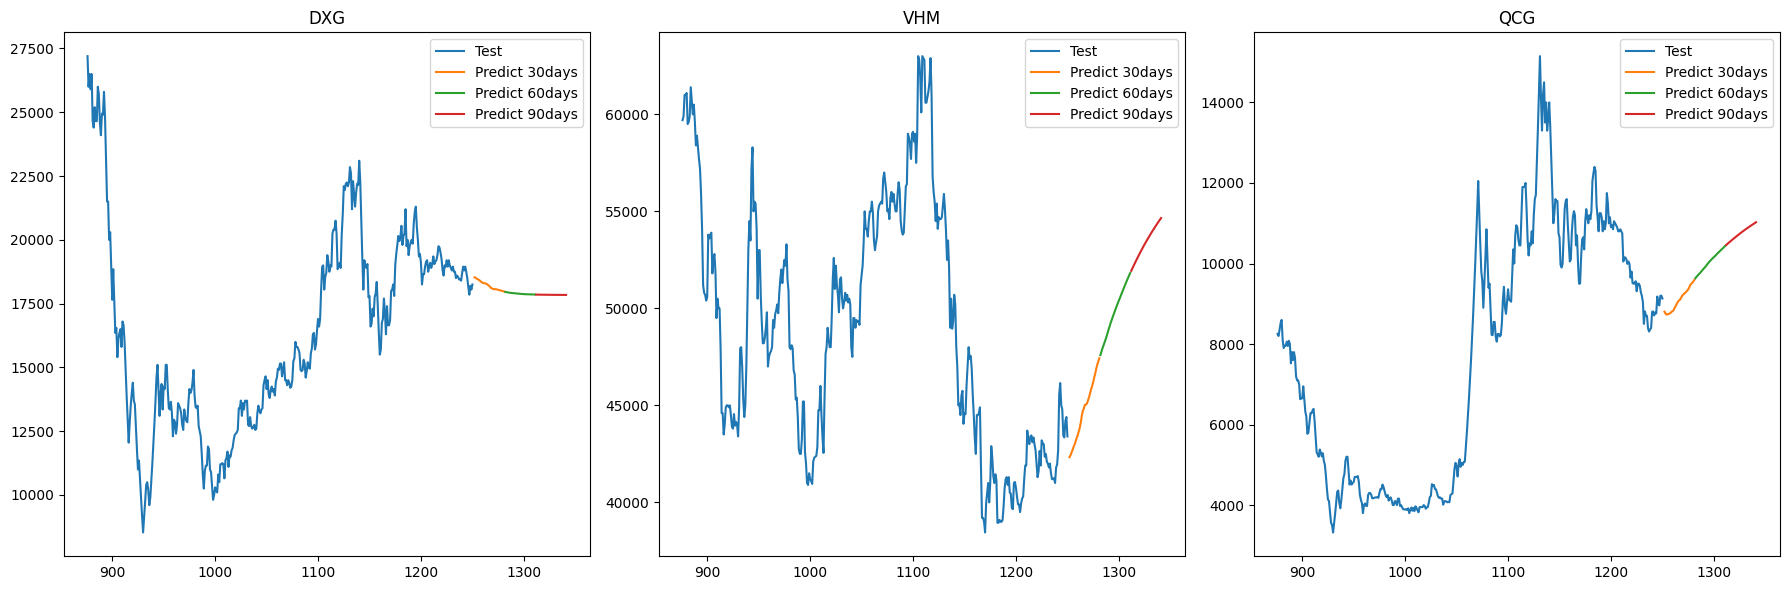

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
# dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
# axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
# vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
# axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
# qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
# axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()

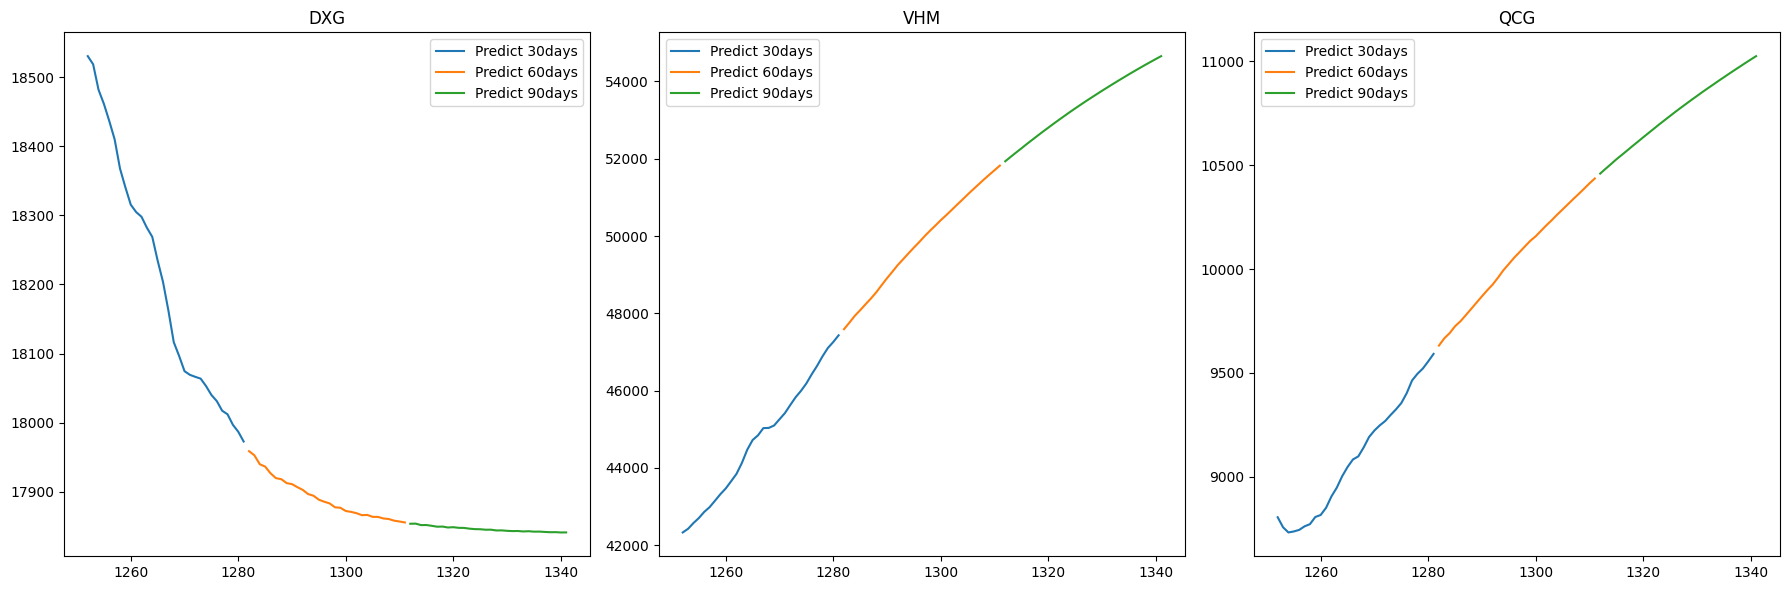

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()